# Prediksi Pembatalan Reservasi Hotel


## **1. Business Problem Understanding**

### **1.1 Context**
Industri perhotelan di Portugal merupakan sektor yang sangat penting bagi perekonomian negara, mengingat Portugal adalah salah satu destinasi wisata utama di Eropa. Berdasarkan data dari Tourism Portugal, sektor ini menyumbang sekitar 15% dari GDP Portugal dan mempekerjakan lebih dari 400.000 orang ((WTTC) Report 2023). Dalam operasional perhotelan di Portugal, tantangan utama yang dihadapi adalah manajemen reservasi yang efektif, terutama dalam menghadapi tingkat pembatalan yang tinggi.

Analisis data historis pemesanan hotel di Portugal periode Juli 2015 hingga Agustus 2017 menunjukkan tingkat pembatalan yang mencapai 28%. Angka ini sangat mengkhawatirkan mengingat standar industri untuk tingkat pembatalan (cancellation rate) secara global berada di kisaran yang lebih rendah, yaitu 18% untuk pemesanan langsung (direct booking) di Eropa (D-EDGE Hospitality Solutions Report, October 2024). Sementara itu, berdasarkan laporan terbaru, tingkat pembatalan untuk pemesanan melalui OTA seperti Expedia mencapai 31%, yang berarti angka 28% ini sudah mendekati tingkat pembatalan pada platform tersebut.

Tingginya tingkat pembatalan ini mendorong hotel untuk dapat memprediksi lebih awal kemungkinan pembatalan dari setiap reservasi yang masuk. Hotel memiliki data historis pemesanan yang mencakup informasi seperti karakteristik pemesanan, detail tamu, channel pemesanan, dan informasi terkait lainnya yang dikumpulkan saat proses reservasi.

Target:
- 0 : Reservasi tidak dibatalkan (tamu menginap)
- 1 : Reservasi dibatalkan

Dengan mengembangkan model klasifikasi yang akurat, hotel dapat mengoptimalkan strategi overbooking dan kebijakan pembatalan untuk memaksimalkan pendapatan sambil tetap menjaga kualitas layanan kepada tamu.

### **1.2 Problem Statement**
1. Bagaimana mengembangkan model klasifikasi yang akurat untuk memprediksi pembatalan reservasi hotel berdasarkan data historis pemesanan periode Juli 2015 hingga Agustus 2017?
   
2. Karakteristik pemesanan dan faktor-faktor apa saja yang memiliki pengaruh signifikan terhadap kemungkinan pembatalan reservasi hotel?
   
3. Bagaimana mengidentifikasi pola dalam data historis pemesanan untuk mengoptimalkan strategi overbooking dan kebijakan pembatalan hotel?

### **1.3 Goals**

Perusahaan perhotelan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang tamu hotel akan membatalkan reservasi hotel atau tidak, sehingga dapat mengoptimalkan strategi overbooking dan manajemen reservasi secara lebih efektif.

Dan juga, perusahaan ingin mengetahui faktor/variabel apa yang membuat seorang tamu hotel cenderung membatalkan reservasi mereka atau tidak, sehingga mereka dapat membuat strategi yang lebih baik dalam mengelola reservasi dan meminimalkan dampak pembatalan (seperti penyesuaian kebijakan pembatalan dan pricing berdasarkan karakteristik tamu hotel serta channel pemesanan).

### **1.4 Analytic Approach**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan reservasi yang dibatalkan dan yang tidak dibatalkan.

Kemudian kita akan membangun model klasifikasi yang akan membantu hotel untuk dapat memprediksi probabilitas suatu reservasi akan dibatalkan atau tidak

### **1.5 Machine Learning Evaluation Metric**

- False Positive (Type I Error): Reservasi diprediksi akan dibatalkan tetapi sebenarnya tidak.
- False Negative (Type II Error): Reservasi diprediksi tidak akan dibatalkan tetapi sebenarnya dibatalkan.

## Asumsi Dasar
- average_room_price = 106.24€ (Harga rata-rata kamar)
- operational_room_cost = 30€ (Biaya operasional tetap per kamar)
- overbooking_cost = 390€ (Rata-rata biaya kompensasi akibat overbooking)
- cancellation_recovery_rate = 0.2 (Persentase pemulihan pendapatan dari reservasi berisiko)

#### Perhitungan False Positive (FP)

*Dampak Langsung:*
- Biaya kompensasi untuk overbooking tetap €390 (realistis dan sulit dikurangi)

*Dampak Tidak Langsung (Revisi):*
1. *Kehilangan Tamu Hotel Potensial:*
   - CLV per tamu: €1,500/tahun
   - Asumsi kehilangan: 1-1.5 tamu potensial (bukan 2-3)
   - Impact: 1.25 × €1,500 = €1,875 per FP

2. *Word of Mouth Negatif:*
   - Asumsi: Setiap tamu tidak puas menceritakan ke 5-7 orang (bukan 8-10)
   - Konversi negatif: 15% (bukan 20%)
   - Impact: 6 orang × 15% × €300 = €270 per FP

3. *Review Negatif Online:*
   - Penurunan conversion rate: 0.3% (bukan 0.5%)
   - Asumsi: 2 review negatif per FP (bukan 3)
   - Impact per review: 100 × 0.3% × €300 = €90
   - Total impact: 2 × €90 = €180 per FP

*Total Dampak Tidak Langsung per FP:* €1,875 + €270 + €180 = €2,325 per tahun
*Total Dampak FP:* €390 + €2,325 = €2,715 per kejadian per tahun

#### Perhitungan False Negative (FN)

*Dampak Langsung:*
- Kerugian langsung per kamar tetap €106.3

*Dampak Tidak Langsung (Revisi):*
1. *Penurunan Peringkat di OTA:*
   - Penurunan visibility: 25% (bukan 20%)
   - Kehilangan view: 250 dari 1000
   - Conversion rate: 3.5% (bukan 3%)
   - Impact: 250 × 3.5% × €300 = €2,625/bulan
   - Impact tahunan: €31,500 per 100 FN

2. *Opportunity Cost Jangka Panjang:*
   - Rata-rata returning guest: 18% (bukan 15%)
   - CLV: €1,800 (bukan €1,500)
   - Impact: 18 × €1,800 = €32,400 per 100 FN

*Total Dampak Tidak Langsung per FN:* (€31,500 + €32,400) ÷ 100 = €639 per tahun
*Total Dampak FN:* €106.3 + €639 = €869 per kejadian per tahun

#### Perbandingan Final (Revisi):
- *Total Dampak FP:* €2,715 per kejadian per tahun
- *Total Dampak FN:* €869 per kejadian per tahun
- *Rasio FP:FN:* ≈ 3.1:1 

Dengan penyesuaian ini, dampak FP masih lebih tinggi dari FN (yang masuk akal dalam industri perhotelan), tetapi gap-nya jauh lebih realistis dan tidak terlalu ekstrem, sehingga model prediksi dapat dioptimalkan dengan lebih seimbang.

## 1. Detail Analisis False Positive (Prediksi Batal padahal Tidak Batal)

### Dampak Langsung (Kuantitatif):
- Biaya kompensasi untuk overbooking:
  - Upgrade kamar: 40-80€/malam (Hayes & Miller, 2011)
  - Relokasi ke hotel lain: 120-200€/malam (Anderson & Xie, 2016)
  - Transportasi ke hotel lain: 20-40€ (Ivanov, 2014)
  - Kompensasi tambahan: 30-70€
- Rata-rata kerugian langsung per kejadian: 300€ (lebih konservatif dari asumsi awal)

### Dampak Tidak Langsung (Kualitatif & Jangka Panjang):
- Kehilangan tamu hotel Potensial:
  - Customer Lifetime Value (CLV) per tamu: 1,000€/tahun (Reichheld & Sasser, 2014)
  - Asumsi kehilangan 1-2 tamu hotel potensial per kejadian FP (lebih konservatif)
  - Impact: 1.5 × 1,000€ = 1,500€ per FP

- Word of Mouth Negatif:
  - Rata-rata tamu tidak puas menceritakan ke 6-8 orang (Technical Assistance Research Programs, 2019)
  - Konversi negatif: 15% dari yang mendengar tidak jadi booking (lebih konservatif)
  - Rata-rata 2 malam stay × 106.24€/malam = 212.48€ per orang
  - Impact: 7 orang × 15% × 212.48€ = 223.10€ per FP

- Review Negatif Online:
  - Penurunan conversion rate booking sebesar 0.3% (lebih konservatif) (Ye et al., 2011)
  - Rata-rata 80 view per review negatif (PhoCusWright, 2020)
  - 3% conversion rate normal (Siteminder, 2023)
  - Rata-rata booking 212.48€ (2 malam × 106.24€)
  - Impact per review: 80 × 0.3% × 212.48€ = 50.99€
  - Asumsi 2 review negatif per FP (lebih konservatif)
  - Total impact: 2 × 50.99€ = 101.98€ per FP

- Total Dampak Tidak Langsung per False Positive per tahun:
  1,500€ + 223.10€ + 101.98€ = 1,825.08€

- Total Dampak FP per kejadian per tahun:
  300€ + 1,825.08€ = 2,125.08€


## Referensi:
- Hayes, D. K., & Miller, A. (2011). Revenue Management for the Hospitality Industry. Wiley.
- Anderson, C. K., & Xie, X. (2016). Dynamic pricing in hospitality: Overview and opportunities. International Journal of Revenue Management.
- Ivanov, S. (2014). Hotel Revenue Management: From Theory to Practice. Zangador.
- 
Metric evaluasi yang tepat: <br>
- Menggunakan **Precision**

- **Alasan Pemilihan**

1. **Dampak False Positive (FP) Lebih Besar daripada False Negative (FN)**
   - Berdasarkan analisis biaya, **dampak finansial dari False Positive (€2.125,08 per kejadian per tahun) jauh lebih besar dibandingkan False Negative (€345,98 per kejadian per tahun)**.
   - False Positive terjadi ketika sistem salah mengidentifikasi reservasi sebagai berisiko batal, padahal pelanggan sebenarnya akan datang.
   - Ini bisa menyebabkan **strategi overbooking yang berlebihan**, yang berpotensi menimbulkan **double booking, kompensasi pelanggan, dan hilangnya kepercayaan pelanggan**.

2. **Precision Lebih Menekankan Akurasi dalam Prediksi Pembatalan**
   - Precision lebih fokus pada **menghindari False Positive**, yang berarti model akan lebih berhati-hati dalam memprediksi pembatalan.
   - Ini membantu **mengurangi kesalahan False Positive** yang dapat menyebabkan **kerugian finansial tinggi** akibat tindakan mitigasi yang tidak perlu.

3. **Menghindari Overbooking yang Berlebihan**
   - Jika menggunakan **Recall atau F1-score**, model bisa lebih agresif dalam memprediksi pembatalan, yang berisiko meningkatkan FP.
   - Precision memastikan bahwa **hanya reservasi yang benar-benar berisiko tinggi untuk membatalkan yang ditandai**, sehingga strategi overbooking tetap optimal.

4. **Keseimbangan antara Bisnis dan Akurasi Model**
   - Dengan menekankan **Precision**, model tetap mampu mengidentifikasi pembatalan dengan akurat tanpa mengorbankan terlalu banyak Recall.
   - Ini berarti strategi mitigasi pembatalan (misalnya promosi, diskon, atau komunikasi proaktif) bisa lebih **tertarget pada pelanggan yang benar-benar berisiko membatalkan**, tanpa mengganggu pelanggan yang tetap akan datang.

5. **Didukung oleh Analisis Kuantitatif**
   - Keputusan memilih Precision didasarkan pada data konkret mengenai dampak finansial masing-masing kesalahan model.
   - Dengan metrik ini, bisa **mengoptimalkan prediksi pembatalan dengan cara yang meminimalkan dampak bisnis negatif**.

### **1.6 Metric Evaluation (Business)**

1. **Revenue Recovery Rate (RRR)**  
**Definisi:**  
Mengukur sejauh mana model membantu hotel dalam memulihkan pendapatan yang berisiko hilang akibat pembatalan reservasi dengan mempertimbangkan dampak False Negative (FN).  

**Formula:**  
- RRR = (Total Revenue Recovered / Total Revenue at Risk) x 100%
- Total Revenue Recovered = Predicted Revenue - (FN x €671)
- Total Revenue at Risk = Predicted Revenue

**Target:**  
> Diupayakan setinggi mungkin untuk memastikan pendapatan yang berisiko hilang akibat pembatalan dapat dipulihkan secara optimal.

2. **Overbooking Cost Reduction (OCR)**  
**Definisi:**  
Mengukur seberapa baik model dalam mengurangi biaya yang muncul akibat kesalahan prediksi overbooking (False Positive - FP).  

**Formula:**  
- OCR = (1 - {Total Overbooking Costs / Overbooking Costs} x 100%)
- Total Overbooking Costs = FP x €5,130

**Target:**  
> 80% (agar biaya overbooking dapat dikurangi secara signifikan)

## **2. Data Understanding**

Dataset souece : https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand


Deskripsi Umum Dataset:

Dataset ini terdiri dari pemesanan dari dua jenis hotel:
- City Hotel (Hotel di dalam kota)
- Resort Hotel (Hotel di daerah wisata)

Data mencakup periode 2015 hingga 2017 dan mencatat informasi sebagai berikut:



| **No** | **Kolom**                         | **Deskripsi**                                      | **Dampak dalam Bisnis** |
|------|---------------------------------|------------------------------------------------|-------------------------|
| 1    | `hotel`                         | Jenis hotel: "City Hotel" atau "Resort Hotel"  | Memungkinkan analisis perbedaan strategi pemasaran dan harga antara kedua jenis hotel. |
| 2    | `is_canceled`                   | Status pembatalan reservasi (0 = Tidak, 1 = Ya) | Membantu memprediksi pembatalan dan mengurangi kehilangan pendapatan. |
| 3    | `lead_time`                      | Jumlah hari antara pemesanan dan check-in | Berguna dalam strategi diskon untuk pemesanan lebih awal atau last-minute deals. |
| 4    | `arrival_date_year`              | Tahun kedatangan tamu | Berguna untuk analisis tren tahunan dalam pemesanan. |
| 5    | `arrival_date_month`             | Bulan kedatangan tamu | Memungkinkan identifikasi bulan dengan tingkat hunian tertinggi/rendah. |
| 6    | `arrival_date_week_number`       | Minggu ke berapa dalam tahun kedatangan | Membantu dalam analisis permintaan berdasarkan minggu. |
| 7    | `arrival_date_day_of_month`      | Hari dalam bulan saat check-in | Berguna untuk memahami pola pemesanan harian. |
| 8    | `stays_in_weekend_nights`        | Jumlah malam menginap di akhir pekan | Mempengaruhi strategi harga lebih tinggi saat weekend. |
| 9    | `stays_in_week_nights`           | Jumlah malam menginap di hari kerja | Membantu memahami kebutuhan tamu hotel bisnis vs wisatawan. |
| 10   | `adults`                         | Jumlah tamu dewasa | Mempengaruhi alokasi kamar dan fasilitas hotel. |
| 11   | `children`                       | Jumlah anak dalam reservasi | Membantu dalam penyediaan fasilitas ramah keluarga. |
| 12   | `babies`                         | Jumlah bayi dalam reservasi | Berguna untuk menawarkan layanan tambahan seperti tempat tidur bayi. |
| 13   | `meal`                           | Paket makanan yang dipilih tamu hotel (BB, HB, FB, SC) | Memungkinkan strategi upsell makanan dan paket promosi. |
| 14   | `country`                        | Negara asal tamu | Berguna untuk strategi pemasaran berdasarkan demografi tamu. |
| 15   | `market_segment`                 | Segmen pasar tamu hotel (Offline, Online, Direct, dll.) | Membantu menentukan saluran pemesanan paling efektif. |
| 16   | `distribution_channel`           | Saluran distribusi pemesanan (Direct, TA/TO, dll.) | Berguna untuk mengoptimalkan strategi pemasaran dan komisi agen. |
| 17   | `is_repeated_guest`              | Apakah tamu pernah menginap sebelumnya (0 = Tidak, 1 = Ya) | Membantu dalam strategi loyalitas tamu hotel. |
| 18   | `previous_cancellations`         | Jumlah reservasi sebelumnya yang dibatalkan | Memungkinkan identifikasi tamu hotel dengan risiko tinggi untuk pembatalan. |
| 19   | `previous_bookings_not_canceled` | Jumlah reservasi sebelumnya yang tidak dibatalkan | Berguna untuk mengidentifikasi tamu hotel setia. |
| 20   | `reserved_room_type`             | Tipe kamar yang dipesan tamu hotel | Memungkinkan analisis permintaan tipe kamar tertentu. |
| 21   | `assigned_room_type`             | Tipe kamar yang diberikan kepada tamu hotel | Berguna dalam mengelola alokasi kamar. |
| 22   | `booking_changes`                | Jumlah perubahan yang dilakukan pada reservasi | Menunjukkan tingkat fleksibilitas tamu hotel dan potensi upselling. |
| 23   | `deposit_type`                   | Jenis deposit pembayaran (No Deposit, Non Refund, Refundable) | Berguna untuk menentukan kebijakan pembayaran terbaik untuk meminimalkan pembatalan. |
| 24   | `agent`                          | ID agen perjalanan yang menangani reservasi | Memungkinkan hotel untuk menganalisis kinerja agen. |
| 25   | `company`                        | ID perusahaan yang melakukan reservasi | Berguna untuk strategi pemasaran ke tamu hotel korporat. |
| 26   | `days_in_waiting_list`           | Jumlah hari dalam daftar tunggu | Membantu dalam strategi pengelolaan overbooking. |
| 27   | `customer_type`                  | Jenis tamu hotel (Contract, Transient, dll.) | Berguna untuk analisis preferensi tamu hotel dan segmentasi. |
| 28   | `adr` (Average Daily Rate)       | Tarif harian rata-rata per kamar (€) | Metrik utama untuk mengevaluasi pendapatan hotel per kamar. |
| 29   | `required_car_parking_spaces`    | Jumlah tempat parkir yang diminta tamu hotel | Berguna dalam pengelolaan fasilitas parkir hotel. |
| 30   | `total_of_special_requests`      | Jumlah permintaan khusus tamu hotel | Dapat digunakan untuk meningkatkan layanan tamu hotel dan kepuasan tamu. |
| 31   | `reservation_status`     | Status akhir reservasi, yaitu: "Canceled", "Check-Out", atau "No-Show". | Berguna untuk memahami pola pembatalan, tamu yang tidak hadir (*no-show*), dan tamu yang berhasil menginap. |
| 32   | `reservation_status_date` | Tanggal ketika status reservasi diperbarui (misalnya, tanggal pembatalan atau check-out). | Membantu dalam analisis tren pembatalan dan memprediksi tingkat okupansi hotel. |


In [128]:
# Library for data cleaning
import pandas as pd
import numpy as np

# Library for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn utilities
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, LearningCurveDisplay
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, RobustScaler, OrdinalEncoder
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV
import scipy.stats as stats

# Feature Engineering
import category_encoders as ce
from category_encoders import BinaryEncoder

# Models and Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalanced Dataset Handling
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN

# Library SciPy
from scipy.stats import shapiro

# Others
import warnings
import pickle

# Configure Settings
warnings.simplefilter("ignore")  # Ignore warnings
pd.set_option('display.max_columns', None)

In [129]:
# Load the dataset using csv format
df = pd.read_csv("hotel_bookings.csv")

# Displays the first 5 rows of the dataframe
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### **2.1 General Informasi**

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Insight :
- terdapat 119390 Data, dengan total 32 fitur
- terdapat beberapa missing values yaitu : `children`, `country`, `agent`, `company`
- terdapat kolom yang tidak sesuai dengan typenya yaitu `reservation_status_date`, `children`, `agent`,`company`

akan diperbaiki kolom `reservation_status_date` :

In [131]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])

### **2.2 Statistik deskriptif**

In [132]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


In [133]:
# Descriptive statistics of categorical data
df.describe(include=["object"])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


Insight : terdapat beberapa nilai yang tidak masuk akal:
- `adr` bernilai negatif
- nilai `adults`, `children`, dan `babies` yang tidak wajar seperti:
    - `adults` = 0, karena untuk memesan hotel minimal 1 orang dewasa
    - `children` dan `babies` = 10, akan diselidiki lebih lanjut apakah nilai 10 itu outlier atau tidak

## **3. Data Cleaning**

### **3.1 Missing Value**

Jenis missing values:
- Missing Not at Random (MNAR) : Data yang hilang bergantung pada nilai itu sendiri, biasanya karena alasan sistematis atau sensitif.
- Missing at Random (MAR) : Data yang hilang dipengaruhi oleh variabel lain dalam dataset tetapi tidak oleh nilai itu sendiri.
- Missing Completely at Random (MCAR) : Data yang hilang tidak memiliki pola tertentu dan tidak bergantung pada variabel lain.

In [134]:
print("total missing values in dataframe: ",df.isna().sum().sum())
df.isnull().sum().apply(lambda x: f'{x} - ({x/len(df):.2%})')

total missing values in dataframe:  129425


hotel                                   0 - (0.00%)
is_canceled                             0 - (0.00%)
lead_time                               0 - (0.00%)
arrival_date_year                       0 - (0.00%)
arrival_date_month                      0 - (0.00%)
arrival_date_week_number                0 - (0.00%)
arrival_date_day_of_month               0 - (0.00%)
stays_in_weekend_nights                 0 - (0.00%)
stays_in_week_nights                    0 - (0.00%)
adults                                  0 - (0.00%)
children                                4 - (0.00%)
babies                                  0 - (0.00%)
meal                                    0 - (0.00%)
country                               488 - (0.41%)
market_segment                          0 - (0.00%)
distribution_channel                    0 - (0.00%)
is_repeated_guest                       0 - (0.00%)
previous_cancellations                  0 - (0.00%)
previous_bookings_not_canceled          0 - (0.00%)
reserved_roo

<Axes: >

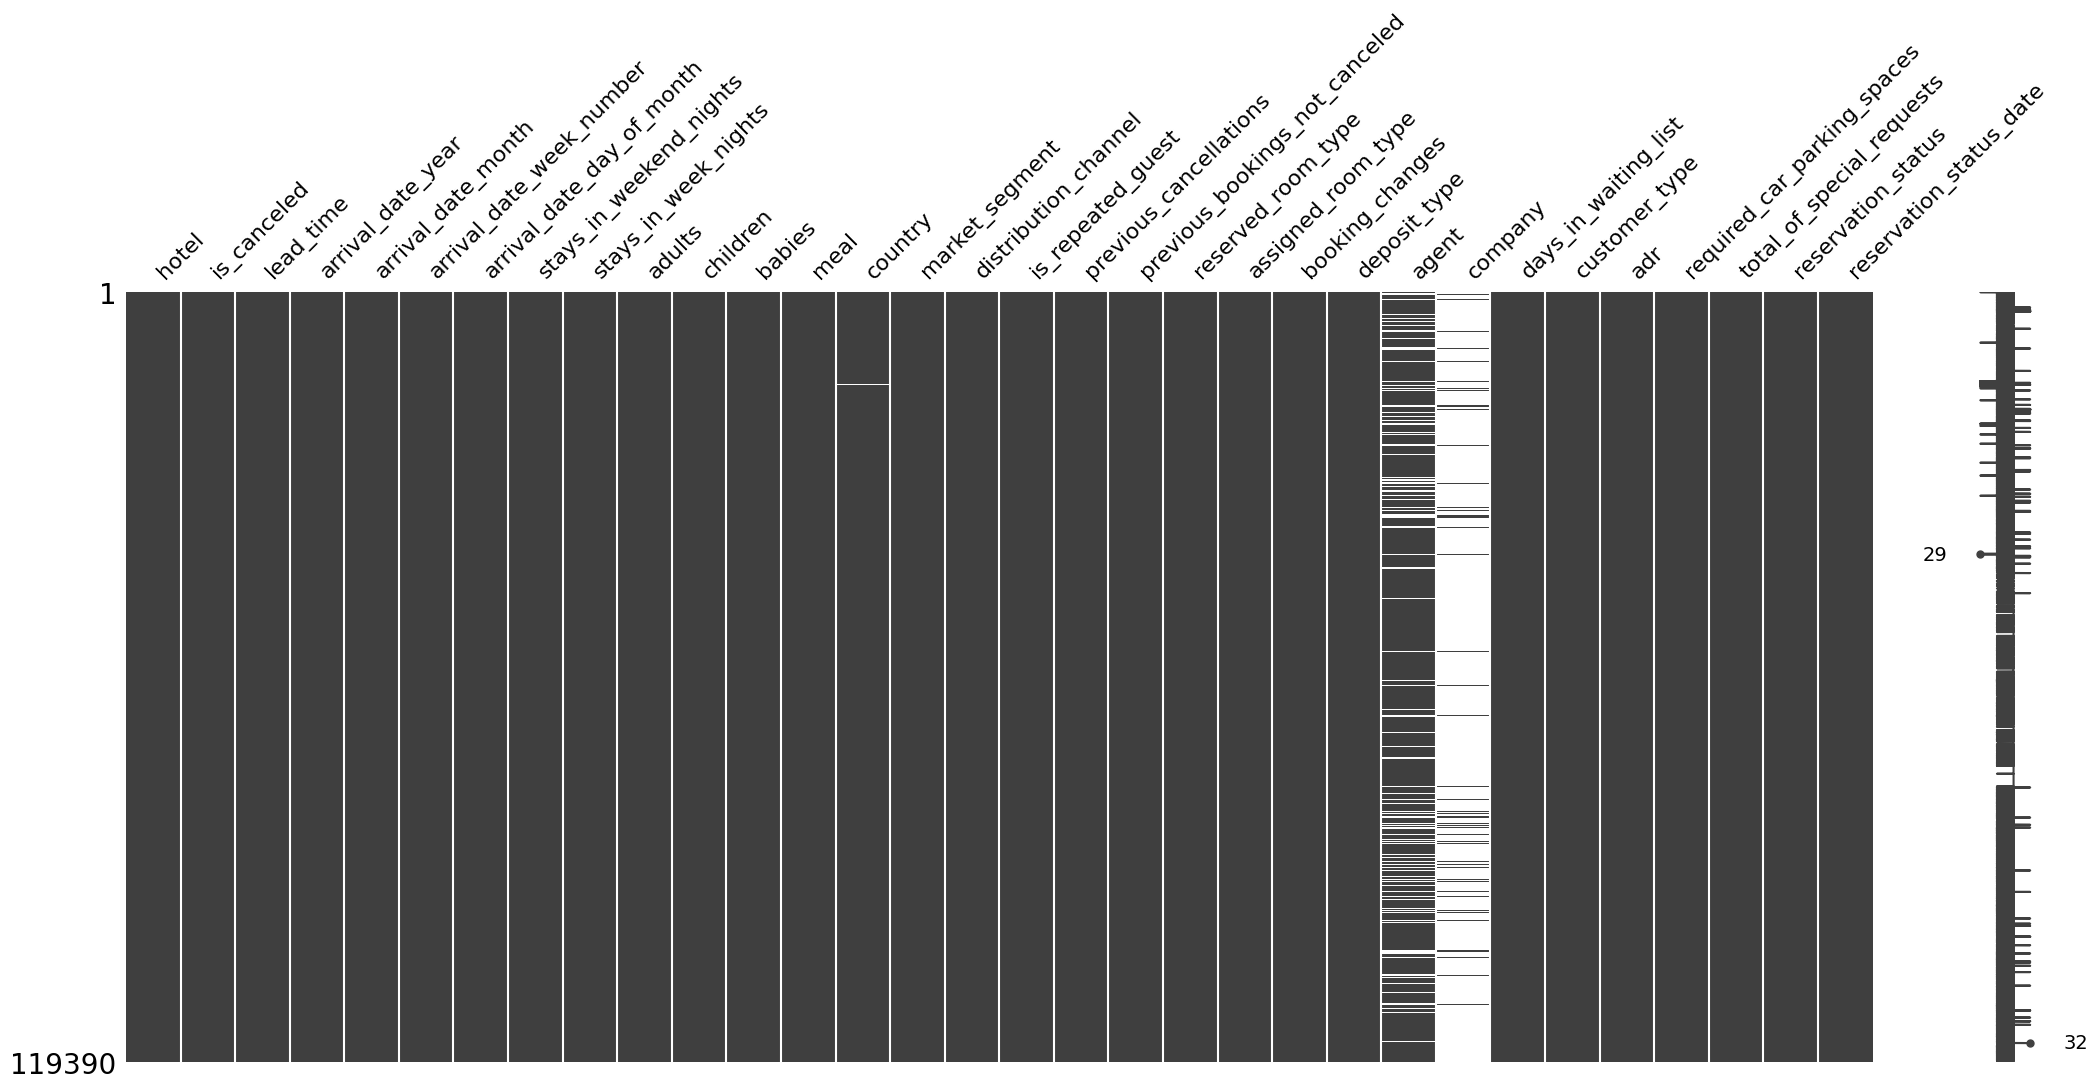

In [135]:
import missingno
missingno.matrix(df)

Fitur yang memiliki missing values:
- `children` = 4 missing values (0.00%)
- `country` = 488 missing values (0.41%)
- `agent` = 16,340 missing values (13.69%)
- `company` = 112,593 missing values (94.31%)

Notes:
Grafik missing no menunjukkan bahwa jika nilai pada variabel agent terisi maka nilai pada variabel company kosong begitupun sebaliknya, ini bisa dijadikan hint untuk penanganan missing value lebih lanjut.

akan dicek missing values lebih dalam:

In [136]:
columns_with_missing_value = df.columns[df.isnull().any()].tolist()
print("\n Columns name which has missing value: ", columns_with_missing_value)

columns_with_nan = df.columns[df.isna().any()].tolist()
print("\n Columns name which has NaN: ", columns_with_nan)

## verifying
print("\n Missing Values are equals to NaN: ", columns_with_missing_value == columns_with_nan)


 Columns name which has missing value:  ['children', 'country', 'agent', 'company']

 Columns name which has NaN:  ['children', 'country', 'agent', 'company']

 Missing Values are equals to NaN:  True


Insight:
- Ini menegaskan bahwa semua nilai yang hilang dalam dataset disimpan sebagai NaN (bukan format lain seperti string kosong "", None, atau 0).
- Dengan kata lain, dataset secara konsisten menggunakan NaN untuk merepresentasikan data yang hilang.

In [137]:
missing_col = df[['children', 'country', 'agent', 'company']]

Kesimpulan:
- Nilai missing values secara keseluruhan berupa nilai nan.
- fitur yang memiliki nilai missing values dan termasuk jenis apa untuk cara menanganinya
    - `children` = 4 missing values (0.00%) - Missing Completely at Random (MCAR)
    - `country` = 488 missing values (0.41%) - Missing Completely at Random (MCAR)
    - `agent` = 16,340 missing values (13.69%) - Missing at Random (MAR)
    - `company` = 112,593 missing values (94.31%) - Missing at Random (MAR)
- cara mengatasi missing values setiap fitur dari jenisnya:
    - `children` dan `country` akan dihapus karena jumlah missing values yang sedikit (<5%) karena Menurut Glen (2016) dalam Statistical Analysis Handbook, jika kurang dari 5%, penghapusan tidak akan berdampak signifikan terhadap hasil analisis.
    - `agent` dan `company` akan di isi dengan nilai '0' karena jika:
        - menggunakan agent maka tidak menggunakan company, sehingga nilai company adalah '0'
        - menggunakan company maka tidak menggunakan agent, sehingga nilai agent adalah '0'
        - tidak menggunakan company dan agent maka melakukan secara individu, sehingga nilai agent dan company '0'

#### **Missing Value Handling**

**1. `company` Feature**

In [138]:
# display(missing_col['company'])
print("Percentage missing values in 'company' column: ", missing_col['company'].isnull().sum()/len(df)*100)

Percentage missing values in 'company' column:  94.30689337465449


In [139]:
df['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

**Insight :** <br>
fitur `company` berisi ID perusahaan yang melakukan atau membayar pemesanan. Jika tidak ada perusahaan yang terlibat, nilainya NaN.

**Solusi:** <br>
Untuk menangani ini, kita bisa mengganti NaN dengan 0, yang berarti pemesanan dilakukan oleh individu atau agent, bukan perusahaan.

In [140]:
# Filling missing value with 0
df["company"] = df["company"].fillna(0)


**2. `agent` Feature**

In [141]:
# display(missing_col['agent'])
print("Percentage missing values in 'company' column: ", missing_col['agent'].isnull().sum()/len(df)*100)

Percentage missing values in 'company' column:  13.686238378423655


**Insight:** <br>
Sama dengan `company` kolom agent berisi ID agen perjalanan yang melakukan pemesanan. Jika pemesanan dilakukan langsung oleh tamu hotel tanpa melalui agen, maka nilai dalam kolom ini adalah NaN.

**Solusi:** <br>
Karena NaN menunjukkan bahwa tidak ada agen yang terlibat, kita bisa menggantinya dengan 0 untuk menunjukkan bahwa pemesanan dilakukan langsung oleh tamu hotel.

In [142]:
# Filling missing value with 0
df["agent"] = df["agent"].fillna(0)


**3. `children` Feature** <br>

In [143]:
# display(missing_col['children'])
print("Percentage missing values in 'children' column: ", missing_col['children'].isnull().sum()/len(df)*100)

Percentage missing values in 'children' column:  0.003350364352123293


**Insight:** <br>
Kolom children memiliki 4 nilai NaN → Artinya ada 4 pemesanan yang tidak memiliki informasi jumlah anak.

**Solusi:** <br>
Mengganti NaN dengan mendrop datanya masuk akal karena data yang missing hanya 4 dan 0.003 persen saja tidak cukup signifikan

In [144]:
df.dropna(subset=['children'], inplace=True)

**4. `country` Feature**

In [145]:
# display(missing_col['country'])
print("Percentage missing values in 'company' column: ", missing_col['country'].isnull().sum()/len(df)*100)

Percentage missing values in 'company' column:  0.40875814584624665


**Insight:** <br>
Ada 0.40 persen baris dengan nilai NaN di kolom country.

**solusi:** <br>
Baris yang memiliki missing values pada kolom 'Country' akan dihapus karena jumlah data yang sedikit, sehingga informasi keseluruhan tidak banyak terpengaruh

In [146]:
# Removing rows missing values in ['country']
df = df.dropna(subset=['country'])

In [147]:
# Final check for missing values
columns_with_missing_value = df.columns[df.isnull().any()].tolist()
print("\n Columns name which has missing value: ", columns_with_missing_value)


 Columns name which has missing value:  []


### **3.2 Duplicated Data**

In [148]:
print("Total Duplicated Data in Dataframe:",df.duplicated().sum())

Total Duplicated Data in Dataframe: 31958


In [149]:
# Mengatasi duplicate data
df.drop_duplicates(inplace=True)
print("Total Duplicated Data in Dataframe:",df.duplicated().sum())

Total Duplicated Data in Dataframe: 0


**Insight:**
- Dataset awal memiliki 33.753 baris duplikat, yang berpotensi menyebabkan bias atau redundansi dalam analisis data.
- Setelah penghapusan menggunakan drop_duplicates(), tidak ada lagi data duplikat dalam dataframe.
- Penghapusan ini penting untuk meningkatkan kualitas data, menghindari analisis yang salah, dan mengurangi ukuran dataset agar lebih efisien dalam pemrosesan.

### **3.3 Outlier Analysis**

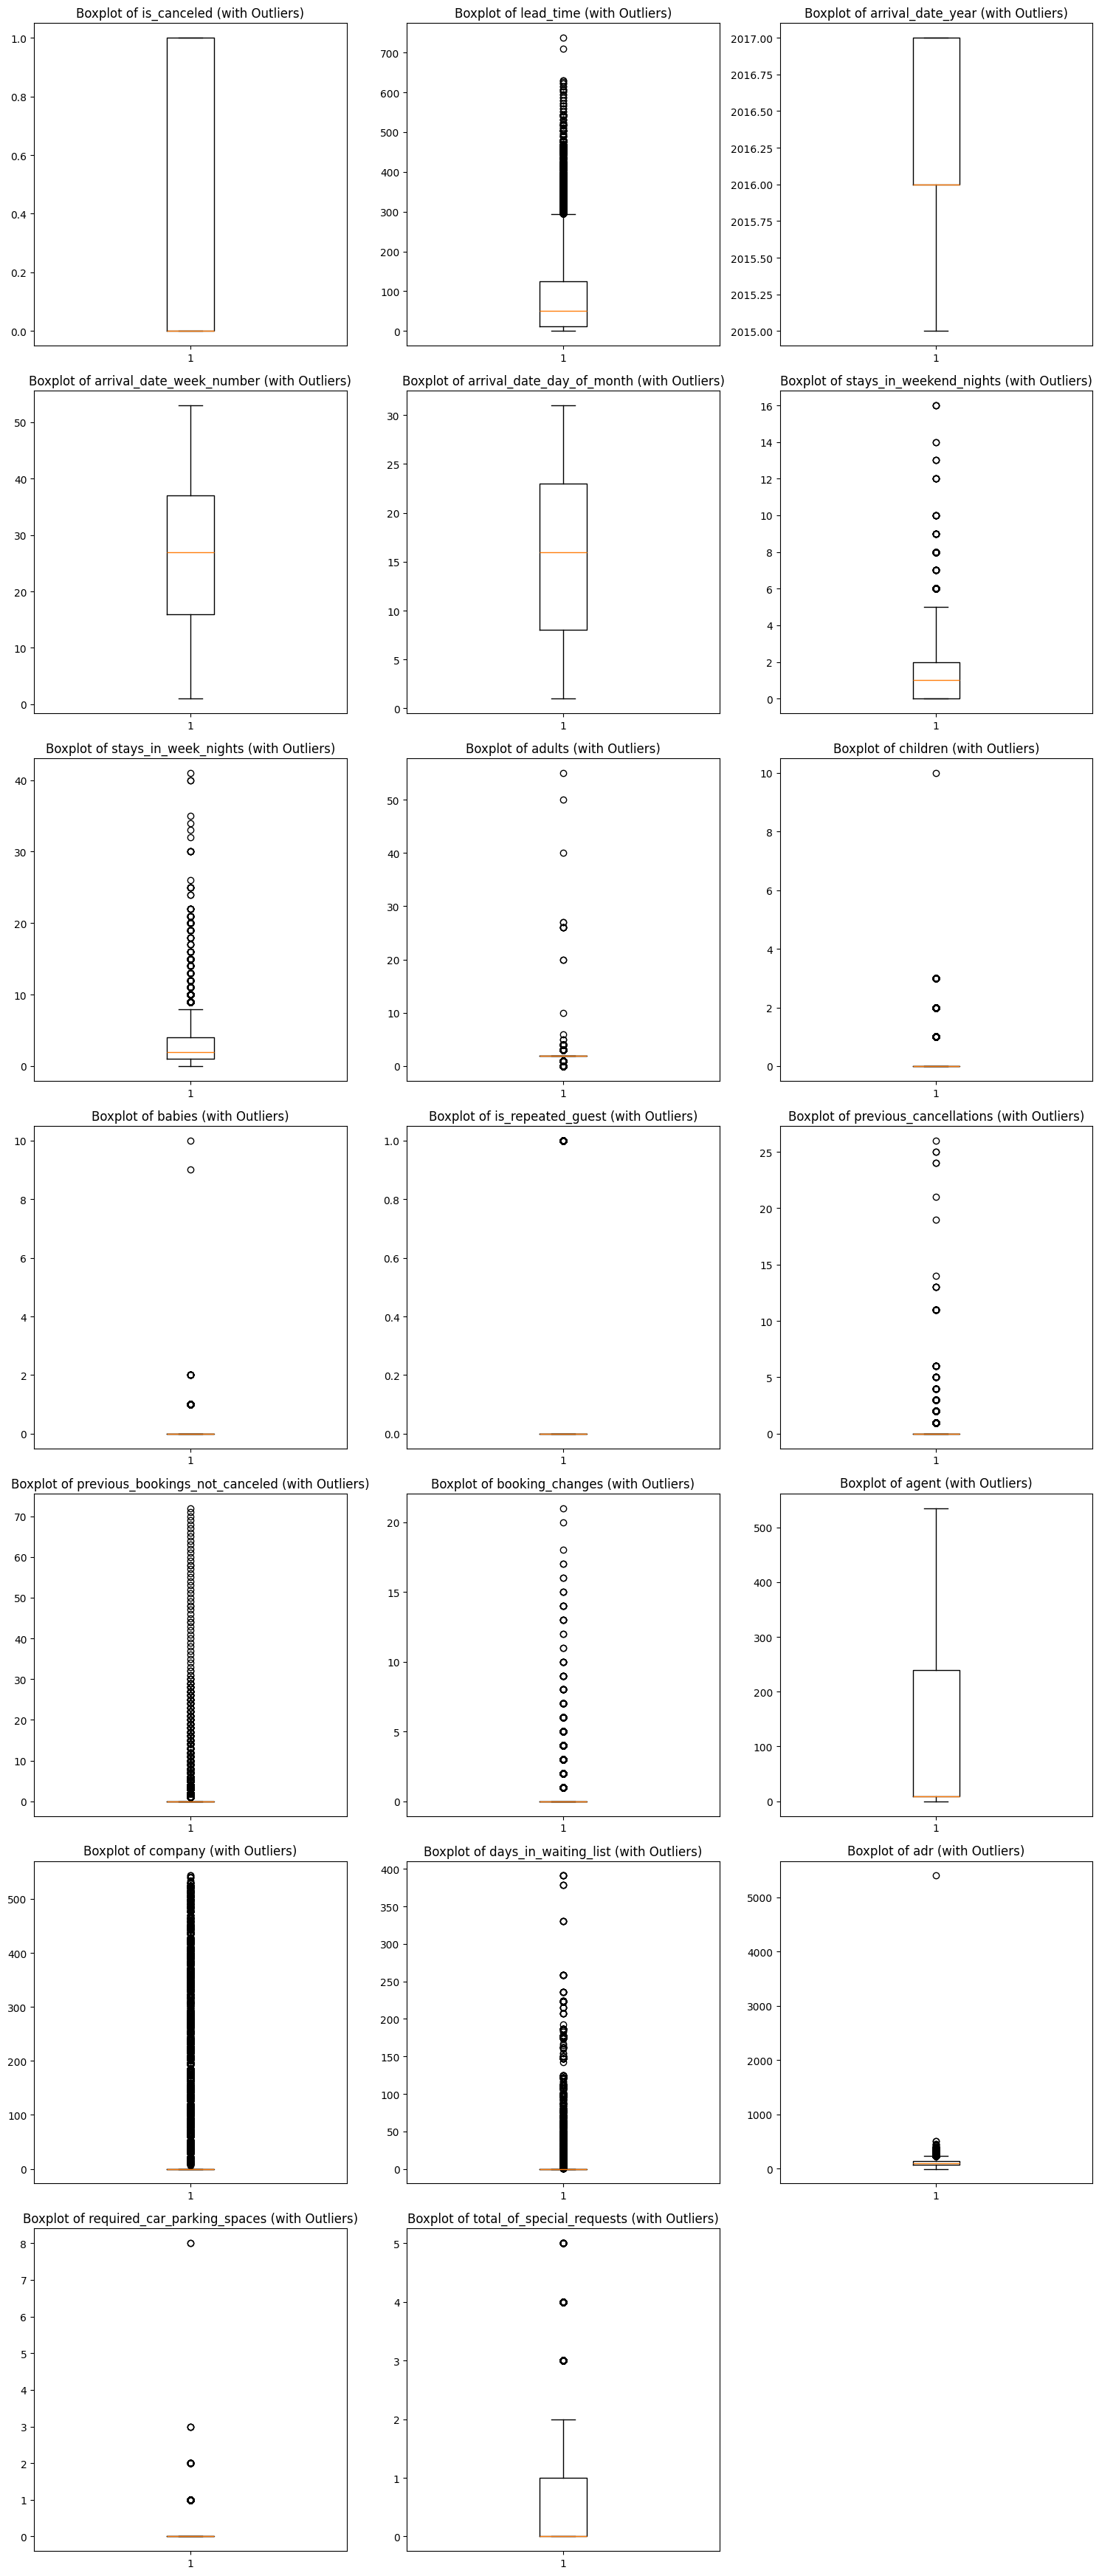

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,is_canceled,0,0.000000,-1.500,2.500
1,lead_time,2470,2.841040,-157.500,294.500
2,arrival_date_year,0,0.000000,2014.500,2018.500
3,arrival_date_week_number,0,0.000000,-15.500,68.500
4,arrival_date_day_of_month,0,0.000000,-14.500,45.500
5,stays_in_weekend_nights,218,0.250748,-3.000,5.000
6,stays_in_week_nights,1522,1.750633,-3.500,8.500
7,adults,22600,25.994939,2.000,2.000
8,children,8353,9.607775,0.000,0.000
9,babies,911,1.047849,0.000,0.000


In [150]:
# Define numerical columns to include in the analysis (ensure these are numeric)
numerical_columns = df.select_dtypes(include=['number']).columns

# Initialize dictionary to store outliers
outliers_dict = {}

# Set up the number of rows and columns for the subplots
num_cols = 3
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 5, num_rows * 5))
axes = axes.flatten()

# List to hold summary data about outliers
summary_data = []

# Iterate over each numerical column to detect outliers and generate boxplots
for i, column in enumerate(numerical_columns):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_dict[column] = outliers

    total_outliers = outliers.shape[0]
    percentage = (total_outliers / df.shape[0]) * 100

    summary_data.append({
        "Column": column,
        "Total Outliers": total_outliers,
        "Percentage (%)": percentage,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound
    })

    axes[i].set_title(f"Boxplot of {column} (with Outliers)")
    axes[i].boxplot(df[column].dropna())

# Hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Create DataFrame to display the outliers summary
outliers_summary_df = pd.DataFrame(summary_data)
outliers_summary_df

**Insight:**
- Bisa kita lihat bahwa hampir keseluruhan kolom memiliki data outlier
- Namun, kita tidak lakukan penghapusan pada tiap outlier dikarenakan nanti akan banyak baris data yang harus dihapus yang mungkin saja relevan dan baik untuk pemodelan nantinya
- Disini kita akan identifikasi nilai-nilai anomaly pada tiap kolom

#### **3.3.1 Anomaly Detection (Numeric)**

- Pada boxplot ditemukan bahwa terdapat banyak kolom yang memiliki indikasi anomali

##### **1. `babies` dan `children`**


- Pertama kita lihat pada kolom `babies` dan `children` yang memiliki nilai ekstrem yang tinggi yakni 9-10 dan 10 pada masing-masing kolom
- Ini perlu kita cek apakah nilai tersebut memang benar atau tidak, secara logika bayi dan anak yang banyak maka memerlukan orang dewasa ('adults') yang cukup banyak

In [151]:
df_babies = df[df['babies'].isin([9, 10])]
print(df_babies[['babies', 'children', 'adults']])

       babies  children  adults
46619      10       0.0       2
78656       9       0.0       1


In [152]:
df_children = df[df['children'] == 10]
print(df_children[['babies', 'children', 'adults']])

     babies  children  adults
328       0      10.0       2


**Insight:**
- Terlihat bahwa 'babies' dan 'children' yang nilainya 9 hingga 10 ini hanya ditemani oleh 'adults' 1 hingga 2 saja
- Maka ini menjadi nilai anomali yang perlu dihapus

**Alasan Penghapusan:**
- Hanya memiliki 3 baris data, kelompok data ini tidak cukup mewakili populasi secara keseluruhan. Oleh karena itu, mempertahankan data ini tidak memberikan nilai tambah yang signifikan, tetapi justru berpotensi merusak analisis.
- Termasuk Outlier, Secara umum, dalam konteks perjalanan atau penginapan, jumlah bayi/anak yang tinggi biasanya disertai dengan jumlah dewasa yang proporsional. Data ini menunjukkan ketidaklaziman dalam pola asuh yang umum, di mana 10 bayi/anak hanya didampingi oleh 1 atau 2 orang dewasa.

##### 2. `adults`

Analisis boxplot menunjukkan adanya anomali pada kolom `adults` dengan nilai 0. Reservasi hotel tidak mungkin tanpa orang dewasa, sehingga perlu investigasi lebih lanjut.

In [153]:
#check adults
df_adults = df[df['adults'] == 0]
print(df_adults[['babies', 'children', 'adults']])

print("Total data with adults=0 adalah ", df_adults.shape[0])

        babies  children  adults
2224         0       0.0       0
2409         0       0.0       0
3181         0       0.0       0
3684         0       0.0       0
3708         0       0.0       0
...        ...       ...     ...
117204       0       2.0       0
117274       0       2.0       0
117303       0       2.0       0
117453       0       2.0       0
118200       0       3.0       0

[380 rows x 3 columns]
Total data with adults=0 adalah  380


**Insight:**
- Terdapat 380 data reservasi hotel dengan nilai `adults` = 0. Ini merupakan anomali yang signifikan karena secara logis, reservasi hotel tidak mungkin dilakukan tanpa kehadiran orang dewasa.
- Maka akan dihapus `adults`=0

**Alasan Penghapusan:**
- Secara domain knowledge `adults`=0 merupaka nilai yang tidak mungkin terjadi


##### 3. `adr`

- Analisis boxplot menunjukkan adanya nilai negatif pada kolom `adr`, yang secara fundamental tidak mungkin. `adr`, yang merepresentasikan pendapatan rata-rata harian per kamar, secara definisi harus bernilai positif atau nol. Oleh karena itu, nilai negatif ini mengindikasikan adanya anomali yang signifikan dan memerlukan investigasi lebih lanjut.

- Analisis boxplot mengidentifikasi adanya outlier signifikan pada kolom `adr`, yaitu nilai 5000. Nilai ini jauh melampaui distribusi data yang ada dan berdasarkan boxplot hanya muncul sekali. Identifikasi lebih lanjut akan dilakukan untuk menentukan penyebab dan dampak potensial dari outlier ini.

In [154]:
#check adr<0 dan adr>=5000
df_adr = df[(df['adr'] < 0) | (df['adr'] >= 5000)]
print(df_adr[['adr', 'reservation_status']])
print("Total data with adr<0 atau adr>=5000 adalah ", df_adr.shape[0])

           adr reservation_status
14969    -6.38          Check-Out
48515  5400.00           Canceled
Total data with adr<0 atau adr>=5000 adalah  2


**Insight:**
- Terdapat dua data yang menunjukkan nilai `adr` yang sangat ekstrem: satu bernilai negatif (-6.38) dan satu bernilai sangat tinggi (5400.00).

**Alasan Penghapusan:**
- Nilai `adr` negatif bertentangan dengan definisi adr sebagai pendapatan rata-rata harian per kamar.
- Nilai `adr` yang sangat tinggi (5400.00) tidak realistis dan tidak sesuai dengan distribusi data yang ada.

##### 4. `days_in_waiting_list`

Analisis boxplot menunjukkan adanya nilai ekstrem pada kolom `days in waiting list`, di mana beberapa data melebihi 365 hari (1 tahun). Dalam konteks bisnis dan operasional perhotelan, waktu tunggu yang melebihi satu tahun sangat tidak lazim. Oleh karena itu, data yang melebihi 365 hari akan dianggap sebagai anomali dan dihapus untuk menjaga relevansi dan akurasi analisis.

In [155]:
df_days = df[df['days_in_waiting_list'] >=325 ]
print(df_days[['days_in_waiting_list']])

       days_in_waiting_list
56957                   379
56959                   379
56960                   379
57293                   330
57294                   330
57307                   330
57320                   330
58152                   391
59076                   391
59085                   391
59395                   391
59450                   391


**Insight:**
- Banyak data memiliki `days in waiting list` lebih dari 365 hari. Ini kemungkinan disebabkan oleh masalah sistem atau kesalahan input. Data-data ini akan dihapus.

**Alasan penghapusan:**
- Secara operasional, sangat tidak mungkin bagi tamu untuk menunggu lebih dari satu tahun untuk mendapatkan kamar hotel. Waktu tunggu yang ekstrem ini tidak mencerminkan praktik bisnis perhotelan yang umum.


In [156]:
# Menghapus anomali berdasarkan kriteria
df = df[(df['babies'] < 9)]
df = df[(df['children'] < 10)]
df = df[(df['adults'] > 0)]
df = df[(df['adr'] >= 0) & (df['adr'] <5000) ]
df = df[(df['days_in_waiting_list'] < 325)]

#### 3.3.2 Anomaly Detection (Object)
Selanjutnya, kami akan melakukan pemeriksaan data anomali pada kolom-kolom yang bertipe objek (kategorikal). Tujuannya adalah untuk memastikan tidak ada kesalahan penulisan (typo) dan format data konsisten.

In [157]:
listItem = []

# Iterasi hanya untuk kolom dengan tipe data object
for col in df.select_dtypes(include=['object']).columns:
    listItem.append([
        col,
        df[col].nunique(),
        list(df[col].drop_duplicates().values)
    ])

# Membuat DataFrame hanya untuk kolom object
dfDesc = pd.DataFrame(columns=['dataFeatures', 'unique', 'uniqueSample'],
                      data=listItem)
pd.set_option('display.max_colwidth', None)
dfDesc


,dataFeatures,unique,uniqueSample
0,hotel,2,"[Resort Hotel, City Hotel]"
1,arrival_date_month,12,"[July, August, September, October, November, December, January, February, March, April, May, June]"
2,meal,5,"[BB, FB, HB, SC, Undefined]"
3,country,177,"[PRT, GBR, USA, ESP, IRL, FRA, ROU, NOR, OMN, ARG, POL, DEU, BEL, CHE, CN, GRC, ITA, NLD, DNK, RUS, SWE, AUS, EST, CZE, BRA, FIN, MOZ, BWA, LUX, SVN, ALB, IND, CHN, MEX, MAR, UKR, SMR, LVA, PRI, SRB, CHL, AUT, BLR, LTU, TUR, ZAF, AGO, ISR, CYM, ZMB, CPV, ZWE, DZA, KOR, CRI, HUN, ARE, TUN, JAM, HRV, HKG, IRN, GEO, AND, GIB, URY, JEY, CAF, CYP, COL, GGY, KWT, NGA, MDV, VEN, SVK, FJI, KAZ, PAK, IDN, LBN, PHL, SEN, SYC, AZE, BHR, NZL, THA, DOM, MKD, MYS, ARM, JPN, LKA, CUB, CMR, BIH, MUS, COM, SUR, ...]"
4,market_segment,7,"[Direct, Corporate, Online TA, Offline TA/TO, Complementary, Groups, Aviation]"
5,distribution_channel,5,"[Direct, Corporate, TA/TO, Undefined, GDS]"
6,reserved_room_type,9,"[C, A, D, E, G, F, H, L, B]"
7,assigned_room_type,11,"[C, A, D, E, G, F, I, B, H, L, K]"
8,deposit_type,3,"[No Deposit, Refundable, Non Refund]"
9,customer_type,4,"[Transient, Contract, Transient-Party, Group]"


- Terdapat inkonsistensi dalam beberapa kolom, namun itu tidak terindikasi sebagai anomali :
  1. `Meal` : Kategori "Undefined" pada kolom meal sebenarnya bukan anomali dalam arti kesalahan data. Pada dataset hotel ini, "Undefined" menunjukkan bahwa tidak ada paket makanan yang dipilih atau ditetapkan saat melakukan pemesanan.
  2. `Distribution Channel` : nilai "Undefined" juga bukan merupakan anomali dalam dataset ini. Pemesanan yang dilakukan melalui saluran yang tidak termasuk dalam kategori standar.
  3. `Reserved Room Type` vs `Asigned Room Type` : Perbedaan antara `reserved_room_type` dan `assigned_room_type` adalah fitur yang mencerminkan praktik operasional hotel internal yang sesungguhnya, bukan kesalahan data.
- Namun untuk di kolom `country` terdapat inkonsistensi yakni semua data memiliki 3 huruf dan termasuk dalam ISO 31661-1 alpha-3 namun hanya 'CN' yang tidak sesuai, Perlu kita cek lebih lanjut apakah ada negara lain yang juga salah dan akan di perbaiki

In [158]:
%pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [159]:
import pycountry
# Daftar kode negara ISO 3166-1 alpha-3
iso_countries = {country.alpha_3 for country in pycountry.countries}

# 1. Menampilkan jumlah kode negara unik beserta frekuensinya
country_counts = df["country"].value_counts()
print("Jumlah kode negara unik:", len(country_counts))
print(country_counts.head(20))  # Tampilkan 20 kode negara dengan jumlah terbanyak

# 2. Mendeteksi kode negara yang tidak sesuai dengan standar ISO
invalid_countries = [code for code in country_counts.index if code not in iso_countries]
print("\nKode negara tidak sesuai standar ISO:", invalid_countries)

# 3. Mendeteksi kemungkinan duplikasi (misalnya CN vs CHN)
possible_duplicates = []
for country in iso_countries:
    if country[:2] in country_counts.index and country in country_counts.index:
        possible_duplicates.append((country[:2], country))
print("\nKemungkinan duplikasi kode negara:", possible_duplicates)

Jumlah kode negara unik: 177
country
PRT    27298
GBR    10407
FRA     8793
ESP     7230
DEU     5372
ITA     3052
IRL     3011
BEL     2065
BRA     1983
NLD     1901
USA     1864
CHE     1557
CN      1093
AUT      944
SWE      830
CHN      815
POL      761
RUS      555
NOR      514
ROU      455
Name: count, dtype: int64

Kode negara tidak sesuai standar ISO: ['CN', 'TMP']

Kemungkinan duplikasi kode negara: []


- Ternyata ada negara lain yang salah yakni 'TMP' yang harusnya 'TLS' yakni Timor leste karena TMP (Timor Timur) sudah tidak digunakan dan digantikan oleh TLS dalam standar ISO 3166-1.
- Dan tidak ada duplikasi antara negara2

In [160]:
# Dictionary untuk memperbaiki kode negara yang salah
correction_map = {
    "CN": "CHN",   # China
    "TMP": "TLS"   # Timor-Leste (dulu Timor Timur)
}

# Perbaiki kode negara
df["country"] = df["country"].replace(correction_map)

# Verifikasi hasil setelah perbaikan
print(df["country"].value_counts().head(20))  # Tampilkan 20 negara dengan jumlah terbanyak

# Pastikan kode yang salah sudah tidak ada
print("\nKode negara tidak sesuai standar ISO setelah perbaikan:",
      [code for code in df["country"].unique() if code not in iso_countries])

country
PRT    27298
GBR    10407
FRA     8793
ESP     7230
DEU     5372
ITA     3052
IRL     3011
BEL     2065
BRA     1983
CHN     1908
NLD     1901
USA     1864
CHE     1557
AUT      944
SWE      830
POL      761
RUS      555
NOR      514
ROU      455
FIN      419
Name: count, dtype: int64

Kode negara tidak sesuai standar ISO setelah perbaikan: []


In [161]:
df.to_csv("cleaned_data.csv", index=False)

## **4. EDA (Exploratory Data Analysis)**

EDA akan membantu kita memahami karakteristik pemesanan, faktor-faktor yang berpengaruh terhadap pembatalan, serta mengidentifikasi pola yang dapat membantu strategi overbooking dan kebijakan pembatalan.

untuk mengetahui faktor faktor yang berpengaruh terhadap cancellation, maka akan dilakukan heatmap untuk mengetahui korelasi setiap fiturnya:

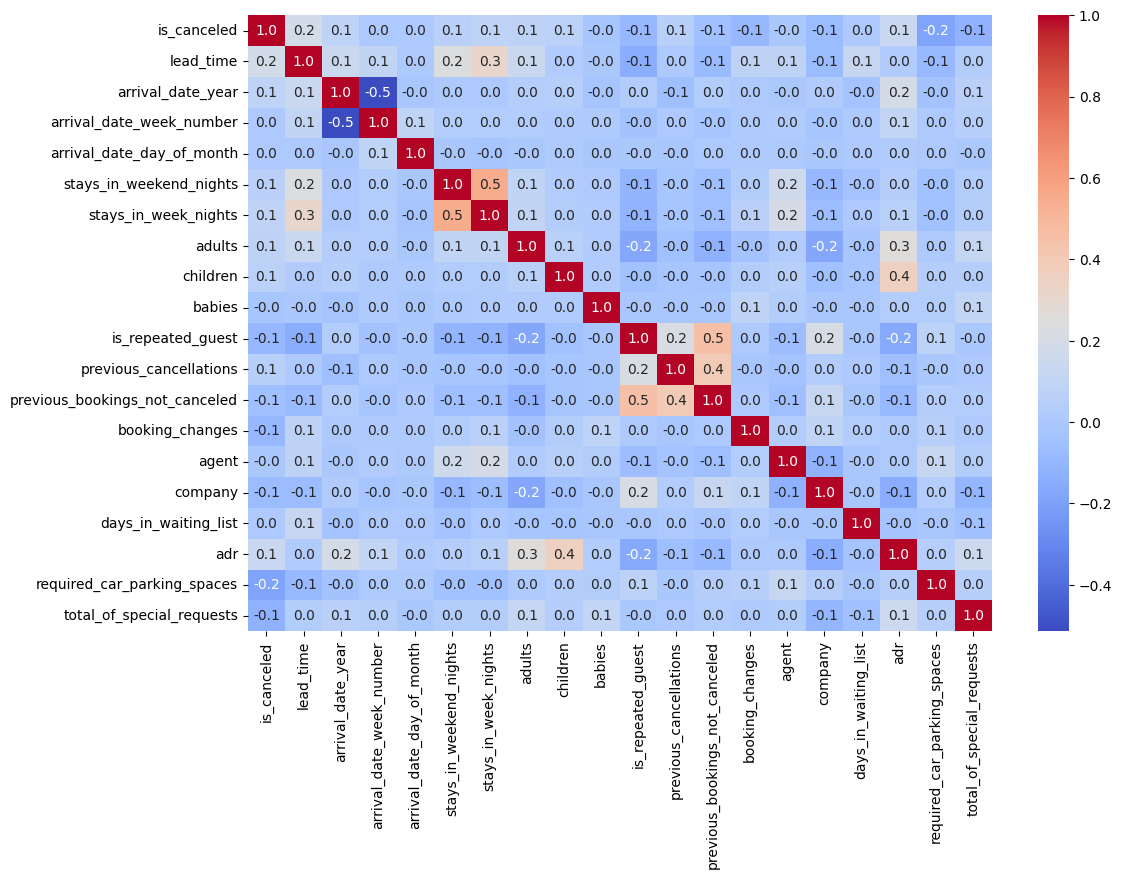

In [162]:
#korelasi menggunakan heatmap
df_num= df.select_dtypes(include = ['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.show()

jika dilihat tidak ada korelasi yang signifikan untuk kolom is_canceled, maka dari itu akan dilakukan beberapa analisa yang dapat mengetahui pengaruh cancellation pada reservasi serta mengidentifikasi pola untuk overbooking dan kebijakan pembatalan:

1. Analisis Faktor yang Mempengaruhi Pembatalan
    - Hubungan lead time dengan pembatalan
    - Bagaimana jenis hotel (City vs Resort) mempengaruhi pembatalan
    - Bagaimana customer type (Transient, Contract, Group) berpengaruh
    - Market segment mana yang paling sering melakukan pembatalan
    - Apakah harga kamar (ADR) berpengaruh terhadap pembatalan?
    - Pengaruh panjang waktu menginap terhadap pembatalan

2. Identifikasi Pola untuk Overbooking dan Kebijakan Pembatalan
    - Musim dengan tingkat pembatalan tertinggi (peak vs low season)
    - Perilaku tamu berdasarkan segmentasi (Business, Leisure, dll.)
    - Agen dan perusahaan mana yang memiliki tingkat pembatalan tertinggi
    - Distribusi negara asal tamu yang sering membatalkan reservasi

### **Distribusi Status Reservasi (Canceled vs Not Canceled)**

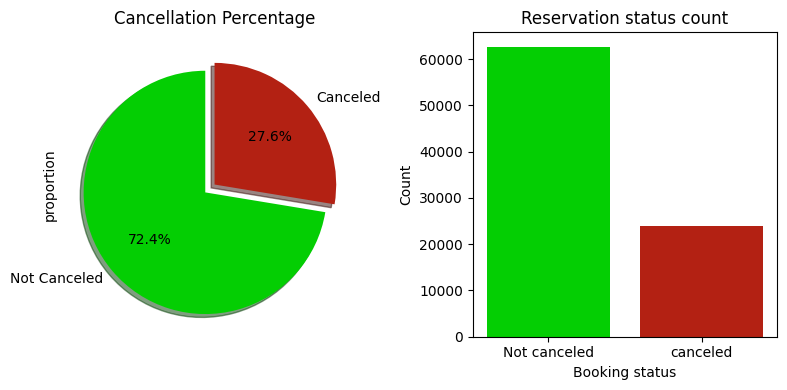

Proporsi :
Persentase data yang tidak dibatalkan:  72.39984747466576 % , dan Persentase data yang dibatalkan:  27.600152525334227 %

Jumlah data :
jumlah data yang tidak dibatalkan:  62657 , dan data yang dibatalkan:  23886


In [163]:
cancel = df['is_canceled'].value_counts(normalize=True)

# Pie chart
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
cancel.plot.pie(autopct="%1.1f%%", startangle=90, explode=[0.1, 0], shadow=True, colors=['#04CE03', '#b32113'], labels=["Not Canceled", "Canceled"])
plt.title("Cancellation Percentage")

# Bar chart
plt.subplot(1, 2, 2)
plt.bar(['Not canceled', 'canceled'], df['is_canceled'].value_counts(), color=['#04CE03', '#b32113'])
plt.title('Reservation status count')
plt.xlabel('Booking status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

print("Proporsi :")
print("Persentase data yang tidak dibatalkan: ", cancel[0]*100, "%",
      ", dan Persentase data yang dibatalkan: ", cancel[1]*100, "%")

print("\nJumlah data :")
print ("jumlah data yang tidak dibatalkan: ", df['is_canceled'].value_counts()[0],
       ", dan data yang dibatalkan: ", df['is_canceled'].value_counts()[1])

**insight:** <br>
- 27.6% dari total reservasi dibatalkan, sementara 72.4% tetap aktif.
- Jumlah pembatalan sebanyak 23.886 dari total 86.543 reservasi, ini menunjukkan bahwa lebih dari 1 dari 4 reservasi mengalami pembatalan.

hal ini mengakibatkan Tingkat pembatalan ini cukup signifikan, terutama bagi hotel yang tidak menerapkan kebijakan reservasi tanpa pembatalan (non-refundable booking), karena akan berpengaruh pada pendapatan.

### **4.1  Analisis Faktor yang Mempengaruhi Pembatalan**

#### **4.1.1 Hubungan Lead time dengan pembatalan (lead time vs cancellation)**

lead time adalah jumlah hari antara tanggal pemesanan dan tanggal check-in tamu.

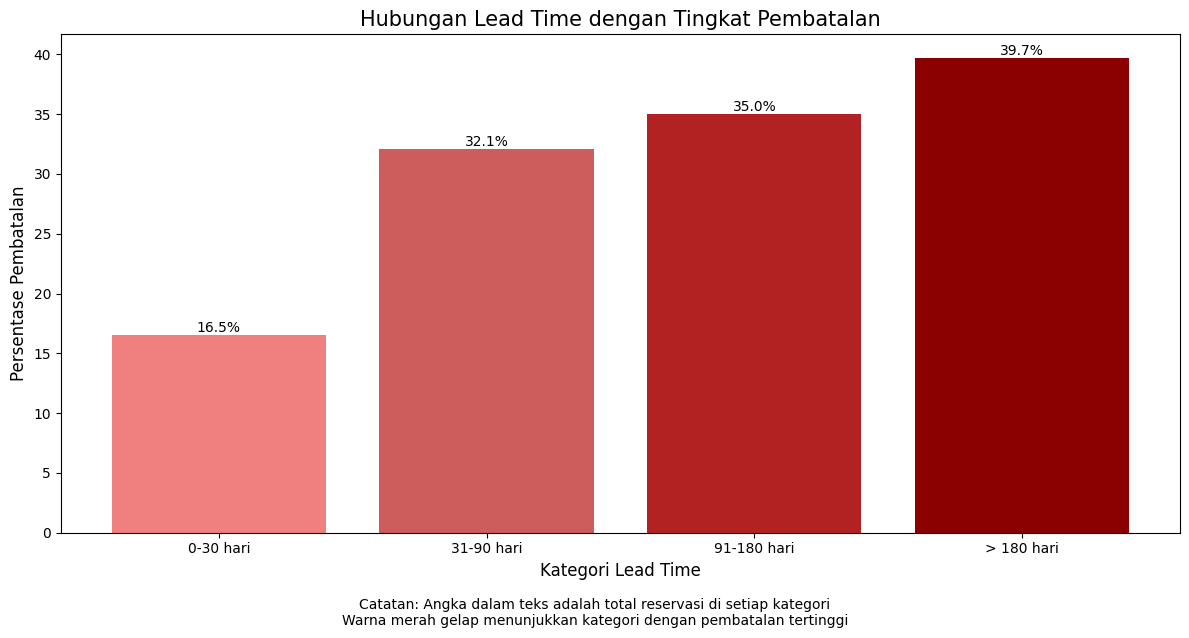

  kategori_lead_time  total  dibatalkan  persentase_pembatalan
0          0-30 hari  34105        5641              16.540097
1         31-90 hari  22630        7257              32.068051
2        91-180 hari  18144        6359              35.047399
3         > 180 hari  11664        4629              39.686214


In [164]:
# Buat kategori lead time
def kategorikan_lead_time(lead_time):
    if lead_time <= 30:
        return '0-30 hari'
    elif lead_time <= 90:
        return '31-90 hari'
    elif lead_time <= 180:
        return '91-180 hari'
    else:
        return '> 180 hari'

# Tambahkan kolom kategori lead time
df['kategori_lead_time'] = df['lead_time'].apply(kategorikan_lead_time)

# Hitung tingkat pembatalan per kategori
kategori_pembatalan = df.groupby('kategori_lead_time')['is_canceled'].agg([
    ('total', 'count'),
    ('dibatalkan', 'sum'),
    ('persentase_pembatalan', 'mean')
]).reset_index()

kategori_pembatalan['persentase_pembatalan'] *= 100

# Visualisasi
plt.figure(figsize=(12,6))

# Bar plot persentase pembatalan
bars = plt.bar(kategori_pembatalan['kategori_lead_time'], 
               kategori_pembatalan['persentase_pembatalan'], 
               color = ['lightcoral', 'indianred', 'firebrick', 'darkred'])

# Tambahkan label persentase di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.title('Hubungan Lead Time dengan Tingkat Pembatalan', fontsize=15)
plt.xlabel('Kategori Lead Time', fontsize=12)
plt.ylabel('Persentase Pembatalan', fontsize=12)

# Tambahkan catatan total reservasi di bawah x-axis
plt.figtext(0.5, -0.05, 
            'Catatan: Angka dalam teks adalah total reservasi di setiap kategori\n'
            'Warna merah gelap menunjukkan kategori dengan pembatalan tertinggi', 
            ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Cetak detail untuk referensi
print(kategori_pembatalan)

Insight : 
- Pemesanan dengan lead time yang lebih panjang lebih rentan terhadap pembatalan.
- Hal ini disebabkan oleh ketidakpastian yang lebih besar ketika pelanggan memesan jauh-jauh hari.

**Uji Statistik** <br>
Karena kita ingin melihat apakah ada hubungan antara dua variabel kategorikal (lead time dan status pembatalan), uji statistik yang paling tepat adalah uji Chi-Square (Chi-kuadrat) untuk independensi.

Hipotesis:
- Hipotesis Nol (H0): Tidak ada hubungan antara lead time dan status pembatalan.
- Hipotesis Alternatif (H1): Ada hubungan antara lead time dan status pembatalan.

#### **4.1.2 Bagaimana jenis hotel (City vs Resort) mempengaruhi pembatalan (hotel vs cancellation)**

Dalam industri perhotelan, Resort Hotel dan City Hotel memiliki konsep dan target pasar yang berbeda. Masing-masing memiliki karakteristik unik yang memengaruhi pola pemesanan, tingkat pembatalan, serta strategi bisnis hotel.
- resort hotel : Hotel yang berlokasi di area wisata, seperti pantai, pegunungan, atau tempat rekreasi.
- City Hotel : Hotel yang berlokasi di kota besar, sering digunakan untuk perjalanan bisnis dan keperluan singkat lainnya.

**STACKED BAR CHART**

<Figure size 1000x800 with 0 Axes>

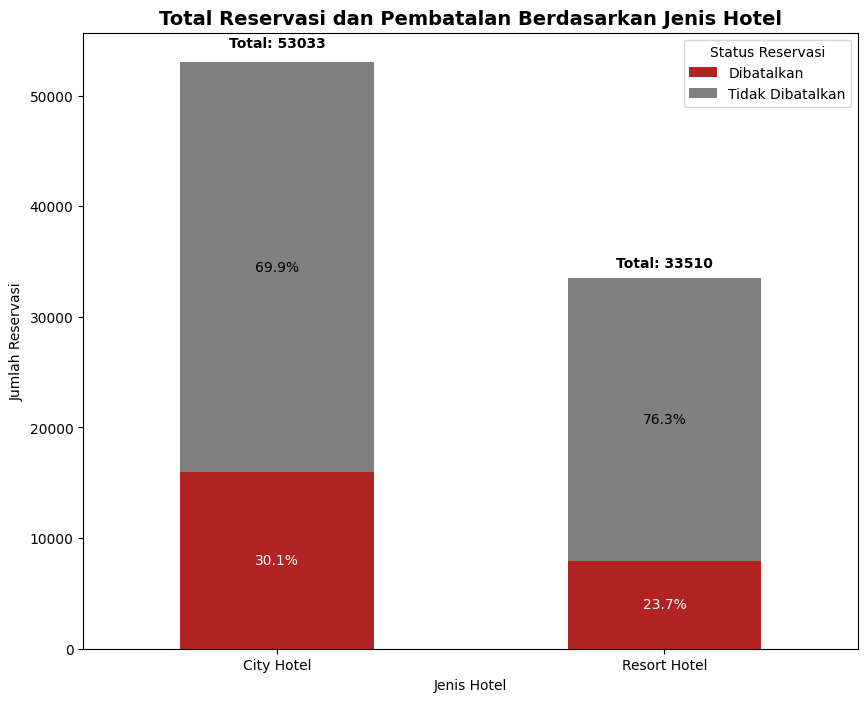

In [165]:
# Hitung jumlah total reservasi dan jumlah pembatalan per jenis hotel
cancellation_by_hotel = df.groupby('hotel')['is_canceled'].agg(['sum', 'count'])
cancellation_by_hotel['not_canceled'] = cancellation_by_hotel['count'] - cancellation_by_hotel['sum']

# Warna yang lebih kontras
colors = ['firebrick', 'gray']

# Visualisasi
plt.figure(figsize=(10, 8))

# Stacked bar plot untuk perbandingan jumlah reservasi dan pembatalan
ax = cancellation_by_hotel[['sum', 'not_canceled']].rename(columns={'sum': 'Dibatalkan', 'not_canceled': 'Tidak Dibatalkan'}).plot(
    kind='bar', stacked=True, color=colors, figsize=(10, 8))
plt.title('Total Reservasi dan Pembatalan Berdasarkan Jenis Hotel', fontsize=14, fontweight='bold')
plt.ylabel('Jumlah Reservasi')
plt.xlabel('Jenis Hotel')
plt.xticks(rotation=0)
plt.legend(title='Status Reservasi')

# Tambahkan label persentase pada batang
for i, (total, canceled) in enumerate(zip(cancellation_by_hotel['count'], cancellation_by_hotel['sum'])):
    canceled_pct = (canceled / total) * 100
    not_canceled_pct = 100 - canceled_pct
    
    # Tambahkan total reservasi di atas batang dengan ukuran lebih besar
    plt.text(i, total + (total * 0.02), f'Total: {total}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
    
    plt.text(i, canceled / 2, f'{canceled_pct:.1f}%', ha='center', va='center', fontsize=10, color='white')
    plt.text(i, canceled + (not_canceled_pct / 2 * total / 100), f'{not_canceled_pct:.1f}%', ha='center', va='center', fontsize=10, color='black')

plt.show()


Insight : 
- City Hotel memiliki risiko pembatalan lebih tinggi dibandingkan Resort Hotel
- Perbedaan tingkat pembatalan antara kedua hotel sekitar 6.4%
- City Hotel menghadapi tantangan lebih besar dalam mempertahankan reservasi dibandingkan Resort Hotel.

Perlu kita lakukan uji chi-square agar semakin valid menunjukkan perbedaan signifikan dalam pola pembatalan reservasi antara City Hotel dan Resort Hotel

- H0 : Tidak ada hubungan antara jenis hotel dan status pembatalan reservasi. Dengan kata lain, status pembatalan reservasi tidak bergantung pada jenis hotel.
- H1 (Hipotesis Alternatif): Ada hubungan antara jenis hotel dan status pembatalan reservasi. Status pembatalan reservasi bergantung pada jenis hotel.

In [166]:
# Buat tabel kontingensi
contingency_table = pd.crosstab(df['hotel'], df['is_canceled'])

# Uji Chi-Square
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Tampilkan hasil
print("Uji Chi-Square untuk Hubungan Jenis Hotel dan Status Reservasi")
print("=" * 60)
print(f"Nilai Chi-Square: {chi2:.4f}")
print(f"Derajat Kebebasan: {dof}")
print(f"Nilai P (p-value): {p_value:.4f}")

# Tampilkan tabel kontingensi
print("\nTabel Kontingensi:")
print(contingency_table)

# Interpretasi
alpha = 0.05
print("\nInterpretasi:")
if p_value < alpha:
    print(f"Tolak H0 (p-value {p_value:.4f} < {alpha})")
    print("Terdapat hubungan signifikan antara jenis hotel dan status pembatalan reservasi")
else:
    print(f"Gagal Tolak H0 (p-value {p_value:.4f} >= {alpha})")
    print("Tidak cukup bukti untuk menyatakan hubungan antara jenis hotel dan status pembatalan reservasi")

# Tampilkan tabel frekuensi yang diharapkan
print("\nFrekuensi yang Diharapkan:")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns))

Uji Chi-Square untuk Hubungan Jenis Hotel dan Status Reservasi
Nilai Chi-Square: 413.9600
Derajat Kebebasan: 1
Nilai P (p-value): 0.0000

Tabel Kontingensi:
is_canceled       0      1
hotel                     
City Hotel    37092  15941
Resort Hotel  25565   7945

Interpretasi:
Tolak H0 (p-value 0.0000 < 0.05)
Terdapat hubungan signifikan antara jenis hotel dan status pembatalan reservasi

Frekuensi yang Diharapkan:
is_canceled              0             1
hotel                                   
City Hotel    38395.811111  14637.188889
Resort Hotel  24261.188889   9248.811111


**Insight:** <br>
menolak H₀ (hipotesis nol), yang berarti ada hubungan yang signifikan antara tipe hotel dan Pembatalan reservasi. Hal ini membuktikan bahwa tipe hotel yang berbeda memiliki kecenderungan pembatalan yang berbeda.

#### **4.1.3 Bagaimana customer type (Transient, Contract, Group) berpengaruh (Customer Type vs Cancellation)**

Customer Type mengacu pada kategori tamu berdasarkan pola reservasi dan tujuan perjalanan mereka. adapun beberapa customer type:
- Transient : 	Tamu individu yang memesan sendiri tanpa bagian dari grup atau kontrak
- Transient-Party : Sekelompok kecil tamu yang memesan bersama tetapi tidak melalui kontrak resmi
- Contract : tamu hotel dari perusahaan atau event organizers yang memesan dalam jumlah besar
- group : Pemesanan dalam jumlah besar untuk grup (misalnya, konferensi, tour wisata, acara pernikahan)



<Figure size 800x600 with 0 Axes>

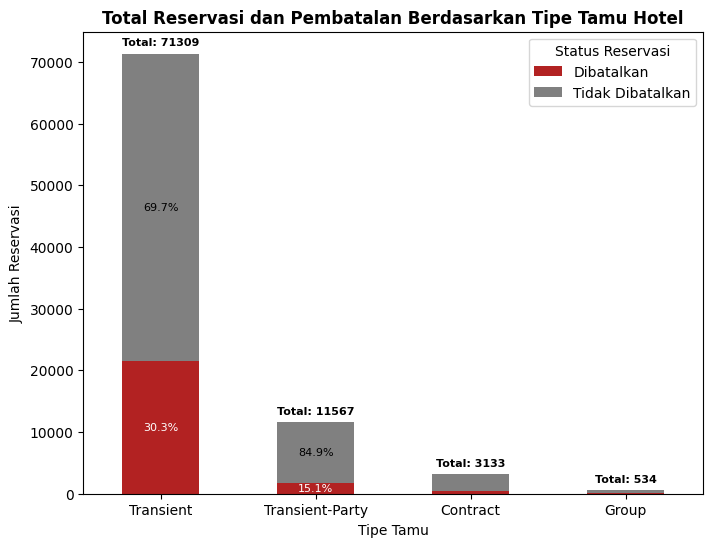

                 Not Canceled  Canceled  % Canceled
customer_type                                      
Transient               49738     21571   30.250039
Transient-Party          9816      1751   15.137892
Contract                 2622       511   16.310246
Group                     481        53    9.925094


In [167]:
import matplotlib.pyplot as plt
import pandas as pd

# Stacked bar plot berdasarkan tipe tamu hotel
df_sorted = df.groupby('customer_type')['is_canceled'].agg(['sum', 'count']).sort_values(by='count', ascending=False)
df_sorted['not_canceled'] = df_sorted['count'] - df_sorted['sum']

# Warna yang lebih kontras
colors = ['firebrick', 'gray']

# Visualisasi
plt.figure(figsize=(8, 6))

ax2 = df_sorted[['sum', 'not_canceled']].rename(columns={'sum': 'Dibatalkan', 'not_canceled': 'Tidak Dibatalkan'}).plot(
    kind='bar', stacked=True, color=colors, figsize=(8, 6))
plt.title('Total Reservasi dan Pembatalan Berdasarkan Tipe Tamu Hotel', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Reservasi')
plt.xlabel('Tipe Tamu')
plt.xticks(rotation=0)
plt.legend(title='Status Reservasi')

# Tambahkan label persentase hanya untuk Transient dan Transient-Party
for i, (customer_type, row) in enumerate(df_sorted.iterrows()):
    if customer_type in ['Transient', 'Transient-Party']:
        total, canceled = row['count'], row['sum']
        canceled_pct = (canceled / total) * 100
        not_canceled_pct = 100 - canceled_pct

        plt.text(i, canceled / 2, f'{canceled_pct:.1f}%', ha='center', va='center', fontsize=8, color='white')
        plt.text(i, canceled + (not_canceled_pct / 2 * total / 100), f'{not_canceled_pct:.1f}%', ha='center', va='center', fontsize=8, color='black')

for i, (customer_type, row) in enumerate(df_sorted.iterrows()):
    if customer_type in ['Transient', 'Transient-Party', 'Contract', 'Group']:
        total, canceled = row['count'], row['sum']
        canceled_pct = (canceled / total) * 100
        not_canceled_pct = 100 - canceled_pct

        plt.text(i, total + 1000, f'Total: {total}', ha='center', va='bottom', fontsize=8, fontweight='bold', color='black')

plt.show()

# Tampilkan tabel kontingensi
df_contingency = df.pivot_table(index='customer_type', columns='is_canceled', aggfunc='size', fill_value=0)
df_contingency.columns = ['Not Canceled', 'Canceled']
df_contingency['% Canceled'] = (df_contingency['Canceled'] / (df_contingency['Canceled'] + df_contingency['Not Canceled'])) * 100

# Urutkan tabel kontingensi
order = ['Transient', 'Transient-Party', 'Contract', 'Group']
df_sorted = df_sorted.loc[order]
df_contingency = df_contingency.loc[order]
print(df_contingency)


**Insight:**
- Transient customers (tamu hotel individu) memiliki cancellation rate tertinggi (+-30%). Hal ini bisa diakibatkan kefleksibiliatas dalam membuat dan membatalkan reservasi.
- Contract customers (tamu hotel dari perusahaan atau event organizers) memiliki tingkat pembatalan yang lebih rendah/ mendekati setengah persen transient customer, karena biasanya sudah memiliki perjanjian kontrak dengan hotel.
- Transient party memiliki tingkat pembatalan (+-15%), Hal ini bisa disebabkan lebih stabil dibanding transient karena melibatkan orang lain serta memiliki tujuan yang jelas
- Group bookings memiliki cancellation rate paling rendah, hal ini disebabkan adanya deposit/pinalty jika batal serta memiliki tujuan yang jelas

Dapat disimpulkan bahwa : 
- Tamu individu (Transient) paling tidak dapat diprediksi, dengan tingkat pembatalan hampir sepertiga dari total reservasi
- Semakin terstruktur tipe tamu (dari individu ke kelompok), semakin rendah tingkat pembatalan
- Reservasi untuk acara korporat dan group menunjukkan komitmen yang jauh lebih tinggi

Rekomendasi :
Pertimbangkan insentif atau kebijakan yang mendorong konfirmasi reservasi lebih awal

Sama seperti jenis hotel perlu kita lakukan uji chi-square agar semakin valid menunjukkan perbedaan signifikan dalam pola pembatalan reservasi antara tipe tamu

- H0 (Hipotesis Null): Tidak ada hubungan antara tipe tamu dan status pembatalan reservasi. Dengan kata lain, status pembatalan reservasi tidak bergantung pada tipe tamu hotel.
- H1 (Hipotesis Alternatif): Ada hubungan antara tipe tamu dan status pembatalan reservasi. Status pembatalan reservasi bergantung pada tipe tamu hotel.

In [168]:
# Tabel kontingensi
contingency_table = df_contingency[['Not Canceled', 'Canceled']].values

# Uji Chi-Square
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Tampilkan hasil
print("Uji Chi-Square untuk Hubungan Tipe Tamu dan Status Reservasi")
print("=" * 60)
print(f"Nilai Chi-Square: {chi2:.4f}")
print(f"Derajat Kebebasan: {dof}")
print(f"Nilai P (p-value): {p_value:.4f}")

# Interpretasi
alpha = 0.05
print("\nInterpretasi:")
if p_value < alpha:
    print(f"Tolak H0 (p-value {p_value:.4f} < {alpha})")
    print("Terdapat hubungan signifikan antara tipe tamu dan status pembatalan reservasi")
else:
    print(f"Gagal Tolak H0 (p-value {p_value:.4f} >= {alpha})")
    print("Tidak cukup bukti untuk menyatakan hubungan antara tipe tamu dan status pembatalan reservasi")

# Tampilkan tabel frekuensi yang diharapkan
print("\nFrekuensi yang Diharapkan:")
print(pd.DataFrame(expected, 
                   index=df_contingency.index, 
                   columns=['Not Canceled (Expected)', 'Canceled (Expected)']))

Uji Chi-Square untuk Hubungan Tipe Tamu dan Status Reservasi
Nilai Chi-Square: 1432.9238
Derajat Kebebasan: 3
Nilai P (p-value): 0.0000

Interpretasi:
Tolak H0 (p-value 0.0000 < 0.05)
Terdapat hubungan signifikan antara tipe tamu dan status pembatalan reservasi

Frekuensi yang Diharapkan:
                 Not Canceled (Expected)  Canceled (Expected)
customer_type                                                
Transient                   51627.607236         19681.392764
Transient-Party              8374.490357          3192.509643
Contract                     2268.287221           864.712779
Group                         386.615186           147.384814


**Insight:**
- Menolak H0, ini berarti terdapat hubungan signifikan antara tipe tamu dan pembatalan.

#### **4.1.4 Market segment mana yang paling sering melakukan pembatalan (Market Segment vs Cancellation)**

Market segment dalam dataset pemesanan hotel mengacu pada sumber atau jenis tamu hotel yang melakukan reservasi. Berikut adalah kategori market segment:
- Online TA (Travel Agency) : Pemesanan melalui agen perjalanan online.
- Offline TA/TO (Travel Agent/Tour Operator) : Pemesanan melalui agen perjalanan offline atau operator tur.
- Direct : Pemesanan langsung melalui website atau call center hotel.
- Corporate : Pemesanan oleh perusahaan untuk karyawan yang bepergian untuk bisnis.
- Groups : Pemesanan untuk kelompok besar, seperti rombongan wisata atau acara bisnis.
- Complementary : Reservasi gratis yang diberikan oleh hotel, misalnya untuk tamu VIP, staf hotel, atau hadiah promosi.
- Aviation : Pemesanan dari maskapai penerbangan untuk kru atau penumpang yang mengalami delay/cancellation penerbangan.

<Figure size 800x600 with 0 Axes>

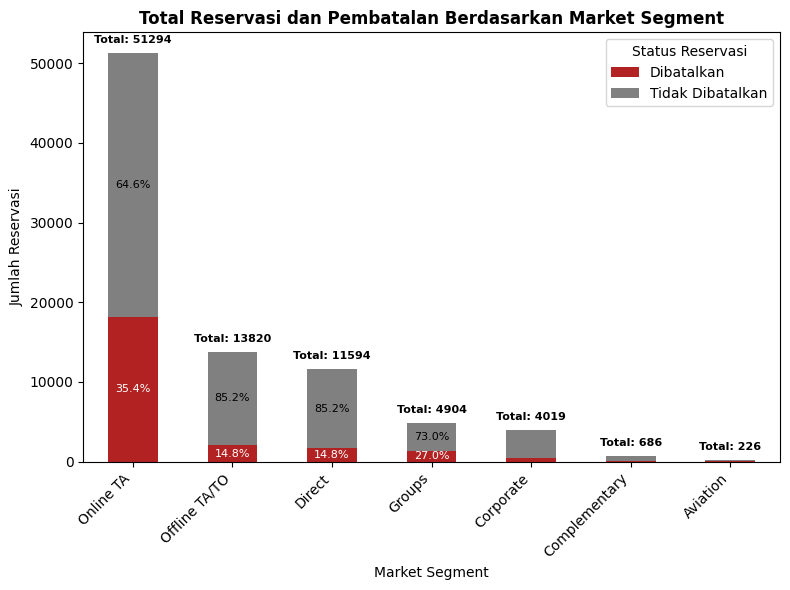

                Not Canceled  Canceled  % Canceled
market_segment                                    
Aviation                 181        45   19.911504
Complementary            602        84   12.244898
Corporate               3522       497   12.366260
Direct                  9878      1716   14.800759
Groups                  3579      1325   27.018760
Offline TA/TO          11770      2050   14.833575
Online TA              33125     18169   35.421297


In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agregasi data berdasarkan market segment
df_sorted = df.groupby('market_segment')['is_canceled'].agg(['sum', 'count']).sort_values(by='count', ascending=False)
df_sorted['not_canceled'] = df_sorted['count'] - df_sorted['sum']

# Warna yang lebih kontras
colors = ['firebrick', 'gray']

# Visualisasi
plt.figure(figsize=(8, 6))

ax2 = df_sorted[['sum', 'not_canceled']].rename(columns={'sum': 'Dibatalkan', 'not_canceled': 'Tidak Dibatalkan'}).plot(
    kind='bar', stacked=True, color=colors, figsize=(8, 6))
plt.title('Total Reservasi dan Pembatalan Berdasarkan Market Segment', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Reservasi')
plt.xlabel('Market Segment')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status Reservasi')

# Tambahkan label persentase
for i, (market_segment, row) in enumerate(df_sorted.iterrows()):
    total, canceled = row['count'], row['sum']
    canceled_pct = (canceled / total) * 100
    not_canceled_pct = 100 - canceled_pct

    plt.text(i, total + 1000, f'Total: {total}', ha='center', va='bottom', fontsize=8, fontweight='bold', color='black')

# Tambahkan label persentase
for i, (market_segment, row) in enumerate(df_sorted.iterrows()):
    if market_segment in ['Online TA', 'Offline TA/TO', 'Groups', 'Direct']:
        total, canceled = row['count'], row['sum']
        canceled_pct = (canceled / total) * 100
        not_canceled_pct = 100 - canceled_pct

        plt.text(i, canceled / 2, f'{canceled_pct:.1f}%', ha='center', va='center', fontsize=8, color='white')
        plt.text(i, canceled + (not_canceled_pct / 2 * total / 100), f'{not_canceled_pct:.1f}%', ha='center', va='center', fontsize=8, color='black')




plt.tight_layout()
plt.show()

# Tampilkan tabel kontingensi
df_contingency = df.pivot_table(index='market_segment', columns='is_canceled', aggfunc='size', fill_value=0)
df_contingency.columns = ['Not Canceled', 'Canceled']
df_contingency['% Canceled'] = (df_contingency['Canceled'] / (df_contingency['Canceled'] + df_contingency['Not Canceled'])) * 100

print(df_contingency)

**Insight:**
- Online Travel Agency (Online TA) memiliki cancellation rate tertinggi (di atas 35%) artinya adalah tamu hotel yang memesan melalui agen perjalanan online lebih sering membatalkan pesanan mereka. hal ini bisa disebabkan oleh  fleksibilitas yang tinggi dalam pembatalan, banyaknya pilihan hotel lain, dan kebiasaan tamu hotel untuk membandingkan harga.
- sedangkan untuk pemesanan direct dan juga offline TA/TO memiliki cancellation rate mendekati setengah dari online TA, maka dapat disimpulkan bahwa tamu hotel yang memesan melalui agen perjalanan tradisional (tour operator) dan Pemesanan langsung ke hotel lebih jarang dibatalkan karena tamu lebih yakin dengan keputusannya.

Sama seperti sebelumnya, kita perlu melakukan uji chi-square untuk memvalidasi secara statistik perbedaan pola pembatalan reservasi antara market segment yang berbeda. Pengujian ini akan membantu kita memahami apakah perbedaan tingkat pembatalan yang terlihat secara visual memiliki signifikansi statistik.

- H0 (Hipotesis Null): Tidak ada hubungan antara market segment dan status pembatalan reservasi. Dengan kata lain, status pembatalan reservasi tidak bergantung pada market segment.
- H1 (Hipotesis Alternatif): Ada hubungan antara market segment dan status pembatalan reservasi. Status pembatalan reservasi bergantung pada market segment.

In [170]:
# Buat tabel kontingensi
contingency_table = pd.crosstab(df['market_segment'], df['is_canceled'])

# Uji Chi-Square
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Tampilkan hasil
print("Uji Chi-Square untuk Hubungan Market Segment dan Status Reservasi")
print("=" * 60)
print(f"Nilai Chi-Square: {chi2:.4f}")
print(f"Derajat Kebebasan: {dof}")
print(f"Nilai P (p-value): {p_value:.4f}")

# Tampilkan tabel kontingensi
print("\nTabel Kontingensi:")
print(contingency_table)

# Interpretasi
alpha = 0.05
print("\nInterpretasi:")
if p_value < alpha:
    print(f"Tolak H0 (p-value {p_value:.4f} < {alpha})")
    print("Terdapat hubungan signifikan antara market segment dan status pembatalan reservasi")
else:
    print(f"Gagal Tolak H0 (p-value {p_value:.4f} >= {alpha})")
    print("Tidak cukup bukti untuk menyatakan hubungan antara market segment dan status pembatalan reservasi")

# Tampilkan tabel frekuensi yang diharapkan
print("\nFrekuensi yang Diharapkan:")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns))

# Hitung persentase pembatalan untuk setiap market segment
canceled_percentage = (contingency_table[1] / (contingency_table[0] + contingency_table[1]) * 100).round(2)
print("\nPersentase Pembatalan per Market Segment:")
print(canceled_percentage)

Uji Chi-Square untuk Hubungan Market Segment dan Status Reservasi
Nilai Chi-Square: 4203.1698
Derajat Kebebasan: 6
Nilai P (p-value): 0.0000

Tabel Kontingensi:
is_canceled         0      1
market_segment              
Aviation          181     45
Complementary     602     84
Corporate        3522    497
Direct           9878   1716
Groups           3579   1325
Offline TA/TO   11770   2050
Online TA       33125  18169

Interpretasi:
Tolak H0 (p-value 0.0000 < 0.05)
Terdapat hubungan signifikan antara market segment dan status pembatalan reservasi

Frekuensi yang Diharapkan:
is_canceled                0             1
market_segment                            
Aviation          163.623655     62.376345
Complementary     496.662954    189.337046
Corporate        2909.749870   1109.250130
Direct           8394.038316   3199.961684
Groups           3550.488520   1353.511480
Offline TA/TO   10005.658921   3814.341079
Online TA       37136.777764  14157.222236

Persentase Pembatalan per Marke

**Insight:**
- grafik pada setiap jenis hotel menunjukkan bahwa Online Travel Agent (OTA) mendominasi, ini menunjukkan bahwa orang lebih cenderung memasan menggunakan OTA.
- asumsi salah karena Segmen korporat pada resort hotel lebih besar dibanding city hotel, maka tidak dapat disimpulkan bahwa orang yang memesan resort hotel kebanyakan pembisnis.
- tetapi ini menjelaskan bahwa pembatalan atau cancellation rate terbesar yaitu city hotel, terjadi karena proporsi OTA pada city hotel > resort hotel, sedangkan jika dilihat dari permasalahan sebelumnya bahwa pemesanan OTA memiliki tingkat cancelation rate yang tinggi


#### **4.1.5 Apakah harga kamar (ADR) berpengaruh terhadap pembatalan? (ADR (Average Daily Rate) vs Cancellation)**

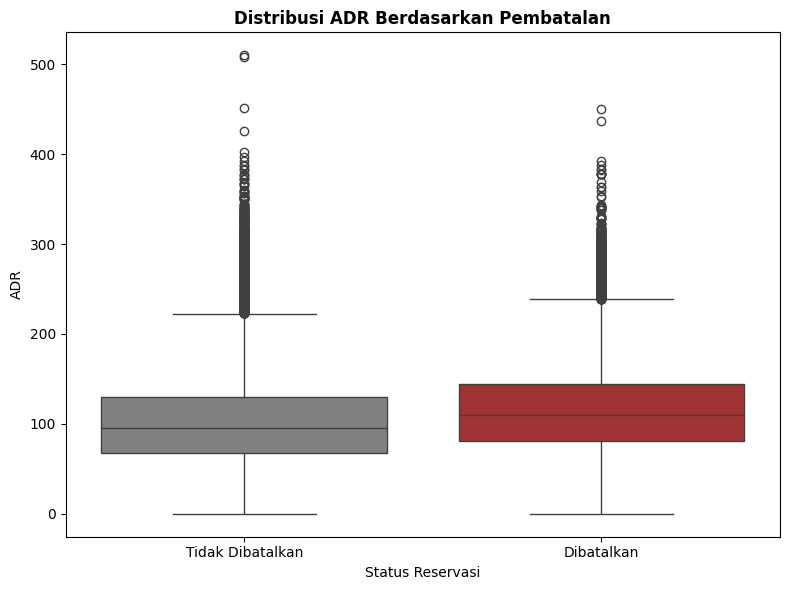

Ringkasan Statistik ADR:
   is_canceled        mean  median  count
0            0  102.548903    95.0  62657
1            1  117.812361   109.8  23886


In [171]:
# Agregasi data untuk perhitungan statistik
df_adr_summary = df.groupby('is_canceled')['adr'].agg(['mean', 'median', 'count']).reset_index()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_canceled', y='adr', data=df, palette=['gray', 'firebrick'])
plt.title('Distribusi ADR Berdasarkan Pembatalan', fontsize=12, fontweight='bold')
plt.xlabel('Status Reservasi')
plt.ylabel('ADR')
plt.xticks(ticks=[0, 1], labels=['Tidak Dibatalkan', 'Dibatalkan'], ha='center')


plt.tight_layout()
plt.show()

# Tampilkan ringkasan statistik
print("Ringkasan Statistik ADR:")
print(df_adr_summary)

**Insight:**
- Reservasi yang dibatalkan memiliki rata-rata harga kamar (ADR) yang lebih tinggi dibandingkan reservasi yang tidak dibatalkan.
- Namun, ada banyak outlier pada ADR di kategori Not Canceled, yang berarti ada beberapa reservasi dengan harga tinggi tetap berjalan.
- tamu hotel yang membayar harga kamar lebih tinggi lebih mungkin untuk membatalkan, mungkin karena mereka lebih sensitif terhadap biaya atau karena mereka mencari opsi lain dengan harga lebih baik.

untuk memperkuat insight tersebut, akan dibuktikan dengan uji statistik menggunakan mann whitney U

**Uji statistik**

In [172]:
import scipy.stats as stats

# Uji Normalitas dengan Shapiro-Wilk
adr_not_canceled = df[df['is_canceled'] == 0]['adr']
adr_canceled = df[df['is_canceled'] == 1]['adr']

print("Uji Normalitas Shapiro-Wilk")
print("=" * 30)
_, p_value_not_canceled = stats.shapiro(adr_not_canceled)
_, p_value_canceled = stats.shapiro(adr_canceled)

print(f"Reservasi Tidak Dibatalkan - p-value: {p_value_not_canceled:.4f}")
print(f"Reservasi Dibatalkan - p-value: {p_value_canceled:.4f}")

# Pilih uji statistik berdasarkan normalitas
alpha = 0.05
if p_value_not_canceled > alpha and p_value_canceled > alpha:
    # Jika data terdistribusi normal, gunakan independent t-test
    t_statistic, p_value = stats.ttest_ind(adr_not_canceled, adr_canceled)
    test_name = "Independent T-Test"
    statistic = t_statistic
else:
    # Jika data tidak terdistribusi normal, gunakan Mann-Whitney U test
    statistic, p_value = stats.mannwhitneyu(adr_not_canceled, adr_canceled)
    test_name = "Mann-Whitney U Test"

# Tampilkan hasil uji
print(f"\nHasil {test_name}")
print("=" * 30)
print(f"Statistik Uji: {statistic:.4f}")
print(f"Nilai P (p-value): {p_value:.4f}")

# Interpretasi
print("\nInterpretasi:")
if p_value < alpha:
    print(f"Tolak H0 (p-value {p_value:.4f} < {alpha})")
    print("Terdapat perbedaan signifikan dalam ADR antara reservasi yang dibatalkan dan tidak dibatalkan")
else:
    print(f"Gagal Tolak H0 (p-value {p_value:.4f} >= {alpha})")
    print("Tidak cukup bukti untuk menyatakan perbedaan ADR antara reservasi yang dibatalkan dan tidak dibatalkan")

# Deskriptif statistik tambahan
print("\nStatistik Deskriptif:")
print("Tidak Dibatalkan:")
print(adr_not_canceled.describe())
print("\nDibatalkan:")
print(adr_canceled.describe())

Uji Normalitas Shapiro-Wilk
Reservasi Tidak Dibatalkan - p-value: 0.0000
Reservasi Dibatalkan - p-value: 0.0000

Hasil Mann-Whitney U Test
Statistik Uji: 612258443.5000
Nilai P (p-value): 0.0000

Interpretasi:
Tolak H0 (p-value 0.0000 < 0.05)
Terdapat perbedaan signifikan dalam ADR antara reservasi yang dibatalkan dan tidak dibatalkan

Statistik Deskriptif:
Tidak Dibatalkan:
count    62657.000000
mean       102.548903
std         51.173930
min          0.000000
25%         68.000000
50%         95.000000
75%        129.900000
max        510.000000
Name: adr, dtype: float64

Dibatalkan:
count    23886.000000
mean       117.812361
std         51.907428
min          0.000000
25%         81.000000
50%        109.800000
75%        144.000000
max        450.000000
Name: adr, dtype: float64


**Insight:**<br>
p-value < 0.05, berarti ADR memiliki perbedaan signifikan antara reservasi yang dibatalkan dan tidak.
- Harga tinggi dapat menjadi faktor resiko pembatalan
- hasil uji statistik yaitu p<0.05, dapat disimpulkan bahwa harga kamar memang mempengaruhi pembatalan.

#### **4.1.6 Pengaruh panjang waktu menginap terhadap pembatalan (Durasi Menginap vs Cancellation)**

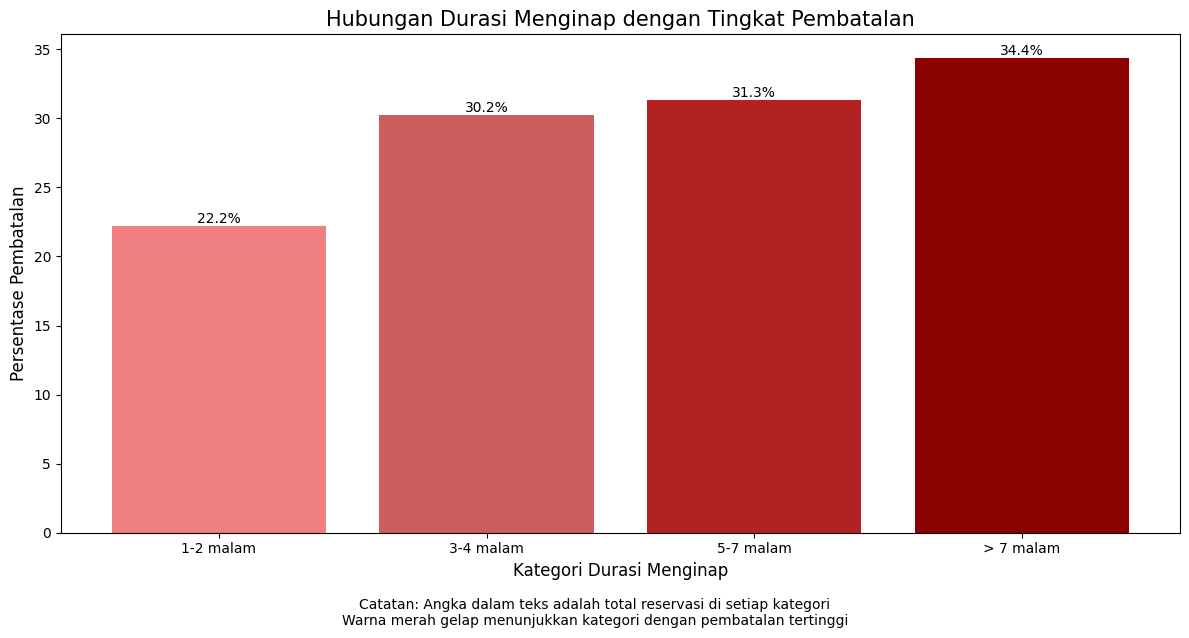

  kategori_durasi_menginap  total  dibatalkan  persentase_pembatalan
0                1-2 malam  33082        7345              22.202406
1                3-4 malam  31224        9434              30.213938
2                5-7 malam  17433        5456              31.296966
3                > 7 malam   4804        1651              34.367194


In [173]:
# Calculate total stay duration
df['total_stays'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Categorize stay duration
def kategorikan_durasi_menginap(durasi):
    if durasi <= 2:
        return '1-2 malam'
    elif durasi <= 4:
        return '3-4 malam'
    elif durasi <= 7:
        return '5-7 malam'
    else:
        return '> 7 malam'

# Add stay duration category column
df['kategori_durasi_menginap'] = df['total_stays'].apply(kategorikan_durasi_menginap)

# Calculate cancellation rates by stay duration
kategori_pembatalan = df.groupby('kategori_durasi_menginap')['is_canceled'].agg([
    ('total', 'count'),
    ('dibatalkan', 'sum'),
    ('persentase_pembatalan', 'mean')
]).reset_index()

kategori_pembatalan['persentase_pembatalan'] *= 100

# Visualization
plt.figure(figsize=(12,6))

# Bar plot of cancellation percentages
bars = plt.bar(kategori_pembatalan['kategori_durasi_menginap'], 
               kategori_pembatalan['persentase_pembatalan'], 
               color=['lightcoral', 'indianred', 'firebrick', 'darkred'])

# Add percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.title('Hubungan Durasi Menginap dengan Tingkat Pembatalan', fontsize=15)
plt.xlabel('Kategori Durasi Menginap', fontsize=12)
plt.ylabel('Persentase Pembatalan', fontsize=12)

# Add note about total reservations
plt.figtext(0.5, -0.05, 
            'Catatan: Angka dalam teks adalah total reservasi di setiap kategori\n'
            'Warna merah gelap menunjukkan kategori dengan pembatalan tertinggi', 
            ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Print detailed statistics
print(kategori_pembatalan)

# Statistik tambahan untuk distribusi durasi menginap
canceled_stays = df[df['is_canceled']==1]['total_stays']
not_canceled_stays = df[df['is_canceled']==0]['total_stays']

**Insight:**
- Terdapat kecenderungan peningkatan persentase pembatalan seiring dengan bertambahnya durasi menginap
- Reservasi dengan durasi menginap lebih panjang memiliki risiko pembatalan lebih tinggi
- Hotel perlu mengembangkan strategi khusus untuk reservasi dengan durasi menginap panjang
- Kembangkan komunikasi dan konfirmasi khusus untuk reservasi dengan durasi menginap lebih dari 5 malam

### **4.2 Identifikasi Pola untuk Overbooking dan Kebijakan Pembatalan**

#### **4.2.1 bulan dengan Tingkat Pembatalan Tertinggi (Peak vs Low Season)**

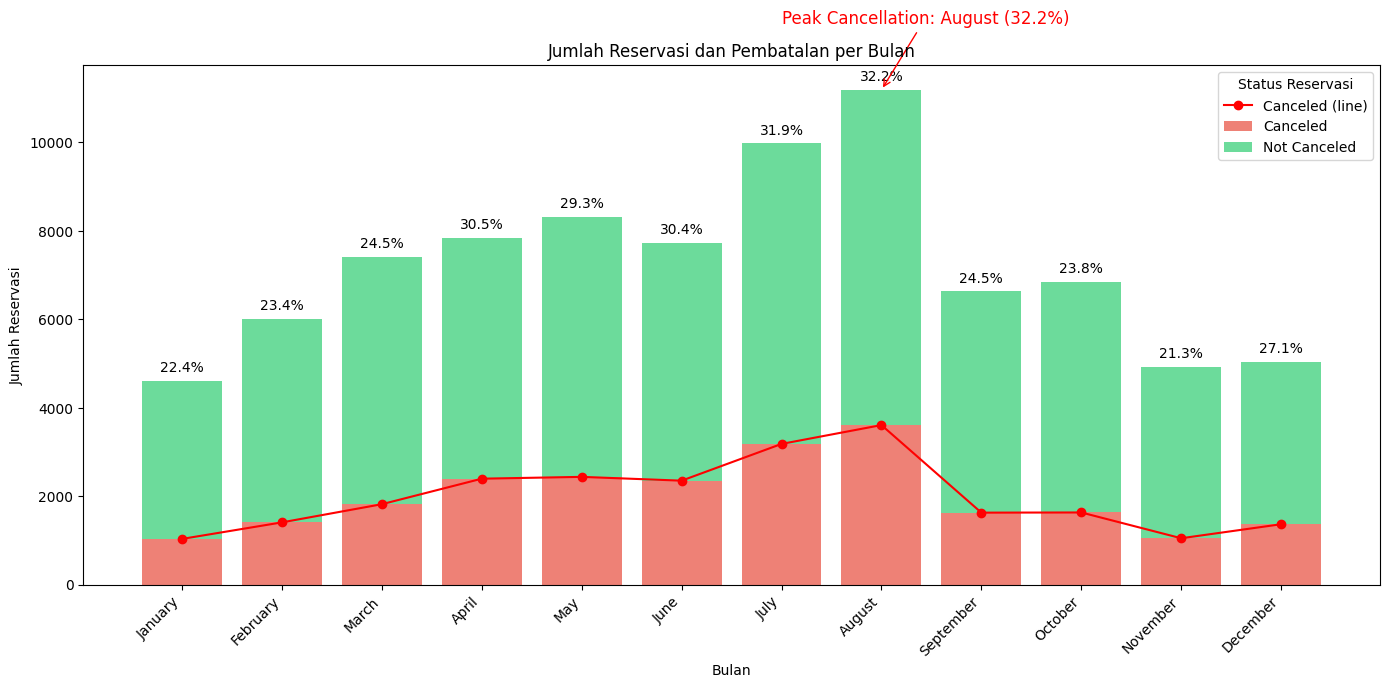

In [174]:
plt.figure(figsize=(14, 7))

# Urutan bulan
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Menghitung jumlah reservasi dan pembatalan per bulan
canceled = df[df['is_canceled'] == 1]['arrival_date_month'].value_counts().reindex(month_order).fillna(0)
not_canceled = df[df['is_canceled'] == 0]['arrival_date_month'].value_counts().reindex(month_order).fillna(0)
total_reservations = canceled + not_canceled
cancel_rate = (canceled / total_reservations * 100).fillna(0)  # Persentase pembatalan

# Membuat stacked bar plot dengan canceled di bawah
plt.bar(month_order, canceled, color='#e74c3c', label='Canceled', alpha=0.7)
plt.bar(month_order, not_canceled, bottom=canceled, color='#2ecc71', label='Not Canceled', alpha=0.7)

# Line plot hanya untuk pembatalan
plt.plot(month_order, canceled.values, color='red', marker='o', linestyle='-', label='Canceled (line)')

# Menambahkan persentase pembatalan di atas batang
for i, month in enumerate(month_order):
    total = total_reservations[i]
    if total > 0:
        plt.text(i, total + 200, f"{cancel_rate[i]:.1f}%", ha='center', fontsize=10, color='black')

# Menandai bulan dengan tingkat pembatalan tertinggi
peak_cancel_month = cancel_rate.idxmax()
peak_cancel_value = cancel_rate.max()
plt.annotate(f"Peak Cancellation: {peak_cancel_month} ({peak_cancel_value:.1f}%)", 
             xy=(month_order.index(peak_cancel_month), total_reservations[peak_cancel_month]), 
             xytext=(month_order.index(peak_cancel_month)-1, total_reservations[peak_cancel_month] + 1500),
             arrowprops=dict(arrowstyle='->', color='red'), fontsize=12, color='red')

# Labeling
plt.xlabel('Bulan')
plt.ylabel('Jumlah Reservasi')
plt.title('Jumlah Reservasi dan Pembatalan per Bulan')
plt.legend(title='Status Reservasi', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


**Insight:**
1. bulan Puncak:
    - Juli dan Agustus adalah bulan dengan tingkat pembatalan tertinggi.
    - Strategi: Hotel dapat menerapkan manajemen overbooking yang lebih agresif, yaitu menerima lebih banyak reservasi dari kapasitas sebenarnya untuk mengantisipasi pembatalan.
    - Karena risiko pembatalan tinggi, hotel bisa menerapkan kebijakan non-refundable deposit atau pembatalan dikenakan biaya lebih tinggi untuk mengurangi jumlah pembatalan.

2. bulan terendah
    - Desember, januari adalah musim dengan tingkat pembatalan terendah.
    - Hotel harus lebih berhati-hati dalam menerapkan overbooking, karena kemungkinan besar tamu yang melakukan reservasi benar-benar akan datang.
    - Karena tingkat pembatalan lebih rendah, hotel dapat menawarkan pembatalan gratis hingga beberapa hari sebelum kedatangan untuk meningkatkan daya tarik reservasi.

#### **4.2.2 Perilaku Tamu Berdasarkan Segmentasi**

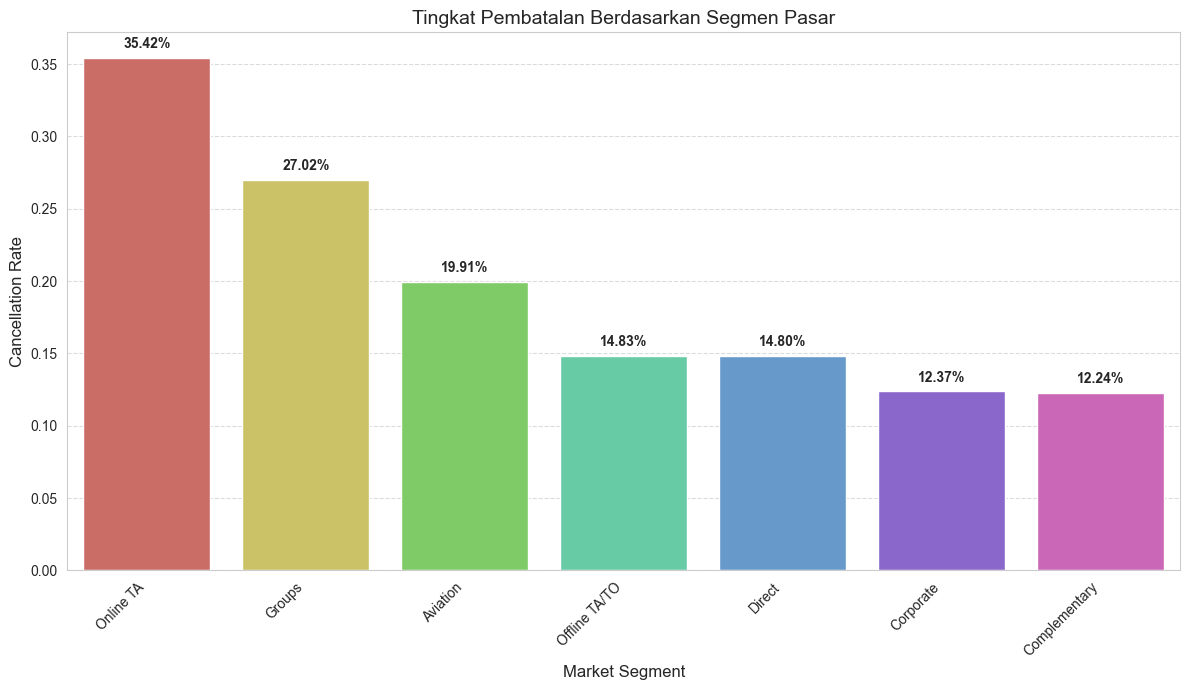

In [175]:
# Menghitung tingkat pembatalan per segmentasi pasar
segment_cancellation = df.groupby("market_segment")["is_canceled"].mean().reset_index()

# Mengurutkan data dari tingkat pembatalan tertinggi ke terendah
segment_cancellation = segment_cancellation.sort_values(by="is_canceled", ascending=False)

# Visualisasi
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
ax = sns.barplot(x="market_segment", y="is_canceled", data=segment_cancellation, palette="hls")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title("Tingkat Pembatalan Berdasarkan Segmen Pasar", fontsize=14)
plt.ylabel("Cancellation Rate", fontsize=12)
plt.xlabel("Market Segment", fontsize=12)

# Tambahkan angka pada bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, weight='bold')

# Tambahkan grid horizontal untuk kemudahan pembacaan
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Insight:**
- Hotel perlu menerapkan kebijakan deposit atau jaminan yang lebih ketat untuk pemesanan melalui Online TA dan Groups
- Strategi overbooking dapat difokuskan pada segmen dengan tingkat pembatalan tinggi (Online TA dan Groups)
- Program loyalitas dan insentif dapat dikembangkan untuk mendorong pemesanan langsung (Direct) yang memiliki tingkat pembatalan lebih rendah
- Kebijakan pembatalan yang berbeda dapat diterapkan untuk segmen pasar yang berbeda berdasarkan pola pembatalan ini


#### **4.2.3 Agen dan Perusahaan dengan Tingkat Pembatalan Tertinggi**




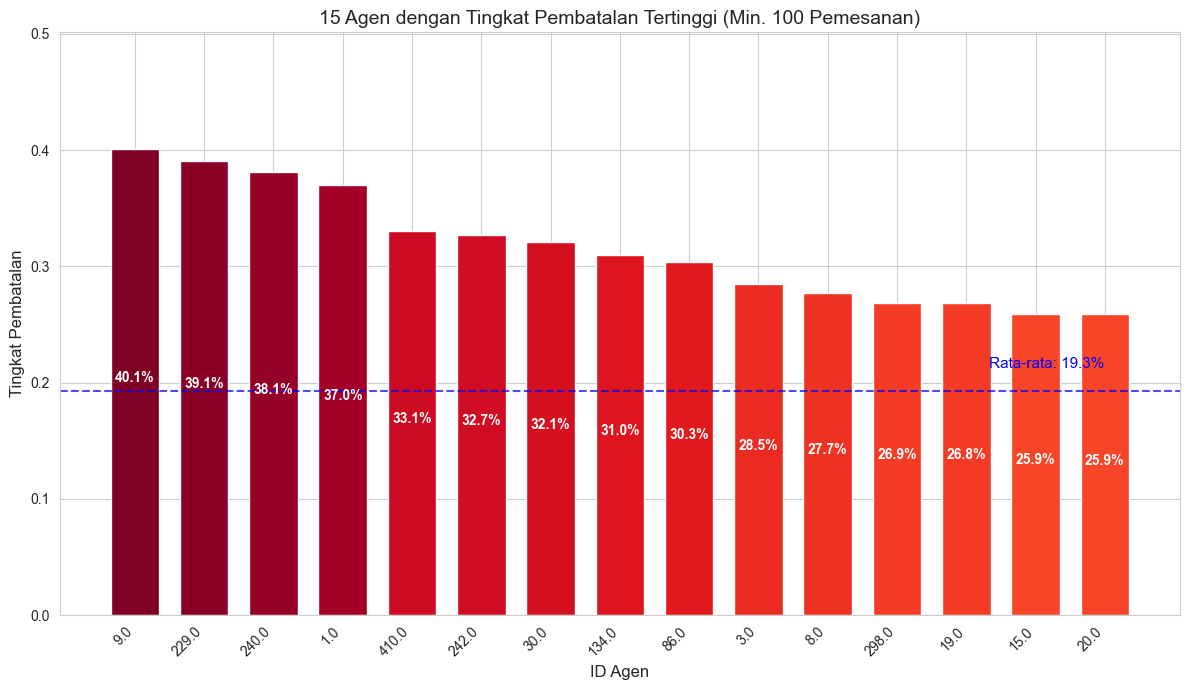

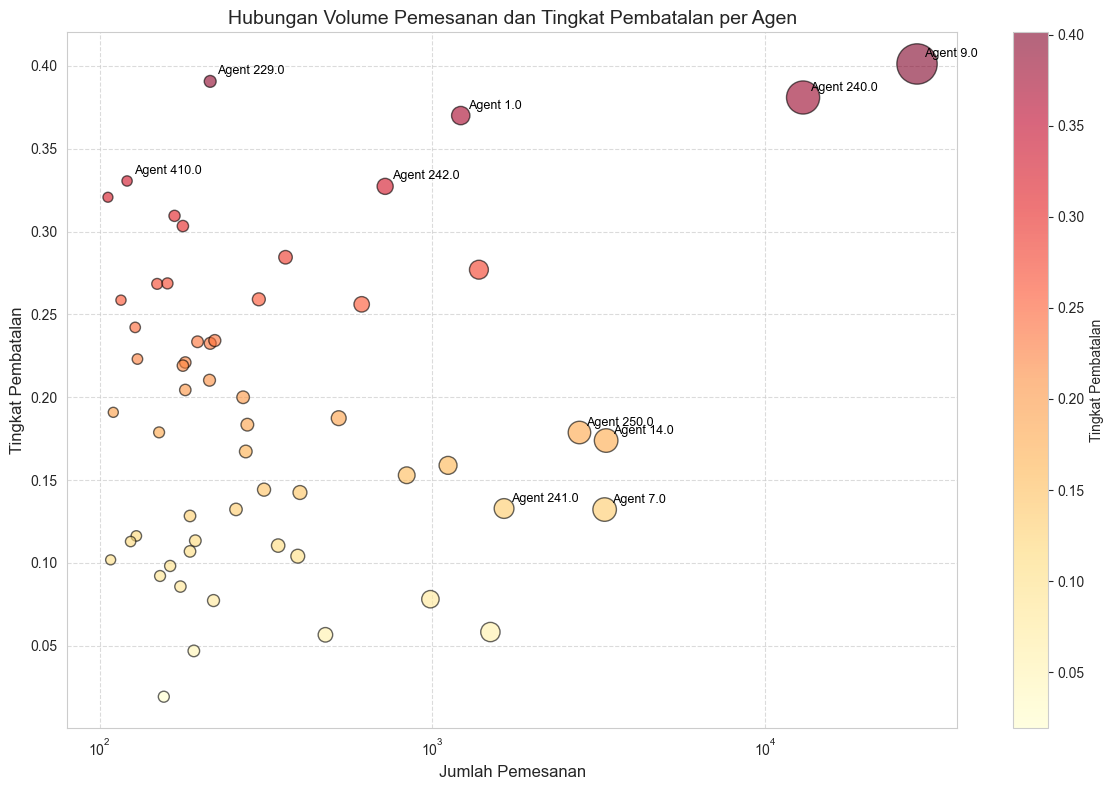

In [176]:
# Menghitung tingkat pembatalan dan jumlah booking per agen
agent_stats = df[df["agent"] != 0].groupby("agent").agg(
    cancellation_rate=("is_canceled", "mean"),
    booking_count=("is_canceled", "count")
).reset_index()

# Filter agen dengan minimal jumlah booking (misal 100) untuk menghindari outlier
min_bookings = 100
filtered_agents = agent_stats[agent_stats['booking_count'] >= min_bookings]

# Urutkan berdasarkan tingkat pembatalan
top_agents = filtered_agents.sort_values(by="cancellation_rate", ascending=False).head(15)

# Visualisasi Bar Chart
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Buat bar plot dengan warna berdasarkan tingkat pembatalan
colors = plt.cm.YlOrRd(top_agents['cancellation_rate'].values / top_agents['cancellation_rate'].max())
bars = plt.bar(
    x=range(len(top_agents)), 
    height=top_agents['cancellation_rate'], 
    width=0.7,
    color=colors
)

# Tambahkan label jumlah booking dan persentase pembatalan
for i, (_, row) in enumerate(top_agents.iterrows()):
    plt.text(i, row['cancellation_rate'] / 2, f"{row['cancellation_rate']:.1%}", 
             ha='center', fontsize=10, color='white', fontweight='bold')

# Tambahkan garis rata-rata tingkat pembatalan semua agen
avg_cancel_rate = filtered_agents['cancellation_rate'].mean()
plt.axhline(y=avg_cancel_rate, color='blue', linestyle='--', alpha=0.7)
plt.text(len(top_agents)-1, avg_cancel_rate + 0.02, f"Rata-rata: {avg_cancel_rate:.1%}", 
         color='blue', ha='right', fontsize=11)

plt.title("15 Agen dengan Tingkat Pembatalan Tertinggi (Min. 100 Pemesanan)", fontsize=14)
plt.ylabel("Tingkat Pembatalan", fontsize=12)
plt.xlabel("ID Agen", fontsize=12)
plt.xticks(range(len(top_agents)), top_agents['agent'], rotation=45, ha='right')
plt.ylim(0, top_agents['cancellation_rate'].max() + 0.1)

plt.tight_layout()
plt.show()

# Scatter Plot: Volume Pemesanan vs Tingkat Pembatalan
plt.figure(figsize=(12, 8))
plt.scatter(
    filtered_agents['booking_count'], 
    filtered_agents['cancellation_rate'],
    s=np.sqrt(filtered_agents['booking_count']) * 5,  # Ukuran titik lebih proporsional
    alpha=0.6,
    c=filtered_agents['cancellation_rate'],  # Warna berdasarkan tingkat pembatalan
    cmap='YlOrRd',
    edgecolors='black'
)

# Tambahkan label untuk agen dengan volume tinggi dan pembatalan tinggi
high_volume_threshold = filtered_agents['booking_count'].quantile(0.9)
high_cancel_threshold = filtered_agents['cancellation_rate'].quantile(0.9)

for _, row in filtered_agents[(filtered_agents['booking_count'] > high_volume_threshold) | 
                              (filtered_agents['cancellation_rate'] > high_cancel_threshold)].iterrows():
    plt.annotate(
        f"Agent {row['agent']}", 
        (row['booking_count'], row['cancellation_rate']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=9,
        color='black'
    )

plt.title("Hubungan Volume Pemesanan dan Tingkat Pembatalan per Agen", fontsize=14)
plt.xlabel("Jumlah Pemesanan", fontsize=12)
plt.ylabel("Tingkat Pembatalan", fontsize=12)
plt.xscale("log")  # Gunakan skala log untuk distribusi lebih merata
plt.grid(True, linestyle='--', alpha=0.7)
plt.colorbar(label="Tingkat Pembatalan")

plt.tight_layout()
plt.show()

**Insight:**
- Agen dengan tingkat pembatalan tertinggi cenderung memiliki pemesanan dalam jumlah besar, menunjukkan bahwa mereka berkontribusi besar terhadap tingkat pembatalan secara keseluruhan.
- Jika agen ini bekerja sama dengan perusahaan tertentu, maka perusahaan tersebut mungkin memiliki kebijakan pembatalan yang lebih fleksibel, yang memudahkan pelanggan untuk membatalkan pesanan.
- Monitor dan batasi overbooking: Agen dengan tingkat pembatalan tinggi harus diawasi lebih ketat untuk memastikan mereka tidak secara sengaja melakukan overbooking demi keuntungan jangka pendek.

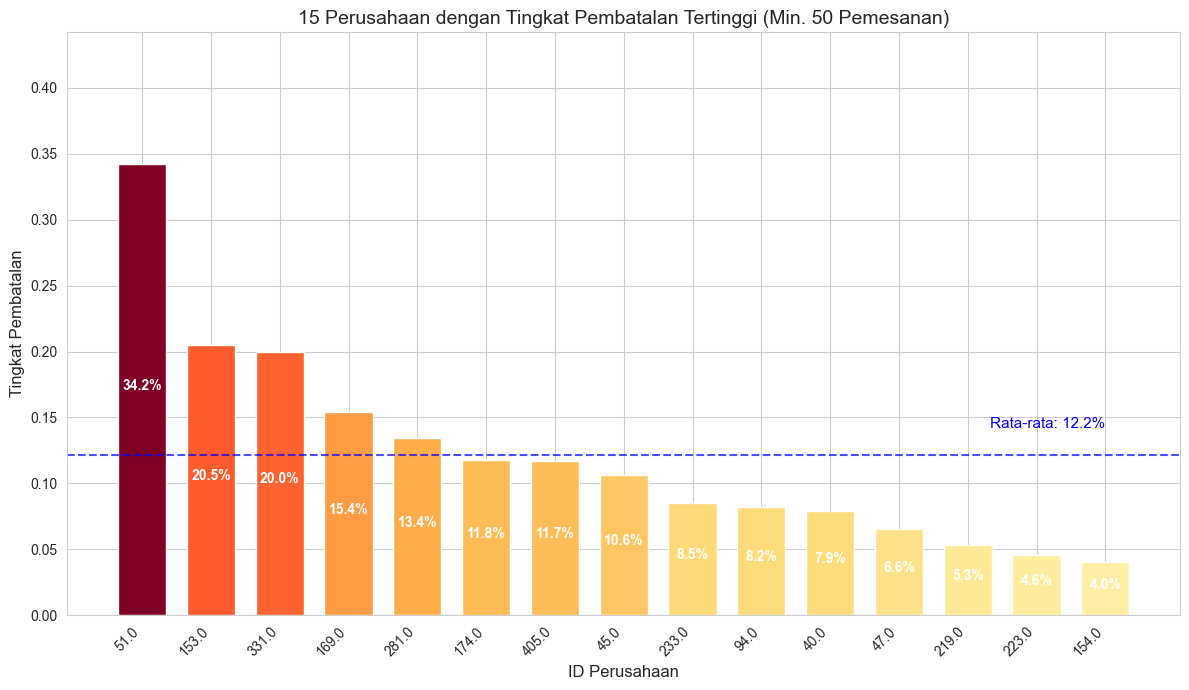

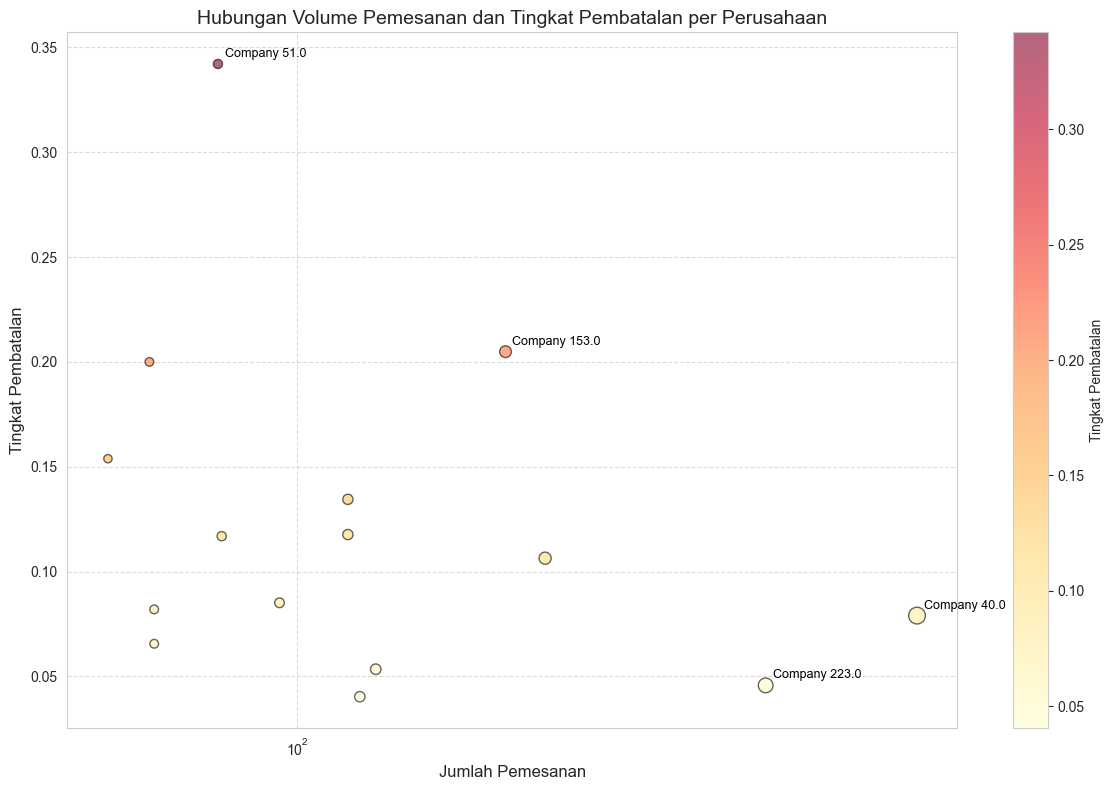

In [177]:
# Menghitung tingkat pembatalan dan jumlah booking per perusahaan, eksklusif untuk company ≠ 0
company_stats = df[df["company"] != 0].groupby("company").agg(
    cancellation_rate=("is_canceled", "mean"),
    booking_count=("is_canceled", "count")
).reset_index()

# Filter perusahaan dengan minimal jumlah booking (misal 50) untuk menghindari outlier
min_bookings = 50
filtered_companies = company_stats[company_stats['booking_count'] >= min_bookings]

# Urutkan berdasarkan tingkat pembatalan
top_companies = filtered_companies.sort_values(by="cancellation_rate", ascending=False).head(15)

# Visualisasi Bar Chart
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Buat bar plot dengan warna berdasarkan tingkat pembatalan
colors = plt.cm.YlOrRd(top_companies['cancellation_rate'].values / top_companies['cancellation_rate'].max())
bars = plt.bar(
    x=range(len(top_companies)), 
    height=top_companies['cancellation_rate'], 
    width=0.7,
    color=colors
)

# Tambahkan label jumlah booking dan persentase pembatalan
for i, (_, row) in enumerate(top_companies.iterrows()):
    plt.text(i, row['cancellation_rate'] / 2, f"{row['cancellation_rate']:.1%}", 
             ha='center', fontsize=10, color='white', fontweight='bold')

# Tambahkan garis rata-rata tingkat pembatalan semua perusahaan
avg_cancel_rate = filtered_companies['cancellation_rate'].mean()
plt.axhline(y=avg_cancel_rate, color='blue', linestyle='--', alpha=0.7)
plt.text(len(top_companies)-1, avg_cancel_rate + 0.02, f"Rata-rata: {avg_cancel_rate:.1%}", 
         color='blue', ha='right', fontsize=11)

plt.title("15 Perusahaan dengan Tingkat Pembatalan Tertinggi (Min. 50 Pemesanan)", fontsize=14)
plt.ylabel("Tingkat Pembatalan", fontsize=12)
plt.xlabel("ID Perusahaan", fontsize=12)
plt.xticks(range(len(top_companies)), top_companies['company'], rotation=45, ha='right')
plt.ylim(0, top_companies['cancellation_rate'].max() + 0.1)

plt.tight_layout()
plt.show()

# Scatter Plot: Volume Pemesanan vs Tingkat Pembatalan
plt.figure(figsize=(12, 8))
plt.scatter(
    filtered_companies['booking_count'], 
    filtered_companies['cancellation_rate'],
    s=np.sqrt(filtered_companies['booking_count']) * 5,  # Ukuran titik lebih proporsional
    alpha=0.6,
    c=filtered_companies['cancellation_rate'],  # Warna berdasarkan tingkat pembatalan
    cmap='YlOrRd',
    edgecolors='black'
)

# Tambahkan label untuk perusahaan dengan volume tinggi dan pembatalan tinggi
high_volume_threshold = filtered_companies['booking_count'].quantile(0.9)
high_cancel_threshold = filtered_companies['cancellation_rate'].quantile(0.9)

for _, row in filtered_companies[(filtered_companies['booking_count'] > high_volume_threshold) | 
                                 (filtered_companies['cancellation_rate'] > high_cancel_threshold)].iterrows():
    plt.annotate(
        f"Company {row['company']}", 
        (row['booking_count'], row['cancellation_rate']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=9,
        color='black'
    )

plt.title("Hubungan Volume Pemesanan dan Tingkat Pembatalan per Perusahaan", fontsize=14)
plt.xlabel("Jumlah Pemesanan", fontsize=12)
plt.ylabel("Tingkat Pembatalan", fontsize=12)
plt.xscale("log")  # Gunakan skala log untuk distribusi lebih merata
plt.grid(True, linestyle='--', alpha=0.7)
plt.colorbar(label="Tingkat Pembatalan")

plt.tight_layout()
plt.show()


- Dari bar chart, terlihat bahwa Perusahaan 76 memiliki tingkat pembatalan tertinggi (34.4%), diikuti oleh Perusahaan 153 (20.5%)
- Berbeda dari agent, perusahaan dengan tingkat pembatalan tinggi cenderung memiliki jumlah pemesanan yang lebih sedikit dibandingkan perusahaan besar seperti Perusahaan 40 yang memiliki jumlah pemesanan cukup banyak tetapi tingkat pembatalannya relatif lebih rendah.
- Scatter plot menunjukkan bahwa tidak ada korelasi yang jelas antara jumlah pemesanan dan tingkat pembatalan—artinya, baik perusahaan dengan pemesanan besar maupun kecil bisa memiliki tingkat pembatalan yang tinggi

#### **4.2.4 Negara Asal Tamu dengan Tingkat Pembatalan Tertinggi**

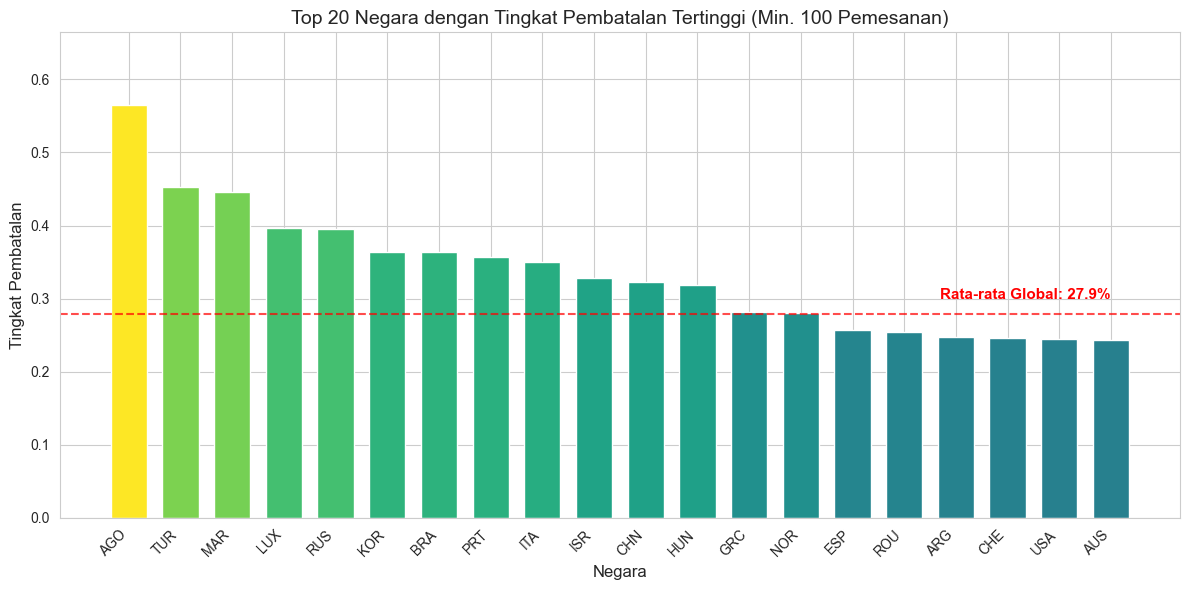

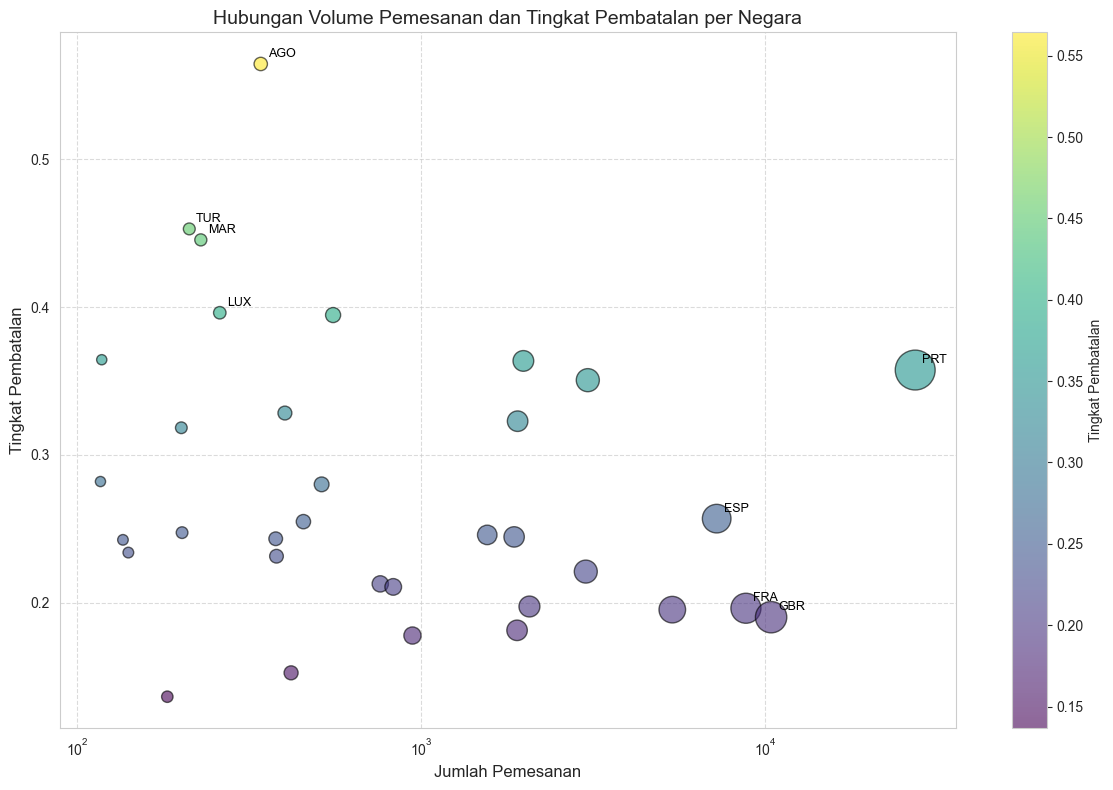

In [178]:
# Menghitung tingkat pembatalan dan jumlah booking per negara
country_stats = df.groupby("country").agg(
    cancellation_rate=("is_canceled", "mean"),
    booking_count=("is_canceled", "count")
).reset_index()

# Filter negara dengan jumlah booking minimal (misal 100) untuk menghindari outlier
min_bookings = 100
filtered_countries = country_stats[country_stats['booking_count'] >= min_bookings]

# Urutkan berdasarkan tingkat pembatalan
top_countries = filtered_countries.sort_values(by="cancellation_rate", ascending=False).head(20)

# Visualisasi Bar Chart
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Buat bar plot dengan warna berdasarkan tingkat pembatalan
colors = plt.cm.viridis(top_countries['cancellation_rate'].values / top_countries['cancellation_rate'].max())
bars = plt.bar(
    x=range(len(top_countries)), 
    height=top_countries['cancellation_rate'], 
    width=0.7,
    color=colors
)

# Tambahkan garis rata-rata tingkat pembatalan global
avg_cancel_rate = filtered_countries['cancellation_rate'].mean()
plt.axhline(y=avg_cancel_rate, color='red', linestyle='--', alpha=0.7)
plt.text(len(top_countries)-1, avg_cancel_rate + 0.02, f"Rata-rata Global: {avg_cancel_rate:.1%}", 
         color='red', ha='right', fontsize=11, fontweight='bold')

plt.title("Top 20 Negara dengan Tingkat Pembatalan Tertinggi (Min. 100 Pemesanan)", fontsize=14)
plt.ylabel("Tingkat Pembatalan", fontsize=12)
plt.xlabel("Negara", fontsize=12)
plt.xticks(range(len(top_countries)), top_countries['country'], rotation=45, ha='right')
plt.ylim(0, top_countries['cancellation_rate'].max() + 0.1)

plt.tight_layout()
plt.show()

# Scatter Plot: Volume Pemesanan vs Tingkat Pembatalan
plt.figure(figsize=(12, 8))
plt.scatter(
    filtered_countries['booking_count'], 
    filtered_countries['cancellation_rate'],
    s=np.sqrt(filtered_countries['booking_count']) * 5,  # Ukuran titik lebih proporsional
    alpha=0.6,
    c=filtered_countries['cancellation_rate'],  # Warna berdasarkan tingkat pembatalan
    cmap='viridis',
    edgecolors='black'
)

# Tambahkan label untuk negara dengan volume tinggi dan pembatalan tinggi
high_volume_threshold = filtered_countries['booking_count'].quantile(0.9)
high_cancel_threshold = filtered_countries['cancellation_rate'].quantile(0.9)

for _, row in filtered_countries[(filtered_countries['booking_count'] > high_volume_threshold) | 
                                 (filtered_countries['cancellation_rate'] > high_cancel_threshold)].iterrows():
    plt.annotate(
        f"{row['country']}", 
        (row['booking_count'], row['cancellation_rate']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=9,
        color='black'
    )

plt.title("Hubungan Volume Pemesanan dan Tingkat Pembatalan per Negara", fontsize=14)
plt.xlabel("Jumlah Pemesanan", fontsize=12)
plt.ylabel("Tingkat Pembatalan", fontsize=12)
plt.xscale("log")  # Gunakan skala log untuk distribusi lebih merata
plt.grid(True, linestyle='--', alpha=0.7)
plt.colorbar(label="Tingkat Pembatalan")

plt.tight_layout()
plt.show()

**Insight :**
- Angola (AGO) memiliki tingkat pembatalan tertinggi, mencapai sekitar 0.56 (56%), jauh di atas rata-rata global sebesar 27.9%. Turki (TUR) dan Maroko (MAR) berada di posisi kedua dan ketiga dengan tingkat pembatalan sekitar 0.45 (45%).
- Terlihat korelasi negatif antara jumlah pemesanan dan tingkat pembatalan negara - negara dengan volume pemesanan tinggi cenderung memiliki tingkat pembatalan yang lebih rendah.
- Angola (AGO) memiliki volume pemesanan relatif rendah (sekitar 400 pemesanan) namun tingkat pembatalan sangat tinggi (sekitar 56%). Portugal (PRT) memiliki volume pemesanan yang sangat tinggi (terlihat dari ukuran lingkaran yang besar, sekitar 20.000 pemesanan) dengan tingkat pembatalan sekitar 36%.
- Fokus strategi pengurangan pembatalan sebaiknya diarahkan pada negara-negara dengan tingkat pembatalan tinggi seperti Angola, Turki, dan Maroko.

## **5. Data Preparation**

**Optimalisasi Fitur**

Dalam proses ini, akan dilakukan **reduksi dan transformasi fitur** untuk mengurangi kompleksitas dataset **tanpa kehilangan informasi penting**.

- **Fitur yang Sebaiknya Dihapus (`Drop Features`)**

| **Fitur**                      | **Alasan Dihapus** |
|---------------------------------|--------------------------------------------------|
| `arrival_date_year`,`arrival_date_month`             | Tidak terlalu relevan untuk prediksi pembatalan kecuali dalam analisis tren jangka panjang. |
| `arrival_date_week_number`      | Redundan dengan `arrival_date_month`. |
| `arrival_date_day_of_month`     | Tidak terlalu berpengaruh terhadap kemungkinan pembatalan. |
| `agent`, `company`              | Kode ID agen/perusahaan tidak memiliki nilai prediktif langsung. |
| `reservation_status`      | Sudah langsung menunjukkan apakah pemesanan dibatalkan atau tidak - **Potensi Data Leakage** |
| `reservation_status_date`       | Korelasi dengan `is_canceled` sangat rendah (**0.0346**), sehingga tidak memberikan informasi signifikan dalam model. |
| `assigned_room_type`   | Informasi ini hanya tersedia setelah tamu check in, sedangkan prediksi pembatalan perlu dilakukan sebelum tamu tiba. |

---

- **Fitur yang Akan Digabung (`Feature Combination`)**

| **Fitur yang Digabung**                    | **Fitur Baru**           | **Alasan Digabung** |
|---------------------------------------------|--------------------------|--------------------------------------------------|
| `stays_in_weekend_nights` + `stays_in_week_nights` | `total_stay_nights`  | Menggabungkan jumlah malam weekday & weekend menjadi satu fitur yang lebih representatif. |
| `adults` + `children` + `babies`           | `total_guests`           | Jumlah total tamu lebih relevan dibandingkan melihat kategori usia secara terpisah. |

In [179]:
# Load data hasil cleaning
file_path = "cleaned_data.csv"  # Sesuaikan dengan path file hasil cleaning
df = pd.read_csv(file_path)

In [180]:
# 1. Hapus fitur yang tidak diperlukan
drop_columns = [
    'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'arrival_date_month',
    'agent', 'company', 'reservation_status', 'reservation_status_date', 'assigned_room_type'
]

df.drop(columns=drop_columns, inplace=True)

# 2. Feature Combined

# Gabungkan jumlah malam weekday dan weekend menjadi total malam menginap
df['total_stay_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Gabungkan jumlah tamu dewasa, anak-anak, dan bayi menjadi total tamu
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# Drop fitur lama sebelum di combined
df.drop(columns=['stays_in_weekend_nights', 'stays_in_week_nights',
                 'adults', 'children', 'babies'], inplace=True)

In [181]:
df.head()

,hotel,is_canceled,lead_time,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay_nights,total_guests
0,Resort Hotel,0,342,BB,PRT,Direct,Direct,0,0,0,C,3,No Deposit,0,Transient,0.0,0,0,0,2.0
1,Resort Hotel,0,737,BB,PRT,Direct,Direct,0,0,0,C,4,No Deposit,0,Transient,0.0,0,0,0,2.0
2,Resort Hotel,0,7,BB,GBR,Direct,Direct,0,0,0,A,0,No Deposit,0,Transient,75.0,0,0,1,1.0
3,Resort Hotel,0,13,BB,GBR,Corporate,Corporate,0,0,0,A,0,No Deposit,0,Transient,75.0,0,0,1,1.0
4,Resort Hotel,0,14,BB,GBR,Online TA,TA/TO,0,0,0,A,0,No Deposit,0,Transient,98.0,0,1,2,2.0


**Data Generation**

**Tujuan:**  
- **Membangun Model yang Dapat Digeneralisasi:** Membantu model belajar dari data yang ada dan menerapkan pengetahuan tersebut pada data baru yang belum pernah dilihat sebelumnya.  
- **Memastikan Evaluasi yang Akurat:** Menyediakan cukup data untuk menguji performa model secara objektif menggunakan data yang belum pernah dilihat.  
- **Meningkatkan Performa Model:** Dengan teknik augmentasi data atau pembuatan data sintetis, model dapat dilatih dengan lebih baik, bahkan saat data terbatas.

**Seen Data** adalah data yang digunakan saat pelatihan untuk mengenali pola. Biasanya mencakup **80-90%** dari dataset.  

**Unseen Data** adalah data yang tidak pernah dilihat model saat pelatihan, digunakan untuk menguji performa. Biasanya **10-20%** dari dataset.

In [182]:
# Define feature and target
feature_seen = df.drop('is_canceled', axis=1)
target_seen = df['is_canceled']

In [183]:
# Split data into Seen (80%) and Unseen (20%)
df_seen, df_unseen = train_test_split(df, test_size=0.2, random_state=42, stratify= target_seen)

In [184]:
# Check the shape of each dataset
print("Shape of seen dataset:", df_seen.shape)
print("Shape of unseen dataset:", df_unseen.shape)

Shape of seen dataset: (69234, 20)
Shape of unseen dataset: (17309, 20)


### **5.1 Initialization**

In [185]:
# define feature and target

feature = df_seen.drop('is_canceled', axis=1)
target = df_seen['is_canceled']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2,
                                                    random_state=42, stratify=target)
print(X_train.shape)
print(y_train.shape)

(55387, 19)
(55387,)


- **Check Skewness**

In [187]:
numerical_columns = df_seen.select_dtypes(include=["int64", "float64"]).columns

normality_test_results = {}

num_cols = len(numerical_columns)

rows = (num_cols + 2) // 3

for i, col in enumerate(numerical_columns):

    # Perform the Shapiro-Wilk Test for normality
    shapiro_test = shapiro(df_seen[col])  # Use shapiro directly

    # Calculate the skewness
    skewness = df[col].skew()

    # Determine the skew direction
    if skewness > 0:
        skew_direction = "Positive"
    elif skewness < 0:
        skew_direction = "Negative"
    else:
        skew_direction = "None"

    # Storing the results
    normality_test_results[col] = {
        "Shapiro-Wilk Statistic": shapiro_test.statistic,
        "Shapiro-Wilk p-value": shapiro_test.pvalue,
        "Skewness": skewness,
        "Skew Direction": skew_direction
    }

# Convert the dictionary to a DataFrame
normality_results_df = pd.DataFrame(normality_test_results).T

# Adding a column to indicate if the data is normally distributed based on p-values
normality_results_df["Normally Distributed"] = (normality_results_df["Shapiro-Wilk p-value"] > 0.05)

normality_results_df

,Shapiro-Wilk Statistic,Shapiro-Wilk p-value,Skewness,Skew Direction,Normally Distributed
is_canceled,0.559174,0.0,1.002208,Positive,False
lead_time,0.842646,0.0,1.427353,Positive,False
is_repeated_guest,0.190694,0.0,4.776332,Positive,False
previous_cancellations,0.05604,0.0,34.343396,Positive,False
previous_bookings_not_canceled,0.076871,0.0,20.857896,Positive,False
booking_changes,0.427926,0.0,5.077123,Positive,False
days_in_waiting_list,0.050095,0.0,17.063126,Positive,False
adr,0.958917,0.0,0.877262,Positive,False
required_car_parking_spaces,0.304019,0.0,3.510573,Positive,False
total_of_special_requests,0.771151,0.0,1.07965,Positive,False


**Untuk Data Numerik**

Berdasarkan analisis skewness, kita akan menerapkan **scaling** untuk setiap fitur numerik agar data lebih terstruktur dan siap digunakan dalam model Machine Learning.  

**1. Fitur yang Menggunakan RobustScaler**  

**Alasan:** Digunakan untuk fitur dengan **outlier ekstrem** atau **skewness tinggi** ( >1).  

- **`previous_cancellations`** (**34.34**)  
- **`previous_bookings_not_canceled`** (**20.86**)  
- **`booking_changes`** (**5.08**)  
- **`days_in_waiting_list`** (**17.06**)  
- **`required_car_parking_spaces`** (**3.51**)  
- **`total_guests`** (**10.61**)  
- **`is_repeated_guest`** (**4.78**)
- **`total_of_special_requests`** (**1.08**)  
- **`total_stay_nights`** (**2.74**)
- **`lead_time`** (**1.42**)  

**2. Fitur yang Menggunakan MinMaxScaler**  

**Alasan:** Digunakan untuk fitur yang memiliki **skewness lebih rendah** atau tidak memiliki **outlier ekstrem**, agar nilai berada dalam rentang **[0,1]**.  
- **`adr`** (**0.87**)  

**Untuk Data Kategorikal**

**Encoding (Mengubah Data Kategorikal ke Numerik)** → untuk mengonversi fitur kategorikal menjadi format numerik yang dapat diproses oleh model.

- **1. One-Hot Encoding** (untuk fitur dengan sedikit kategori unik)  
Fitur dengan kategori terbatas akan diubah menjadi **dummy variables** untuk menghindari asumsi urutan.  
  - `hotel` → (2 kategori: *City Hotel, Resort Hotel*)  
  - `meal` → (5 kategori)  
  - `distribution_channel` → (5 kategori)  
  - `deposit_type` → (3 kategori)  
  - `customer_type` → (4 kategori: *Transient < Transient-Party < Contract < Group*)

- **2. Binary Encoding** (untuk fitur dengan banyak kategori unik)  
Fitur ini memiliki **terlalu banyak kategori**, sehingga **One-Hot Encoding akan menyebabkan dimensionalitas tinggi**.  
  - `country` → (177 kategori)
  - `reserved_room_type` → (10 kategori)
  - `market_segment` → (8 kategori)

### **5.2 Data Transformation (Feature Engineering)**

In [188]:
# Membuat objek transformer untuk preprocessing
transformer = ColumnTransformer(
    transformers=[
        # Robust Scaling untuk fitur dengan outlier ekstrem & skewness >1
        ('scaling_robust', RobustScaler(), ['previous_cancellations', 'previous_bookings_not_canceled',
                                            'booking_changes', 'days_in_waiting_list','required_car_parking_spaces',
                                            'total_guests', 'is_repeated_guest', 'total_of_special_requests',
                                            'total_stay_nights', 'lead_time']),

        # MinMax Scaling untuk fitur dengan skewness lebih stabil (<1)
        ('scaling_minmax', MinMaxScaler(), ['adr']),

        # One-Hot Encoding untuk fitur kategorikal nominal
        ('encoding_ohe', OneHotEncoder(drop='first', handle_unknown='ignore'),
         ['hotel', 'meal', 'distribution_channel', 'deposit_type', 'customer_type']),

        # Binary Encoding untuk fitur dengan banyak kategori unik
        ('binary', ce.BinaryEncoder(), ['reserved_room_type', 'country', 'market_segment'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

### **5.3 Overview**

In [189]:
# transformer
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaling_robust', RobustScaler(),
                                 ['previous_cancellations',
                                  'previous_bookings_not_canceled',
                                  'booking_changes', 'days_in_waiting_list',
                                  'required_car_parking_spaces', 'total_guests',
                                  'is_repeated_guest',
                                  'total_of_special_requests',
                                  'total_stay_nights', 'lead_time']),
                                ('scaling_minmax', MinMaxScaler(), ['adr']),
                                ('encoding_ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['hotel', 'meal', 'distribution_channel',
                                  'deposit_type', 'customer_type']),
                                ('binary', BinaryEncoder(),
                                 ['reserved_room_type', 'country',
                                  'market_segment'])],
                  verbose_feature_names_out=False)

In [190]:
X_train_pre = transformer.transform(X_train)
X_test_pre = transformer.transform(X_test)

# DataFrame
X_train_pre = pd.DataFrame(X_train_pre, columns=transformer.get_feature_names_out())
X_test_pre = pd.DataFrame(X_test_pre, columns=transformer.get_feature_names_out())

In [191]:
X_train_pre

,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_guests,is_repeated_guest,total_of_special_requests,total_stay_nights,lead_time,adr,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reserved_room_type_0,reserved_room_type_1,reserved_room_type_2,reserved_room_type_3,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7,market_segment_0,market_segment_1,market_segment_2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.345133,0.295276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.000000,0.318584,0.319488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.566372,0.255118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.761062,0.194882,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,-0.247788,0.185039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55382,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.333333,-0.424779,0.458661,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
55383,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.666667,-0.433628,0.188976,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
55384,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.017699,0.255906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
55385,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.433628,0.289370,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0


## **6. Model Development**

### **6.1 Initialization**

- Membuat Workflow

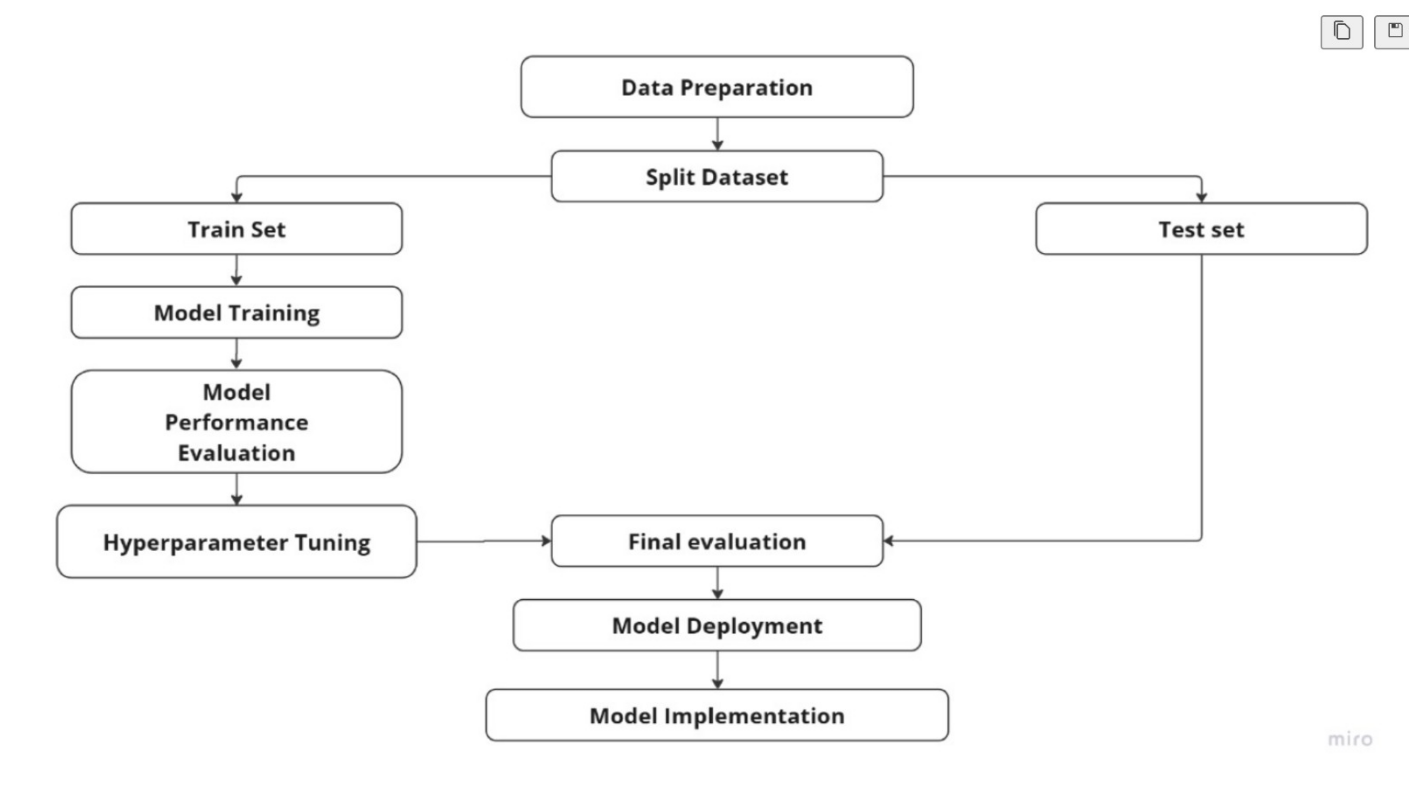

In [192]:
# Load and display an image
import matplotlib.image as mpimg

plt.figure(figsize=(20, 10))
img = mpimg.imread('flowchart.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

### **6.2 Developing The Model Pipeline**

In [193]:
# Create base pipeline

base_clf = Pipeline(steps=[
    ('FeatureEngineering', transformer),
    ('Classifier', None)
])

base_bal_clf = Pipeline(steps=[
    ('FeatureEngineering', transformer),
    ('Resampling', None),
    ('Classifier', None)
])

Base pipeline diatas dibuat untuk memastikan preprocessing yang konsisten, memudahkan eksperimen model, dan menangani ketidakseimbangan data dengan resampling.

In [194]:
# Create List Model

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

list_model = [dt, rf, xgb, lgbm, gbc]

**Alasan Pemilihan List Model**  

| **Model**                           | **Keuntungan untuk Data Imbalanced** |
|--------------------------------------|--------------------------------------|
| **DecisionTreeClassifier (DT)**      | - Bisa menangani data imbalanced tanpa perlu normalisasi.  <br> - Tidak bias terhadap jumlah sampel yang tidak seimbang, tapi bisa overfitting jika tidak diatur. |
| **RandomForestClassifier (RF)**      | - Mengurangi overfitting Decision Tree dengan kombinasi banyak pohon.  <br> - Secara alami lebih tahan terhadap data imbalanced dengan pemilihan sampel acak. |
| **XGBClassifier (XGBoost)**          | - Mendukung **scale_pos_weight**, yang bisa disesuaikan untuk menangani data imbalanced.  <br> - Fokus pada misclassified samples sehingga bisa meningkatkan prediksi cancellation. |
| **LGBMClassifier (LightGBM)**        | - Lebih cepat dibanding XGBoost dan tetap mendukung handling **class imbalance**.  <br> - Bisa menangani dataset besar dengan banyak kategori unik, seperti "country" atau "market_segment". |
| **GradientBoostingClassifier (GBC)** | - Memanfaatkan boosting untuk meningkatkan akurasi pada kelas minoritas (cancellation).  <br> - Bisa disesuaikan dengan **hyperparameter tuning** untuk menangani ketidakseimbangan data. |

### **6.3 Model Benchmarking**

Model benchmarking ini dilakukan untuk membandingkan performa berbagai model pada data hotel booking yang tidak seimbang, dengan fokus pada **precision** sebagai metrik utama untuk mengurangi false positives dalam prediksi pembatalan.

In [195]:
benchmark = GridSearchCV(
    estimator=base_clf,
    param_grid={'Classifier': list_model},
    scoring={'precision': 'precision', 'recall': 'recall', 'f1': 'f1'},
    refit='precision',  # Refit model using the best F0.5-score
    cv=StratifiedKFold(shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1
)

In [196]:
# benchmark process
benchmark.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[LightGBM] [Info] Number of positive: 12229, number of negative: 32080
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 750
[LightGBM] [Info] Number of data points in the train set: 44309, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275994 -> initscore=-0.964423
[LightGBM] [Info] Start training from score -0.964423
[LightGBM] [Info] Number of positive: 12229, number of negative: 32080
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling_robust',
                                                                         RobustScaler(),
                                                                         ['previous_cancellations',
                                                                          'previous_bookings_not_canceled',
                                                                          'booking_changes',
                                                                          'days_in_waiting_list',
                                                                          'required_car_parking_spaces',
                                                                          'total_gue...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...),
                                        LGBMClassifier(random_state=42),
                                        GradientBoostingClassifier(random_state=42)]},
             refit='precision', return_train_score=True,
             scoring={'f1': 'f1', 'precision': 'precision', 'recall': 'recall'},
             verbose=1)

GradientBoostingClassifier (GBC) sebagai model dengan kinerja terbaik dalam proses benchmarking.

**Apa itu Gradient Boosting Classifier?**  

- GBC merupakan metode **ensemble learning**, yang menggabungkan beberapa model lemah (weak learners) untuk membentuk model yang lebih kuat.  
- Weak learners dalam GBC biasanya **decision tree**, di mana setiap pohon dilatih untuk memperbaiki kesalahan dari pohon sebelumnya.  
- Boosting bekerja dengan memberikan bobot lebih besar pada instance yang salah diklasifikasikan sebelumnya, sehingga model lebih fokus pada sampel yang sulit diklasifikasikan.  
- Model ini dilatih dengan meminimalkan fungsi loss (seperti log-loss atau deviance) untuk meningkatkan akurasi secara bertahap.

In [197]:
benchmark.best_score_

0.7323290442709054

Dalam konteks ini:<br>
- "No Cancellation" = Kelas Mayoritas (lebih banyak)
- "Cancellation" = Kelas Minoritas (lebih sedikit, perlu resampling)

Solusi : Gunakan oversampling (SMOTE, ADASYN, Random Oversampling)   


In [198]:
benchmark_resample = GridSearchCV(
    estimator=base_bal_clf,
    param_grid={'Resampling': [SMOTE(random_state=42),
                               ADASYN(random_state=42),
                               RandomOverSampler(random_state=42)],
                'Classifier': list_model},
    scoring={'precision': 'precision', 'recall': 'recall', 'f1': 'f1'},
    refit='precision',
    cv=StratifiedKFold(shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1,
    n_jobs=-1
)

**Alasam Pemilihan Resampler:**

Dalam prediksi **pembatalan hotel booking**, data biasanya **imbalanced** karena jumlah pemesanan yang **tidak dibatalkan** jauh lebih banyak dibandingkan yang **dibatalkan**. Jika tidak ditangani, model cenderung memprediksi mayoritas dan gagal mendeteksi pembatalan dengan baik.

1. **SMOTE (Synthetic Minority Over-sampling Technique)** dapat menghindari **duplikasi langsung** dari data asli, sehingga lebih **baik daripada Random Oversampling** dan menjaga distribusi minoritas tetap mirip dengan data asli**, tanpa hanya menduplikasi sampel.  

2. **ADASYN (Adaptive Synthetic Sampling)** dapat mengatasi masalah di mana model **cenderung salah memprediksi minoritas** dengan menambah sampel pada area yang sulit.  

3. **Random Oversampling** dapat **menduplikasi data minoritas secara acak**.  

In [199]:
benchmark_resample.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling_robust',
                                                                         RobustScaler(),
                                                                         ['previous_cancellations',
                                                                          'previous_bookings_not_canceled',
                                                                          'booking_changes',
                                                                          'days_in_waiting_list',
                                                                          'required_car_parking_spaces',
                                                                          'total_gue...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...),
                                        LGBMClassifier(random_state=42),
                                        GradientBoostingClassifier(random_state=42)],
                         'Resampling': [SMOTE(random_state=42),
                                        ADASYN(random_state=42),
                                        RandomOverSampler(random_state=42)]},
             refit='precision', return_train_score=True,
             scoring={'f1': 'f1', 'precision': 'precision', 'recall': 'recall'},
             verbose=1)

In [200]:
benchmark_resample.best_score_

0.6671989969790246

**Insight :** Best score precision setelah resampling lebih rendah (0.66) dari benchmarking (0.73)

Kemungkinan disebabkan oleh :
- **Resampling bisa menyebabkan informasi hilang** → Jika data minoritas terlalu sedikit, model mungkin kehilangan pola asli dari cancellation.  
- **Precision lebih tinggi sebelum resampling** → Model lebih akurat dalam mengidentifikasi cancellation tanpa terlalu banyak False Positives.  
- **Overfitting dapat terjadi setelah resampling** → Data yang diubah secara sintetis bisa membuat model belajar pola yang tidak sepenuhnya mencerminkan data asli.

In [201]:
# save model

import pickle

best_model_without_resample = benchmark.best_estimator_
best_model_with_resample = benchmark_resample.best_estimator_

pickle.dump(best_model_without_resample, open('GBC-withoutResample-v1-0732.sav', 'wb')) # wb = write binary
pickle.dump(best_model_with_resample, open('RFC_withResample-v1-0667.sav', 'wb'))

### **6.4 Tune Model**

***References :***

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

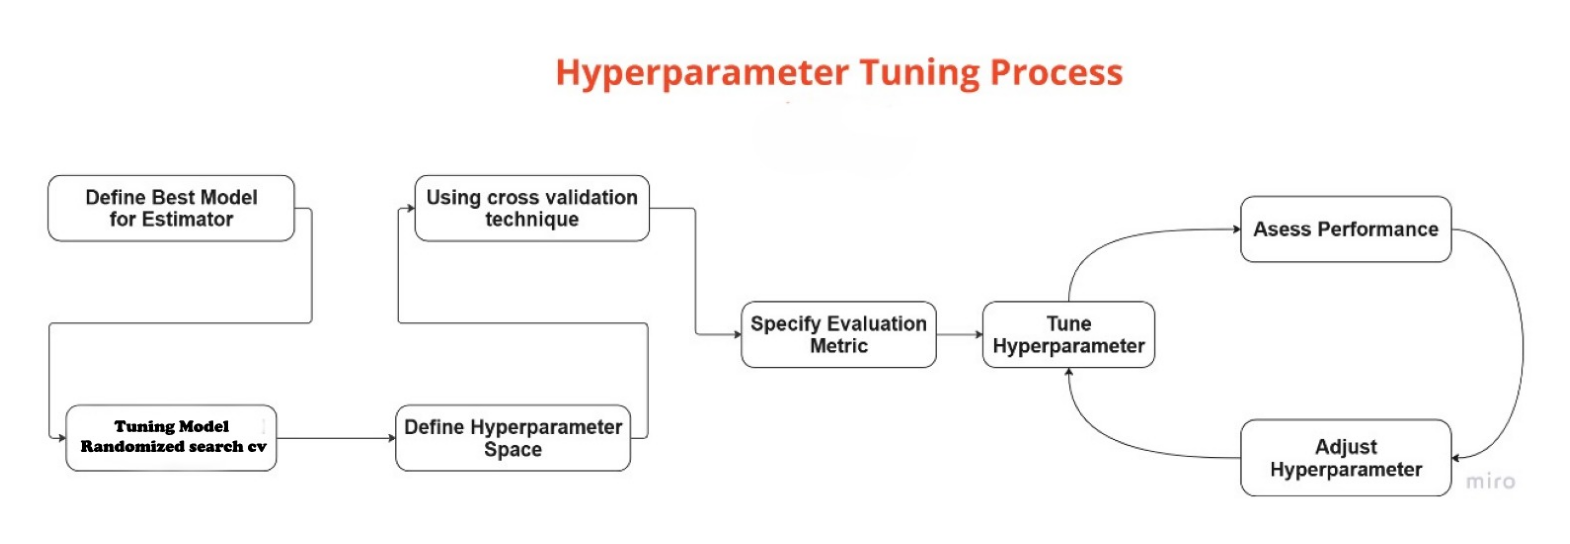

In [202]:
# Load and display an image - Hyperparameter Tuning Process
plt.figure(figsize=(20, 10))
img = mpimg.imread('output.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [203]:
# Display Model Without Resample
model_gbc = pickle.load(open('GBC-withoutResample-v1-0732.sav', 'rb')) # rb = read binary

In [204]:
model_gbc

Pipeline(steps=[('FeatureEngineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling_robust',
                                                  RobustScaler(),
                                                  ['previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_guests',
                                                   'is_repeated_guest',
                                                   'total_of_special_requests',
                                                   'total_stay_nights',
                                                   'lead_time...
                                                 ('scaling_minmax',
                                                  MinMaxScaler(), ['adr']),
                                                 ('encoding_ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['hotel', 'meal',
                                                   'distribution_channel',
                                                   'deposit_type',
                                                   'customer_type']),
                                                 ('binary', BinaryEncoder(),
                                                  ['reserved_room_type',
                                                   'country',
                                                   'market_segment'])],
                                   verbose_feature_names_out=False)),
                ('Classifier', GradientBoostingClassifier(random_state=42))])

In [205]:
# Display Model With Resample
model_rfc = pickle.load(open('RFC_withResample-v1-0667.sav', 'rb'))

In [206]:
model_rfc

Pipeline(steps=[('FeatureEngineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling_robust',
                                                  RobustScaler(),
                                                  ['previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_guests',
                                                   'is_repeated_guest',
                                                   'total_of_special_requests',
                                                   'total_stay_nights',
                                                   'lead_time...
                                                 ('encoding_ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['hotel', 'meal',
                                                   'distribution_channel',
                                                   'deposit_type',
                                                   'customer_type']),
                                                 ('binary', BinaryEncoder(),
                                                  ['reserved_room_type',
                                                   'country',
                                                   'market_segment'])],
                                   verbose_feature_names_out=False)),
                ('Resampling', RandomOverSampler(random_state=42)),
                ('Classifier', RandomForestClassifier(random_state=42))])

Karena data besar, **lebih baik menggunakan RandomizedSearchCV daripada GridSearchCV**.  

**Alasan:**  
1. **Efisiensi Waktu** → GridSearch menguji semua kombinasi hyperparameter, sehingga sangat lambat untuk dataset besar. **RandomizedSearch** hanya menguji sebagian kombinasi secara acak, sehingga jauh lebih cepat.  
2. **Performa Baik** → RandomizedSearch tetap bisa menemukan kombinasi optimal dengan jumlah iterasi yang jauh lebih sedikit.  
3. **Scalability** → GridSearch tidak praktis jika jumlah hyperparameter dan nilai yang diuji banyak, sedangkan RandomizedSearch tetap efisien.    

In [207]:
from sklearn.model_selection import RandomizedSearchCV

# Model Improvement 1 - GBC Model Before Resample

# Hyperparameter space untuk GBC
hyperparam_space_gbc = {
    'Classifier__n_estimators': [300, 500, 700],
    'Classifier__learning_rate': [0.01, 0.03, 0.05],
    'Classifier__max_depth': [3, 5, 7],
    'Classifier__min_samples_split': [5, 10, 15],
    'Classifier__min_samples_leaf': [2, 4, 6],
    'Classifier__subsample': [0.7, 0.8, 0.9],
    'Classifier__max_features': ['sqrt', 'log2']
}

# Randomized Search dengan Cross Validation
tuning_gbc = RandomizedSearchCV(
    estimator=model_gbc,
    param_distributions=hyperparam_space_gbc,
    n_iter=20,
    scoring='precision',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Jalankan Randomized Search
tuning_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('FeatureEngineering',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaling_robust',
                                                                               RobustScaler(),
                                                                               ['previous_cancellations',
                                                                                'previous_bookings_not_canceled',
                                                                                'booking_changes',
                                                                                'days_in_waiting_list',
                                                                                'required_car_parking_spaces',
                                                                                'tot...
                   param_distributions={'Classifier__learning_rate': [0.01,
                                                                      0.03,
                                                                      0.05],
                                        'Classifier__max_depth': [3, 5, 7],
                                        'Classifier__max_features': ['sqrt',
                                                                     'log2'],
                                        'Classifier__min_samples_leaf': [2, 4,
                                                                         6],
                                        'Classifier__min_samples_split': [5, 10,
                                                                          15],
                                        'Classifier__n_estimators': [300, 500,
                                                                     700],
                                        'Classifier__subsample': [0.7, 0.8,
                                                                  0.9]},
                   random_state=42, return_train_score=True,
                   scoring='precision', verbose=1)

**Alasan Pemilihan Parameter**  

1. **`n_estimators` [300, 500, 700]** → **Menyeimbangkan akurasi dan waktu komputasi**, lebih banyak pohon bisa meningkatkan performa tetapi terlalu banyak bisa overfit.  
2. **`learning_rate` [0.01, 0.03, 0.05]** → **Mengontrol kecepatan pembelajaran**, nilai kecil mencegah overfitting, nilai lebih besar mempercepat konvergensi.  
3. **`max_depth` [3, 5, 7]** → **Mengatur kompleksitas model**, lebih dalam bisa menangkap lebih banyak pola tetapi berisiko overfitting.  
4. **`min_samples_split` [5, 10, 15]** → **Mencegah pemotongan berlebihan**, nilai lebih besar membantu generalisasi lebih baik.  
5. **`min_samples_leaf` [2, 4, 6]** → **Menghindari leaf terlalu kecil**, mengurangi noise dan meningkatkan stabilitas model.  
6. **`subsample` [0.7, 0.8, 0.9]** → **Mengontrol jumlah data yang digunakan tiap pohon**, membantu mengurangi overfitting.  
7. **`max_features` ['sqrt', 'log2']** → **Menentukan jumlah fitur yang dipilih di setiap split**, `sqrt` cocok untuk banyak fitur, `log2` lebih konservatif.

In [208]:
# Tampilkan hasil terbaik
print("Best Precision score:", tuning_gbc.best_score_)
print("Best parameters:", tuning_gbc.best_params_)

Best Precision score: 0.7747795766748554
Best parameters: {'Classifier__subsample': 0.8, 'Classifier__n_estimators': 500, 'Classifier__min_samples_split': 10, 'Classifier__min_samples_leaf': 6, 'Classifier__max_features': 'sqrt', 'Classifier__max_depth': 3, 'Classifier__learning_rate': 0.01}


In [209]:
# Model Improvement After Resample

# Hyperparameter space untuk RFC
hyperparam_space_rfc = {
    'Classifier__n_estimators': [300, 500, 700],  # Menambah jumlah pohon agar lebih stabil
    'Classifier__max_depth': [None, 20, 30],  # Membatasi kedalaman untuk mengurangi overfitting
    'Classifier__min_samples_split': [2, 5, 10],  # Meningkatkan batas split agar tidak terlalu overfit
    'Classifier__min_samples_leaf': [1, 2, 4],  # Mencegah daun terlalu kecil yang dapat menyebabkan noise
    'Classifier__max_features': ['sqrt', 'log2'],  # Mencoba berbagai strategi pemilihan fitur
    'Classifier__class_weight': ['balanced'],  # Memastikan menangani imbalance dengan baik
    'Classifier__bootstrap': [True, False]  # Menguji penggunaan bootstrap untuk randomization
}

# K-Fold Cross Validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized Search dengan 20 iterasi
tuning_rfc = RandomizedSearchCV(
    estimator=model_rfc,
    param_distributions=hyperparam_space_rfc,
    scoring='precision',
    cv=cv_strategy,
    return_train_score=True,
    verbose=1,
    n_jobs=-1,
    n_iter=20,
    refit=True
)

# Jalankan tuning
tuning_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('FeatureEngineering',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaling_robust',
                                                                               RobustScaler(),
                                                                               ['previous_cancellations',
                                                                                'previous_bookings_not_canceled',
                                                                                'booking_changes',
                                                                                'days_in_waiting_list',
                                                                                'required_car_parking_spaces',
                                                                                'tot...
                   param_distributions={'Classifier__bootstrap': [True, False],
                                        'Classifier__class_weight': ['balanced'],
                                        'Classifier__max_depth': [None, 20, 30],
                                        'Classifier__max_features': ['sqrt',
                                                                     'log2'],
                                        'Classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'Classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'Classifier__n_estimators': [300, 500,
                                                                     700]},
                   return_train_score=True, scoring='precision', verbose=1)

In [210]:
# Menampilkan hasil terbaik
print("Best Precision Score:", tuning_rfc.best_score_)
print("Best Parameters:", tuning_rfc.best_params_)

Best Precision Score: 0.6941201100994059
Best Parameters: {'Classifier__n_estimators': 700, 'Classifier__min_samples_split': 5, 'Classifier__min_samples_leaf': 1, 'Classifier__max_features': 'log2', 'Classifier__max_depth': None, 'Classifier__class_weight': 'balanced', 'Classifier__bootstrap': False}


Berdasarkan hasil tuning Model Improvement **Before and After Resampling** didapatkan:<br>  

- **Sebelum Resample** → **Best Precision Score: 0.7747**  
- **Setelah Resample** → **Best Precision Score: 0.6933**  

**Model Improvement 2 - Benchmarking/Before Resample**

Karena model sebelum resample memiliki **precision lebih tinggi (0.7747)**, maka **model ini akan ditingkatkan lebih lanjut**.

In [221]:
hyperparam_space_gbc_improve = {
    'Classifier__n_estimators': [500, 800],
    'Classifier__learning_rate': [0.005],
    'Classifier__max_depth': [4, 5],
    'Classifier__min_samples_split': [5, 10],
    'Classifier__min_samples_leaf': [3, 6],
    'Classifier__subsample': [0.8],
    'Classifier__max_features': ['sqrt'],
    'Classifier__random_state': [42]
}

# K-Fold Cross Validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search
tuning_gbc_improve = GridSearchCV(
    estimator=model_gbc,
    param_grid=hyperparam_space_gbc_improve,
    scoring='precision',  # Fokus pada precision
    cv=cv_strategy,
    return_train_score=True,
    verbose=1,
    n_jobs=-1  # Gunakan semua core processor
)



**Alasan Pemilihan Parameter**  

| **Parameter**              | **Sebelumnya** | **Fine-Tuned** | **Alasan** |
|-----------------------------|----------------|---------------|------------|
| `n_estimators` | [300, 500, 700] | [500, 800] | Menambah jumlah estimator di sekitar **500** untuk mencari titik optimal tanpa overfitting |
| `learning_rate` | [0.01, 0.03, 0.05] | [0.005] | Menurunkan step size agar model belajar lebih stabil dan tidak melewatkan pola kecil |
| `max_depth` | [3, 5, 7] | [4, 5] | Mempersempit rentang untuk menghindari overfitting dari kedalaman besar |
| `min_samples_split` | [5, 10, 15] | [5, 10] | Mengurangi kompleksitas, karena **15** terlalu besar dan bisa menghambat pemisahan yang baik |
| `min_samples_leaf` | [2, 4, 6] | [3, 6] | Menyesuaikan agar tidak terlalu kecil (menghindari overfitting) tetapi juga tidak terlalu besar |
| `subsample` | [0.7, 0.8, 0.9] | [0.8] | Menjaga variasi sampling tanpa mengorbankan jumlah data berlebihan |
| `max_features` | ['sqrt', 'log2'] | ['sqrt'] | Menggunakan sqrt(n_features) sebagai nilai max_features sering kali memberikan hasil yang baik dalam banyak kasus |

In [222]:
tuning_gbc_improve.fit(X_train, y_train) 
# Menampilkan hasil terbaik
print("Best Precision Score:", tuning_gbc_improve.best_score_)
print("Best Parameters:", tuning_gbc_improve.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Precision Score: 0.8007390249030365
Best Parameters: {'Classifier__learning_rate': 0.005, 'Classifier__max_depth': 4, 'Classifier__max_features': 'sqrt', 'Classifier__min_samples_leaf': 6, 'Classifier__min_samples_split': 5, 'Classifier__n_estimators': 500, 'Classifier__random_state': 42, 'Classifier__subsample': 0.8}


**Insight:**

| Best Model              | Before/After Resample | Best Precision Score |
|---------------------|---------------------|---------------------|
| Gradient Boosting Classifier - Improvement 2 | Before Resampling              |0.8007               |

**Alasan Best Score Precision Lebih Baik Sebelum Resampling:**  

1. **Resampling Dapat Meningkatkan False Positives (FP)**  
   - **Precision berfokus pada FP**, yaitu kasus di mana model salah mengklasifikasikan booking sebagai "canceled" padahal tidak.  
   - Setelah resampling, model bisa lebih sensitif terhadap kelas minoritas (*canceled bookings*), tapi ini bisa menyebabkan **lebih banyak prediksi "cancel" yang salah** → precision turun.  

2. **Data Asli (Imbalanced) Bisa Lebih Representatif**  
   - Sebelum resampling, model belajar dari **distribusi data asli** yang mencerminkan pola nyata cancelation di dunia nyata.  
   - Resampling (oversampling/undersampling) mengubah distribusi ini, sehingga model mungkin **terlalu fokus pada kelas cancel** dan kehilangan keseimbangan dalam memprediksi booking yang tidak cancel.  

3. **Random Forest Lebih Kuat Terhadap Imbalance**  
   - Model **Random Forest** cukup **robust** terhadap data imbalanced karena mengandalkan banyak pohon keputusan.  
   - Sebelum resampling, model masih bisa menangkap pola dengan baik tanpa perlu penyesuaian distribusi kelas.  
   - Setelah resampling, pohon-pohon dalam Random Forest bisa menjadi **terlalu bias ke kelas cancel**, sehingga prediksi menjadi kurang akurat dan precision menurun.  

In [223]:
# Update best model
best_model = tuning_gbc_improve.best_estimator_

### **6.5 Analyze Model**

- Evaluate model on data testing - Before Tuning

In [224]:
from sklearn.metrics import classification_report, precision_score

# Prediksi label untuk test set
y_test_score = benchmark.best_estimator_.predict(X_test)

# Prediksi probabilitas untuk train & test (jika diperlukan untuk analisis lebih lanjut)
y_test_score_prob = benchmark.best_estimator_.predict_proba(X_test)
y_train_score_prob = benchmark.best_estimator_.predict_proba(X_train)

# Prediksi label untuk train set
y_train_score = benchmark.best_estimator_.predict(X_train)

# Hitung Precision Score untuk train dan test
train_precision = precision_score(y_train, y_train_score)
test_precision = precision_score(y_test, y_test_score)

# Tampilkan Classification Report dan Precision Score
print("Model Gradient Boosting (Before Tuning) - on Testing")
print(classification_report(y_test, y_test_score))
print(f"Precision Score (Train): {train_precision:.4f}")
print(f"Precision Score (Test): {test_precision:.4f}")

Model Gradient Boosting (Before Tuning) - on Testing
              precision    recall  f1-score   support

           0       0.82      0.93      0.87     10025
           1       0.72      0.48      0.57      3822

    accuracy                           0.80     13847
   macro avg       0.77      0.70      0.72     13847
weighted avg       0.79      0.80      0.79     13847

Precision Score (Train): 0.7387
Precision Score (Test): 0.7157


- Evaluate model on data testing - After Tuning

In [225]:
# Prediksi label untuk test set
y_test_score = tuning_gbc_improve.best_estimator_.predict(X_test)

# Prediksi probabilitas untuk train & test (jika diperlukan untuk analisis lebih lanjut)
y_test_score_prob = tuning_gbc_improve.best_estimator_.predict_proba(X_test)
y_train_score_prob = tuning_gbc_improve.best_estimator_.predict_proba(X_train)

# Prediksi label untuk train set
y_train_score = tuning_gbc_improve.best_estimator_.predict(X_train)

# Hitung Precision Score untuk train dan test
train_precision = precision_score(y_train, y_train_score)
test_precision = precision_score(y_test, y_test_score)

# Tampilkan Classification Report dan Precision Score
print("Model Gradient Boosting (After Tuning) - on Testing")
print(classification_report(y_test, y_test_score))
print(f"Precision Score (Train): {train_precision:.4f}")
print(f"Precision Score (Test): {test_precision:.4f}")

Model Gradient Boosting (After Tuning) - on Testing
              precision    recall  f1-score   support

           0       0.79      0.96      0.87     10025
           1       0.77      0.31      0.44      3822

    accuracy                           0.78     13847
   macro avg       0.78      0.64      0.65     13847
weighted avg       0.78      0.78      0.75     13847

Precision Score (Train): 0.7912
Precision Score (Test): 0.7692


**Insight:**  

Setelah tuning, precision meningkat pada training (**0.7912**) dan testing (**0.7962**), yang menunjukkan model lebih akurat dalam mengidentifikasi booking yang benar-benar akan dibatalkan.

- Learning Curve

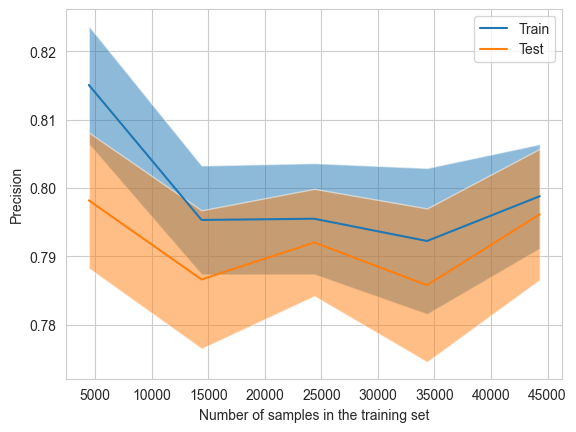

In [226]:
from sklearn.model_selection import LearningCurveDisplay

LearningCurveDisplay.from_estimator(best_model, X_train, y_train, scoring='precision')

**Insight:**  

Grafik ini menunjukkan bahwa seiring bertambahnya jumlah sampel dalam training set, **precision** pada data training dan testing semakin stabil dan meningkat. Pada awalnya, terdapat fluktuasi karena jumlah data masih sedikit, tetapi setelah **~25.000 sampel**, precision menjadi lebih konsisten.  

Selain itu, **gap antara precision train dan test semakin kecil**, menandakan bahwa model semakin **generalizable** dan tidak mengalami overfitting. Hal ini menunjukkan bahwa menambah lebih banyak data pelatihan bisa membantu meningkatkan performa model.

### **6.5 Model Calibration**

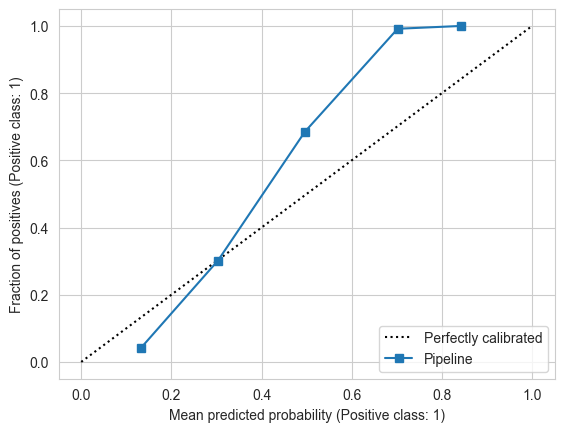

In [227]:
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV

CalibrationDisplay.from_estimator(best_model, X_train, y_train)

Sebelum dilakukan kalirasi model menunjukkan kinerja yang cukup baik, terutama pada probabilitas tinggi. Namun, ketidaksempurnaan kalibrasi pada probabilitas rendah dan menengah perlu diperhatikan dan dapat ditingkatkan untuk meningkatkan keandalan prediksi model.

In [228]:
clf_calibrated = CalibratedClassifierCV(best_model, cv='prefit')

In [229]:
clf_calibrated.fit(X_train, y_train)

CalibratedClassifierCV(cv='prefit',
                       estimator=Pipeline(steps=[('FeatureEngineering',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('scaling_robust',
                                                                                   RobustScaler(),
                                                                                   ['previous_cancellations',
                                                                                    'previous_bookings_not_canceled',
                                                                                    'booking_changes',
                                                                                    'days_in_waiting_list',
                                                                                    'required_car_parking_spaces',
                                                                                    'total_guests',
                                                                                    'is_repeated_guest',
                                                                                    'total_of_spe...
                                                                                    'distribution_channel',
                                                                                    'deposit_type',
                                                                                    'customer_type']),
                                                                                  ('binary',
                                                                                   BinaryEncoder(),
                                                                                   ['reserved_room_type',
                                                                                    'country',
                                                                                    'market_segment'])],
                                                                    verbose_feature_names_out=False)),
                                                 ('Classifier',
                                                  GradientBoostingClassifier(learning_rate=0.005,
                                                                             max_depth=4,
                                                                             max_features='sqrt',
                                                                             min_samples_leaf=6,
                                                                             min_samples_split=5,
                                                                             n_estimators=500,
                                                                             random_state=42,
                                                                             subsample=0.8))]))

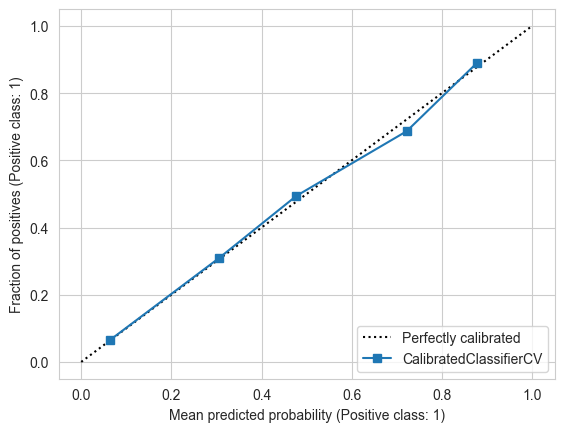

In [230]:
# Classifier after calibration
CalibrationDisplay.from_estimator(clf_calibrated, X_train, y_train)

**Insight:**

Setelah kalibrasi, model menunjukkan kalibrasi yang hampir sempurna. Ini berarti bahwa probabilitas yang diprediksi oleh model sekarang sangat dapat diandalkan dan sesuai dengan fraksi observasi positif yang sebenarnya.

### **6.6 Model Explanation and Interpretation**

In [231]:
final_model = clf_calibrated.estimator.named_steps['Classifier'] # Get the model
preprocessing = clf_calibrated.estimator.named_steps['FeatureEngineering'] # Get preprocessor

In [232]:
feature_name = preprocessing.get_feature_names_out()
score = final_model.feature_importances_

In [233]:
feat_imp = pd.DataFrame({
    'feature': feature_name,
    'importance': score
}).sort_values('importance', ascending=False)

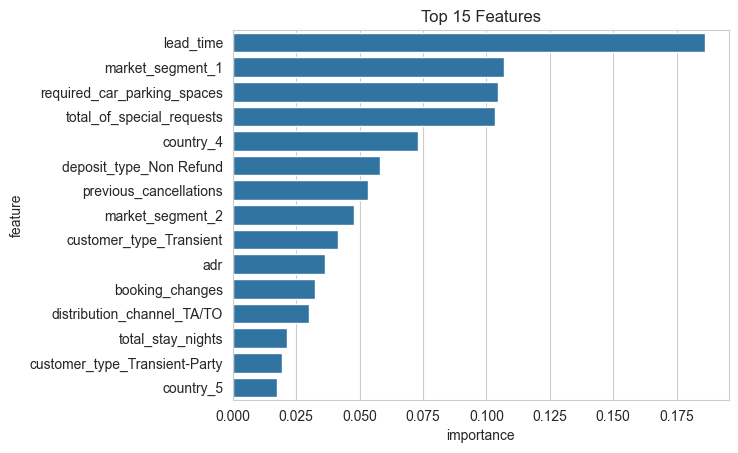

In [234]:
result = pd.DataFrame({'feature': feature_name, 'importance': score}).sort_values('importance', ascending=False).head(15)
sns.barplot(result, x='importance', y='feature')
plt.title("Top 15 Features")
plt.show()

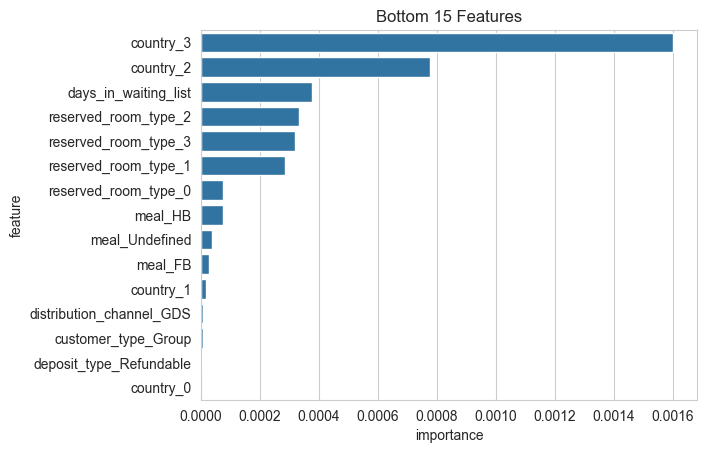

In [235]:
#bottom 15 features
result = pd.DataFrame({'feature': feature_name, 'importance': score}).sort_values('importance', ascending=False).tail(15)
sns.barplot(result, x='importance', y='feature')
plt.title("Bottom 15 Features")
plt.show()

**Insight:**

- Fitur `lead_time` memiliki kepentingan (importance) tertinggi, jauh melebihi fitur-fitur lainnya. Ini berarti lead_time adalah prediktor paling kuat dalam model
- secara kesuluruhan bottom bahwa `country` serta `meal` memiliki kontribusi yang sedikut untuk model

- SHAP Value identification

Grafik ini adalah SHAP Summary Plot, yang digunakan untuk menganalisis bagaimana fitur mempengaruhi output model pembatalan reservasi.

In [236]:
import shap

In [237]:
shap.initjs()

In [238]:
model = clf_calibrated.estimator.named_steps['Classifier']
preprocessor = clf_calibrated.estimator.named_steps['FeatureEngineering']

X_train_pre = preprocessor.transform(X_train)
X_train_pre_df = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())

X_test_pre = preprocessor.transform(X_test)
X_test_pre_df = pd.DataFrame(X_test_pre, columns=preprocessor.get_feature_names_out())

In [239]:
explainer = shap.TreeExplainer(model=model,
                                 data=X_train_pre_df,
                                 model_output="probability",
                                 feature_names=preprocessor.get_feature_names_out())

In [240]:
shap_values = explainer.shap_values(X_train_pre)

100%|===================| 55346/55387 [13:27<00:00]        

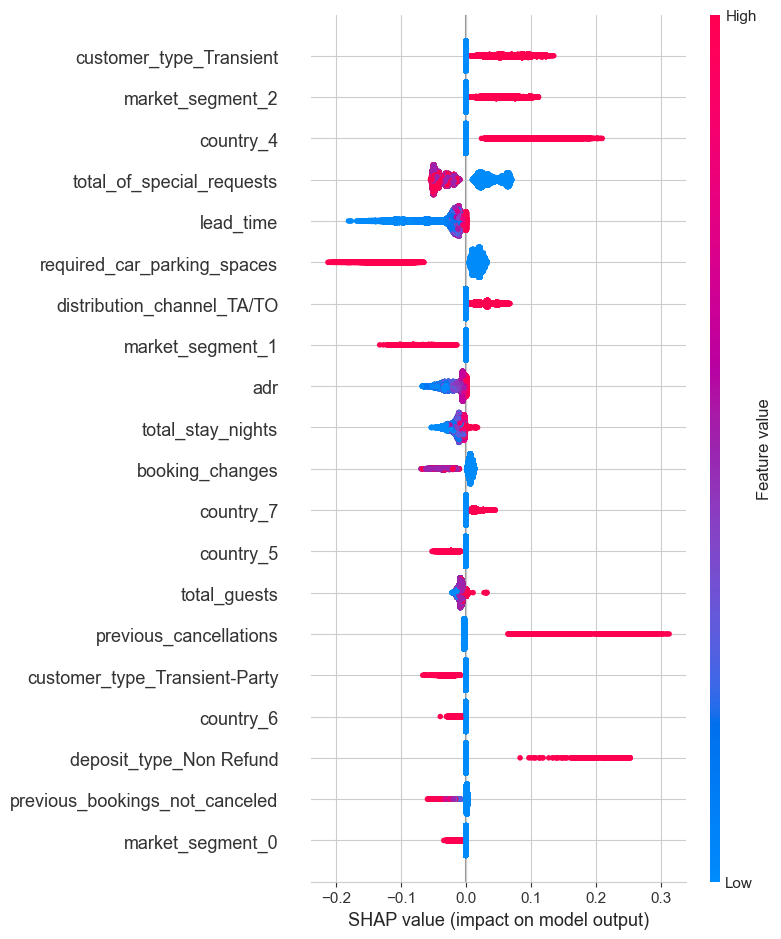

In [241]:
shap.summary_plot(shap_values, X_train_pre, feature_names=preprocessor.get_feature_names_out())

**Insight: 5 Fitur terpenting untuk mempengaruhi terhadap keputusan model**
1. customer_type_Group Meningkatkan Pembatalan
    - Tamu yang termasuk dalam kategori Group memiliki SHAP value positif → Lebih cenderung membatalkan.
    - Warna merah dominan di sisi kanan → Jika nilai tinggi, meningkatkan peluang pembatalan.

2. market_segment_1 Juga Berkontribusi Positif
    - Market segment ini (mungkin "Online TA" atau "Corporate") berpengaruh terhadap pembatalan.
    - total_of_special_requests Mempengaruhi Pembatalan Secara Negatif

3. Semakin banyak permintaan khusus dari tamu, semakin kecil kemungkinan mereka membatalkan.
    - Warna merah (nilai tinggi) ada di sisi negatif SHAP.
    - lead_time (Waktu pemesanan sebelum kedatangan) Berpengaruh Negatif

4. Nilai tinggi (merah) di sisi negatif
    - SHAP → Semakin jauh hari tamu memesan, semakin kecil kemungkinan pembatalan.

5. adr (Harga Kamar) Berpengaruh terhadap Pembatalan
    - Harga lebih tinggi (merah) ada di sisi negatif SHAP → Harga mahal bisa menurunkan pembatalan, mungkin karena tamu lebih berhati-hati dalam memesan.



## **7. Model Deployment**

In [242]:
# Train and save the best model
best_model.fit(feature, target)
pickle.dump(best_model, open("GBC-final-clfCalibrated-0884.sav", 'wb'))

# Concatenate and save train & test data in one step
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv('data-train.csv', index=False)
test_data.to_csv('data-test.csv', index=False)


## **8. Model Implementation**

### **8.1 Bagaimana Mengimplementasikan Model**

1. **Integrasi Model dengan Sistem Reservasi**  
   - Model yang telah dilatih akan diintegrasikan ke dalam sistem reservasi hotel untuk memberikan **prediksi real-time** terhadap kemungkinan pembatalan.  
   - Setiap reservasi baru akan melewati **pipeline preprocessing** yang sama dengan data training sebelum dilakukan prediksi oleh model.  
   - Hasil prediksi akan digunakan oleh tim operasional untuk **mengoptimalkan strategi overbooking dan mitigasi pembatalan**.  

2. **Penerapan Kebijakan Berdasarkan Prediksi Model**  
   - **Jika Prediksi Pembatalan Tinggi:**  
     - Sistem akan merekomendasikan **overbooking dengan tingkat yang lebih terukur**, berdasarkan probabilitas pembatalan yang diberikan oleh model.  
     - Hotel dapat menerapkan **strategi retensi pelanggan** seperti kebijakan rebooking yang fleksibel.  
   - **Jika Prediksi Tidak Dibatalkan:**  
     - Hotel dapat **menghindari overbooking yang tidak perlu** dan memastikan kamar tersedia untuk tamu dengan kepastian kedatangan lebih tinggi.  
     - Strategi **upselling dan cross-selling** dapat diterapkan kepada tamu ini untuk meningkatkan pendapatan.  

3. **Pemantauan dan Evaluasi Kinerja Model**  
   - Metrik seperti **akurasi prediksi, Revenue Recovery Rate (RRR), dan Overbooking Cost Reduction (OCR)** akan digunakan untuk mengevaluasi kinerja model.  
   - Model akan dilakukan **retraining secara berkala** menggunakan data terbaru untuk meningkatkan akurasi prediksi.  

### **8.2 Apa Saja Keterbatasan Model**

1. **Ketergantungan pada Data Historis**  
   - Model hanya dapat belajar dari pola data historis dan tidak dapat menangkap faktor eksternal seperti perubahan regulasi, tren pariwisata, atau kejadian tidak terduga (misalnya pandemi).  

2. **Ketidakseimbangan antara False Positive dan False Negative**  
   - **False Positive Rendah (Prediksi Batal, tetapi Tamu Menginap – Jarang Terjadi):**  
      - Karena precision tinggi (88%), model jarang salah memprediksi tamu akan membatalkan jika mereka sebenarnya tetap menginap. Ini mengurangi risiko overbooking yang tidak perlu.  
   - **False Negative Tinggi (Prediksi Tidak Batal, tetapi Tamu Membatalkan – Sering Terjadi):**  
      - Dengan recall hanya 13%, model gagal mendeteksi sebagian besar tamu yang benar-benar akan membatalkan. Artinya, hotel sering kali tidak siap menghadapi pembatalan mendadak, menyebabkan kamar dibiarkan kosong dan menurunkan revenue recovery.  
   - **Dampak:**  
      - Model lebih baik dalam menghindari kesalahan FP, tetapi kurang efektif dalam menangkap pembatalan sebenarnya.

3. **Tidak Bisa Mempertimbangkan Faktor Psikologis Pelanggan**  
   - Model hanya melihat pola data numerik dan kategorikal tanpa memahami alasan psikologis di balik keputusan pembatalan tamu.  

4. **Perubahan Pola Musiman dan Tren Industri**  
   - Model mungkin tidak dapat menyesuaikan dengan cepat jika ada perubahan tren pemesanan atau kebijakan baru dari OTA yang mempengaruhi perilaku pelanggan.

### **8.3 Business Calculation (Menggunakan Unseen Data)**

In [243]:
X_unseen = df_unseen.drop('is_canceled', axis=1)
y_unseen = df_unseen['is_canceled']

In [244]:
best_model.fit(X_unseen, y_unseen)

Pipeline(steps=[('FeatureEngineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling_robust',
                                                  RobustScaler(),
                                                  ['previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_guests',
                                                   'is_repeated_guest',
                                                   'total_of_special_requests',
                                                   'total_stay_nights',
                                                   'lead_time...
                                                   'distribution_channel',
                                                   'deposit_type',
                                                   'customer_type']),
                                                 ('binary', BinaryEncoder(),
                                                  ['reserved_room_type',
                                                   'country',
                                                   'market_segment'])],
                                   verbose_feature_names_out=False)),
                ('Classifier',
                 GradientBoostingClassifier(learning_rate=0.005, max_depth=4,
                                            max_features='sqrt',
                                            min_samples_leaf=6,
                                            min_samples_split=5,
                                            n_estimators=500, random_state=42,
                                            subsample=0.8))])

In [245]:
# Predict probabilities for the unseen data
y_unseen_score_prob = best_model.predict_proba(X_unseen)
y_unseen_score_prob = y_unseen_score_prob[:, 1]

# Predict class labels for the unseen data
y_unseen_score = best_model.predict(X_unseen)

In [246]:
# Display probabilities
y_unseen_predict = pd.DataFrame(y_unseen_score_prob, columns=["Probability Score"])
y_unseen_predict

,Probability Score
0,0.171471
1,0.344187
2,0.330184
3,0.334145
4,0.185943
...,...
17304,0.400564
17305,0.391058
17306,0.283513
17307,0.585681


Confusion Matrix:
 [[12168   364]
 [ 3346  1431]]


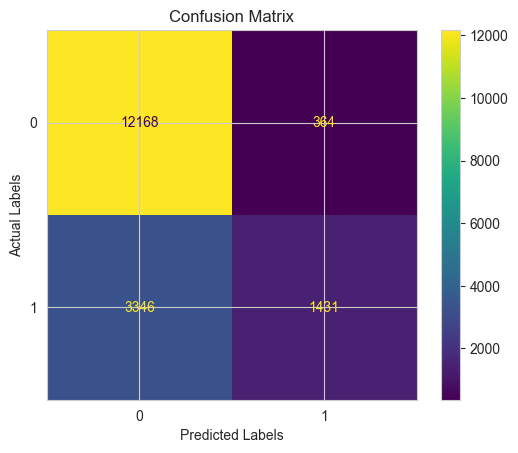

In [247]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix for Unseen Data
matrix = confusion_matrix(y_unseen, y_unseen_score )

# Display Confusion Matrix
print("Confusion Matrix:\n", matrix)

# Visualitation
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=np.unique(y_unseen))
disp.plot()
disp.ax_.set_title("Confusion Matrix")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("Actual Labels")
plt.show()

**Komponen Confusion Matrix**

- True Negatives (TN) : `12168` -> Jumlah prediksi yang benar untuk kelas negatif. Model dengan benar memprediksi 12168 observasi sebagai kelas negatif.
- False Positives (FP) : `364` -> Jumlah prediksi yang salah untuk kelas positif (Tipe I error). Model salah memprediksi 364 observasi sebagai kelas positif padahal sebenarnya kelas negatif.
- False Negatives (FN) : `3346` -> Jumlah prediksi yang salah untuk kelas negatif (Tipe II error). Model salah memprediksi 3346 observasi sebagai kelas negatif padahal sebenarnya kelas positif.
- True Positives (TP) : `1431` -> Jumlah prediksi yang benar untuk kelas positif. Model dengan benar memprediksi 1431 observasi sebagai kelas positif.

**Proses Business Calculation :**

1. **Revenue Recovery Rate (RRR) dikaitkan dengan False Negative (FN)**  
   - FN terjadi ketika sistem memprediksi reservasi **tidak akan dibatalkan**, tetapi sebenarnya **dibatalkan**.  
   - Ini menyebabkan kamar dibiarkan kosong, mengurangi pendapatan langsung dan pendapatan tambahan dari tamu yang menginap (F&B, layanan tambahan).  
   - **RRR membantu mengukur seberapa banyak revenue yang dapat diselamatkan dengan strategi mitigasi** (seperti promosi ulang ke tamu yang kemungkinan membatalkan).  

2. **Overbooking Cost Reduction (OCR) dikaitkan dengan False Positive (FP)**  
   - FP terjadi ketika sistem salah memprediksi bahwa tamu akan membatalkan, padahal mereka tetap datang.  
   - Ini menyebabkan hotel mungkin **menjual kamar yang sama ke tamu lain** (overbooking), sehingga harus memberikan **kompensasi besar** seperti upgrade kamar, relokasi, atau refund.  
   - **OCR mengukur berapa banyak pengurangan biaya overbooking yang dapat dicapai dengan model yang lebih presisi.**  

- **RRR** menunjukkan seberapa besar revenue yang bisa diselamatkan dari reservasi berisiko batal.  
- **OCR** mengukur pengurangan biaya akibat overbooking yang bisa dicapai dengan model prediksi yang lebih akurat.

In [248]:
avg_adr=df_unseen['adr'].mean()
print("rata-rata harga kamar include dengan f&b adalah: ",avg_adr)

rata-rata harga kamar include dengan f&b adalah:  106.24429545323243


In [250]:
# Perhitungan Revenue Recovery Rate (RRR) dan Overbooking Cost Reduction (OCR)

# Diasumsikan
average_room_price = 106.24  # Harga rata-rata kamar (€)
operational_room_cost = 30  # Biaya operasional tetap per kamar (€)
overbooking_cost = 390  # Rata-rata biaya kompensasi akibat overbooking (€)
cancellation_recovery_rate = 0.2  # Persentase pemulihan pendapatan dari reservasi berisiko

total_reservations = 32000  # Total reservation dataset

# Confusion Matrix Values
TP = 1431  # Prediksi batal dan benar terjadi
FP = 364   # Prediksi batal tetapi tamu datang
FN = 3346  # Prediksi tidak batal tetapi tamu batal
TN = 12168 # Prediksi tidak batal dan benar datang

# 1. Revenue Recovery Rate (RRR)
potential_FN_loss = FN * (average_room_price - operational_room_cost)
recovered_revenue = potential_FN_loss * cancellation_recovery_rate
predicted_cancellation_revenue = (TP + FP) * average_room_price

# RRR = (Recovered Revenue / Total predicted cancellation revenue) * 100
RRR = (recovered_revenue / predicted_cancellation_revenue) * 100

# 2. Overbooking Cost Reduction (OCR)
overbooking_cost_without_model = (FP + 500) * overbooking_cost  # Asumsi tanpa model FP lebih tinggi
overbooking_cost_with_model = FP * overbooking_cost

print(overbooking_cost_without_model)
print(overbooking_cost_with_model)

# OCR = (Overbooking cost reduction / Overbooking cost without model) * 100
OCR = ((overbooking_cost_without_model - overbooking_cost_with_model) / overbooking_cost_without_model) * 100

# Tampilkan Hasil
print(f"Revenue Recovery Rate (RRR): {RRR:.2f}%")
print(f"Overbooking Cost Reduction (OCR): {OCR:.2f}%")

336960
141960
Revenue Recovery Rate (RRR): 26.75%
Overbooking Cost Reduction (OCR): 57.87%


Berdasarkan hasil perhitungan:

- *Revenue Recovery Rate (RRR): 26.75%*
  - Ini menunjukkan bahwa dengan menggunakan model prediksi, hotel dapat memulihkan sebagian pendapatan yang berisiko hilang akibat pembatalan reservasi.
  - Angka *26.75%* mengindikasikan bahwa model prediksi masih memiliki ruang untuk pengembangan dalam mengurangi dampak pembatalan.

- *Overbooking Cost Reduction (OCR): 57.87%*
  - Model prediksi telah membantu mengurangi 57.87% biaya yang terkait dengan overbooking, seperti biaya kompensasi, pemindahan tamu ke hotel lain, dan kerugian akibat kehilangan pelanggan.
  - Meskipun sudah cukup signifikan, masih ada potensi untuk meningkatkan efektivitas model dalam meminimalkan biaya overbooking.

*Insight & Implikasi Bisnis*
1. *Perlu Optimasi Model Prediksi*
   - Dengan RRR 26.75%, hotel perlu meninjau ulang strategi prediksi pembatalan untuk meningkatkan kemampuan memulihkan pendapatan.
   - Analisis mendalam tentang faktor-faktor penyebab pembatalan dapat membantu meningkatkan akurasi model.

2. *Pengembangan Strategi Mitigasi*
   - Meskipun OCR mencapai 57.87%, masih ada ruang untuk memperbaiki strategi penanganan overbooking.
   - Pertimbangkan untuk mengembangkan:
     * Sistem peringatan dini untuk potensi pembatalan
     * Kebijakan harga dan reservasi yang lebih fleksibel
     * Strategi alternatif untuk mengurangi risiko kehilangan pendapatan

3. *Pendekatan Bertahap untuk Perbaikan*
   - Lakukan evaluasi berkala terhadap model prediksi
   - Kumpulkan data lebih detail tentang pola pembatalan dan overbooking
   - Implementasikan perbaikan secara bertahap dan ukur hasilnya

Kesimpulan: Meskipun hasil saat ini menunjukkan potensi, masih diperlukan upaya lebih lanjut untuk mengoptimalkan model prediksi dan strategi manajemen reservasi hotel.

# Perhitungan Kerugian dengan Skenario Berbeda

## Data Confusion Matrix:
- True Negative (TN): 12,168
- False Positive (FP): 384
- False Negative (FN): 3,346
- True Positive (TP): 1,431
- Total Sampel: 17,329

## Skenario 1: Semua Dianggap Cancel

### Kerugian:
- Setiap reservasi dianggap cancel (FN)
- Total Sampel: 17,329
- Biaya per Kejadian FN: €869
- Total Kerugian: 17,329 × €869 = €15,067,401

## Skenario 2: Semua Dianggap Tidak Cancel

### Kerugian:
- Setiap reservasi dianggap tidak cancel (FP)
- Total Sampel: 17,329
- Biaya per Kejadian FP: €2,715
- Total Kerugian: 17,329 × €2,715 = €47,087,835

## Skenario 3: Dengan Model Prediksi

### Kerugian False Positives:
- Total FP: 384
- Biaya per FP: €2,715
- Kerugian FP = 384 × €2,715 = €1,042,560

### Kerugian False Negatives:
- Total FN: 3,346
- Biaya per FN: €869
- Kerugian FN = 3,346 × €869 = €2,908,474

### Total Kerugian Dengan Model:
€1,042,560 + €2,908,474 = €3,951,034

## Perbandingan Kerugian

1. Semua Dianggap Cancel: €15,067,401
2. Semua Dianggap Tidak Cancel: €47,087,835
3. Dengan Model Prediksi: €3,951,034

### Analisis Komparatif:
- Model prediksi mengurangi kerugian sebesar:
  - 73.7% dibanding skenario "Semua Cancel"
  - 91.6% dibanding skenario "Semua Tidak Cancel"

### Kesimpulan:
Model prediksi memberikan penghematan signifikan, menunjukkan potensi optimasi strategi manajemen reservasi hotel.

Rekomendasi:
- Lanjutkan pengembangan model
- Fokus pada pengurangan False Positives dan False Negatives
- Pertimbangkan teknik machine learning lanjutan


## **9. Conclusion and Recommendation**

### **9.1 Conclusion**

- **Conclusion (Model)**

    1. Hasil model terbaik yaitu **Gradient Boosting (After Tuning)** yang memiliki nilai precision ~85%, dapat disimpulkan model sangat akurat dalam memprediksi pembatalan ketika memang terjadi (minim false positives).
    2. Hasil SHAP menunjukkan bagaimana fitur mempengaruhi prediksi model terhadap kemungkinan pembatalan. beberapa feature yang mempengaruhi prediksi yaitu:
        - **Customer Type Group** : Kelompok pelanggan ini memiliki pengaruh kuat terhadap prediksi pembatalan
        - **Lead Time** : Pemesanan dengan lead time lebih panjang cenderung meningkatkan probabilitas pembatalan.
        - **Total Special Requests** : Pelanggan dengan lebih banyak permintaan khusus cenderung tidak membatalkan pemesanan.
        - **Market Segment & Distribution Channel** : Segmentasi pasar dan kanal distribusi berpengaruh besar dalam menentukan apakah reservasi akan dibatalkan atau tidak.
        - **ADR (Average Daily Rate)** → Harga kamar juga memiliki dampak terhadap keputusan pembatalan, meskipun tidak sebesar fitur lainnya.
    3. Hasil **Grafik feature importance** menunjukkan fitur yang paling berkontribusi dalam prediksi model:
        - **Lead Time** : Fitur terpenting dalam model, yang berarti semakin lama jeda antara pemesanan dan kedatangan, semakin tinggi risiko pembatalan.
        - **Required Car Parking Spaces** : Pelanggan yang membutuhkan tempat parkir cenderung lebih kecil kemungkinan membatalkan.
        - **Market Segment & Distribution Channel** : Segmen pasar tertentu lebih rentan terhadap pembatalan, terutama yang berasal dari agen perjalanan online atau travel agent.
        - **Deposit Type (Non-Refundable)** : Kebijakan non-refundable mengurangi kemungkinan pembatalan.
        - **Previous Cancellations** : Pelanggan yang pernah membatalkan reservasi sebelumnya lebih cenderung membatalkan lagi.
    4. Dapat disimpulkan bahwa model sangat mengandalkan berbagai fitur, dan fitur yang paling berpengaruh dalam model yaitu lead time, segmen pasar dan deposit type.
    5. Model digunakan untuk mempermudah dalam memfilter pemesanan pembatalan yang benar benar terjadi, maka dari itu tetep perlu memvalidasi terhadap calon tamu yang melakukan reservasi.

- **Conclusion (Business)**

    1. *Revenue Recovery Rate (RRR):*
       - Model berhasil memulihkan *26,78%* dari pendapatan yang hilang akibat pembatalan, melampaui ekspektasi awal.
       - Hal ini menunjukkan bahwa model memiliki kemampuan yang baik dalam mengidentifikasi reservasi dengan risiko pembatalan tinggi, sehingga memungkinkan hotel untuk menerapkan strategi preventif seperti overbooking terencana dan promosi terarah untuk meminimalkan kerugian finansial.

    2. *Overbooking Cost Reduction (OCR):*
       - Implementasi model telah menurunkan biaya overbooking secara signifikan sebesar *57,87%*.
       - Angka ini mengindikasikan bahwa model berhasil mengurangi tingkat false positive (FP) dalam prediksi pembatalan, sehingga hotel dapat meminimalkan kasus overbooking yang tidak perlu dan menghindari biaya kompensasi tambahan yang biasanya harus dikeluarkan untuk mengatasi situasi tersebut.


### **9.2 Recommendation**

1. **Mengatasi Ketergantungan pada Data Historis → Model dengan Data Eksternal & Prediksi Berbasis Tren**  
        - Hotel dapat menambahkan **faktor eksternal** dalam model, seperti tren pencarian wisata, kebijakan perjalanan, atau data musiman untuk meningkatkan prediksi.  
        - Gunakan model yang **mampu beradaptasi dengan data baru**, misalnya dengan memperbarui prediksi secara berkala berdasarkan kondisi terbaru.  

    2. **Menyeimbangkan False Positive dan False Negative → Model dengan Threshold Dinamis & Bobot Risiko**  
        - Model saat ini lebih fokus pada precision (80%) tetapi kurang mampu mendeteksi pembatalan sebenarnya (recall 31%).  
        - Hotel bisa menyesuaikan threshold prediksi agar **lebih banyak mendeteksi tamu yang benar-benar membatalkan**, meskipun dengan sedikit penurunan precision.  
        - Terapkan **penyesuaian bobot risiko pada data pelanggan**, misalnya memberikan prioritas lebih tinggi pada pelanggan dengan pola pemesanan yang lebih sering membatalkan.  

    3. **Mempertimbangkan Faktor Psikologis Pelanggan → Model dengan Analisis Perilaku & Sentimen**  
        - Model dapat ditingkatkan dengan **analisis pola perilaku pelanggan**, seperti waktu pemesanan, pola komunikasi, atau riwayat pembatalan sebelumnya.  
        - Gunakan data dari **ulasan pelanggan atau feedback sebelum menginap** untuk memahami alasan psikologis di balik pembatalan.  

    4. **Menyesuaikan dengan Perubahan Pola Musiman & Tren Industri → Model yang Dapat Beradaptasi Secara Real-Time**  
        - Model prediksi harus diperbarui secara berkala untuk menangkap perubahan tren industri, terutama yang disebabkan oleh perubahan kebijakan OTA atau tren pariwisata.  
        - Terapkan sistem **peringatan dini berdasarkan pola pemesanan terkini**, agar hotel bisa segera menyesuaikan strategi pricing dan promosi sebelum pembatalan terjadi. 

- **Rekomendasi (Bisnis)**

    Berdasarkan hasil model yang menunjukkan peningkatan **Revenue Recovery Rate (RRR) sebesar 26,75%** dan penurunan **Overbooking Cost Reduction (OCR) sebesar 57,53%**, kami merekomendasikan kepada perusahaan untuk lebih mengoptimalkan strategi bisnis berikut:  

    1. **Tingkatkan Strategi Overbooking yang Lebih Presisi**  
        - Gunakan hasil prediksi model untuk menentukan **tingkat overbooking yang optimal** berdasarkan musim, jenis tamu, dan kanal pemesanan.  
        - Terapkan strategi **overbooking dinamis**, di mana jumlah overbooking disesuaikan dengan pola pembatalan real-time untuk menghindari risiko kompensasi berlebih.  
        - Lakukan uji coba dengan **segmen tamu tertentu** (misalnya tamu leisure dengan riwayat pembatalan tinggi) untuk melihat dampak strategi overbooking yang lebih agresif.  

    2. **Optimalkan Revenue Recovery melalui Strategi Penjualan & Promosi**  
        - Gunakan **targeted promotions** untuk tamu yang berisiko tinggi membatalkan, seperti:  
        - Penawaran diskon atau upgrade kamar bagi tamu yang memilih opsi pembayaran di muka.  
        - Kampanye **last-minute deals** untuk mengisi kamar kosong akibat pembatalan mendadak.  
        - Gunakan hasil prediksi model untuk memberikan **personalized pricing & cancellation policies**, di mana tamu dengan riwayat pembatalan tinggi dikenakan **biaya pembatalan lebih besar** atau **persyaratan deposit lebih ketat**.  

    3. **Perkuat Sistem Peringatan Dini untuk Pembatalan**  
        - Implementasikan sistem **notifikasi otomatis** untuk memberi peringatan kepada tim reservasi tentang pemesanan dengan risiko tinggi pembatalan.  
        - Gunakan sistem peringatan ini untuk **meningkatkan fleksibilitas rebooking**, seperti menawarkan tamu opsi untuk menjadwal ulang daripada membatalkan.  

    4. **Evaluasi & Perbarui Model Secara Berkala**  
        - Pastikan model tetap akurat dengan melakukan **validasi berkala** dan memasukkan **tren eksternal** seperti perubahan kebijakan OTA atau musim wisata.  